In [4]:
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle

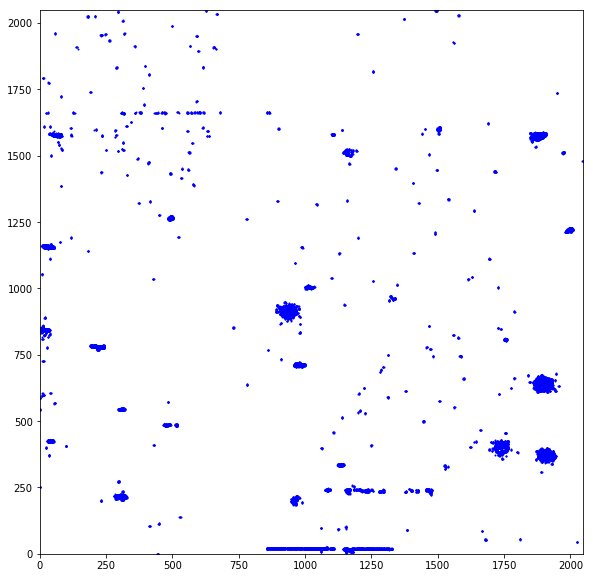

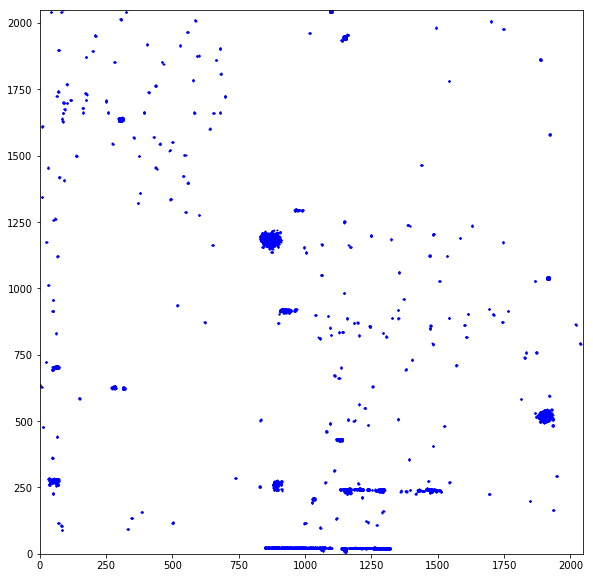

In [8]:
#check binary files
# check how binary files looks like
import matplotlib.pyplot as plt
import IntBin
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
idxRot = 0  # index of rotation (0~719)
idxL = 0    # index of detector distance(0~2)
b=IntBin.ReadI9BinaryFiles('/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_{0:06d}.bin{1}'.format(int(idxRot),idxL))
plt.scatter(2047-b[0],2047-b[1],c='b',s=1)

plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()
#check binary files
# check how binary files looks like
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
idxRot = 0  # index of rotation (0~719)
idxL = 1    # index of detector distance(0~2)
b=IntBin.ReadI9BinaryFiles('/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_{0:06d}.bin{1}'.format(int(idxRot),idxL))
plt.scatter(2047-b[0],2047-b[1],c='b',s=1)

plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()

In [1]:
# try david's parameters
import numpy as np
centerL = np.array([[5.09206, 6.59149]])
centerJ = np.array([[924.399, 936.776]])
centerK = np.array([[2031.19, 2027.28]])
centerRot = np.array([[[89.6609, 90.636, 359.574],
                       [89.871, 90.1818, 359.486]]])

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_20x20_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.3)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (4075650, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 319, voxelLeft: 1/900.  max hitratio: 0.4444444477558136, peakcnt: 45,reconstructed euler angle [  5.20345155  39.95111145 322.86880752]]]]7e-02]number of flood fills: 23
1.5621442
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angle [  4.71322674  40.2740866  323.80044307]5e-02]max misorien: 1.554380178451538
1.5543802
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angle [  4.68612628  40.32173417 323.75790363]1e-02]max misorien: 1.3899226188659668
1.3899226
 voxelIdx: 898, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,recons

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

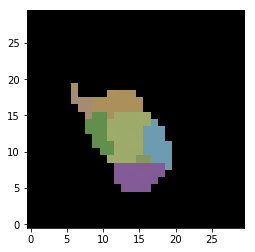

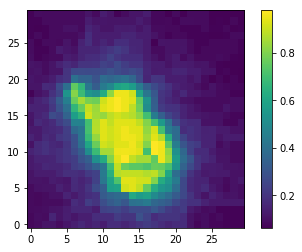

In [5]:
MicFileTool.plot_square_mic(S.squareMicData,0.7)
MicFileTool.plot_conf_square_mic(S.squareMicData)

# Try blind search parameters 

In [1]:
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([10,10],voxelsize=0.002,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_10x10_0.002_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
centerL = np.array([[5, 6.5]])
centerL, centerJ, centerK, centerRot = S.geo_opt_phase_0(rotOptimization=True,centerL=centerL)

(256, 3)
7
 exp data loaded, shape is: (4075650, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
 new parameters: [[1022.22222222 1022.22222222]], [[2011.11111111 2011.11111111]], [[5.22222222 6.72222222]],  29.09772695 166.82049966]325.73773219]] 
 max hitratio:0.06818182021379471, rangeL:1.7, rangeJ:170.0, rangeK:85.0
 new parameters: [[1013.35265709 1013.35265709]], [[2011.11111111 2011.11111111]], [[5.22222222 6.72222222]],[  3.74712746  43.25701634 350.22896047]]e+02] 
 max hitratio:0.06666667014360428, rangeL:1.4449999999999998, rangeJ:144.5, rangeK:72.25
 new parameters: [[1003.92874436 1003.92874436]], [[2011.11111111 2011.11111111]], [[5.22222222 6.72222222]],[233.31800481  45.09142677 117.6915211 ]] 
 max hitratio:0.04878048598766327, rangeL:1.2282499999999998, rangeJ:122.825, rangeK:61.4125
 

In [2]:
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
save_object((centerL, centerJ, centerK, centerRot),'gold_calibrate_run0.p')


(256, 3)
7
 exp data loaded, shape is: (4075650, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 442, voxelLeft: 1/900.  max hitratio: 0.25, peakcnt: 44,reconstructed euler angle [  5.64901232  40.66528286 322.67657644]  324.56933144]]]number of flood fills: 33
1.6097791
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angle [ 45.80420302  43.05327624 311.55568852]max misorien: 1.5988743305206299
1.5988743
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angle [ 45.79067429  43.04949889 311.52891651]max misorien: 1.593751311302185
1.5937513
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angl

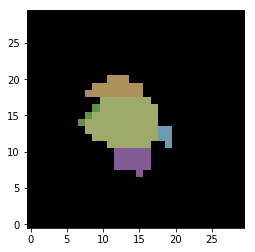

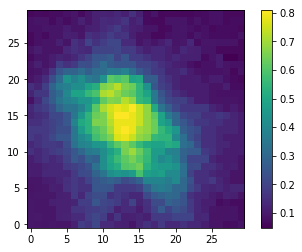

In [3]:
# try david's parameters
import numpy as np
import pickle
with open('gold_calibrate_run0.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_20x20_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

In [4]:
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
with open('gold_calibrate_run0.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot)
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([100,100],voxelsize=0.003,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_100x100_0.003_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True

aIdxVoxel = S.geo_opt_phase_1(centerL, centerJ, centerK, centerRot,expandSize=3)
S.save_square_mic('geo_opt_test.npy')

# make mask:
squareMic = S.squareMicData
#squareMic = np.load('Au_suter_aug17_10x10_0.002_shift_0_0_0.npy')
maskFinal = np.zeros([100,100])
maskFinal[squareMic[:,:,6]>0.5] = 1
x,y = np.where(maskFinal==1)
aIdxVoxel = x * maskFinal.shape[0] + y

aIdxVoxel = np.random.choice(aIdxVoxel,100)
centerL, centerJ, centerK, centerRot = S.twiddle_refine_backup(aIdxVoxel,centerL, centerJ, centerK, centerRot)


(256, 3)
7
 exp data loaded, shape is: (4075650, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 3358, voxelLeft: 1/10000.  max hitratio: 0.54347825050354, peakcnt: 46,reconstructed euler angle [ 45.88076198  45.4890866  296.08017705]26]]]]8e-03]number of flood fills: 135
1.6121948
 voxelIdx: 9999, voxelLeft: 0/10000.  max hitratio: 0.06976744532585144, peakcnt: 43,reconstructed euler angle [204.85649746   8.74289275 133.50130764]1e-01]max misorien: 1.6375545263290405
1.6375545
 voxelIdx: 9999, voxelLeft: 0/10000.  max hitratio: 0.06976744532585144, peakcnt: 43,reconstructed euler angle [204.80960325   8.75057407 133.46706082]0e-01]max misorien: 1.5846776962280273
1.5846777
 voxelIdx: 9999, voxelLeft: 0/10000.  max hitratio: 0.06976744532585144, pea

In [5]:
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
save_object((centerL, centerJ, centerK, centerRot),'gold_calibrate_twiddle_run0.p')

(256, 3)
7
 exp data loaded, shape is: (4075650, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 730, voxelLeft: 1/900.  max hitratio: 0.1304347813129425, peakcnt: 46,reconstructed euler angle [ 44.87144547  44.88519203 296.96596842]]]]]number of flood fills: 28
1.5698069
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angle [ 45.97053517  43.35748059 311.74578523]max misorien: 1.58420729637146
1.5842073
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angle [ 45.99953893  43.31471344 311.79993816]max misorien: 1.2256214618682861
1.2256215
 voxelIdx: 893, voxelLeft: 0/900.  max hitratio: 0.04878048598766327, peakcnt: 41,reconstructed euler angl

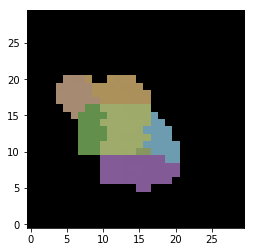

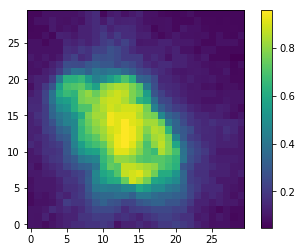

In [6]:
# try david's parameters
import numpy as np
import pickle
with open('gold_calibrate_twiddle_run0.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_20x20_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

In [1]:
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
with open('gold_calibrate_twiddle_run0.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot)
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_30x30_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True

aIdxVoxel = S.geo_opt_phase_1(centerL, centerJ, centerK, centerRot,expandSize=3)
S.save_square_mic('geo_opt_test.npy')

# make mask:
squareMic = S.squareMicData
#squareMic = np.load('Au_suter_aug17_10x10_0.002_shift_0_0_0.npy')
maskFinal = np.zeros([squareMic.shape[0],squareMic.shape[1]])
maskFinal[squareMic[:,:,6]>0.6] = 1
x,y = np.where(maskFinal==1)
aIdxVoxel = x * maskFinal.shape[0] + y

aIdxVoxel = np.random.choice(aIdxVoxel,100)
centerL, centerJ, centerK, centerRot = S.twiddle_refine_backup(aIdxVoxel,centerL, centerJ, centerK, centerRot)


(256, 3)
7
 exp data loaded, shape is: (4075650, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 579, voxelLeft: 1/900.  max hitratio: 0.6086956262588501, peakcnt: 46,reconstructed euler angle [284.78416206  31.70338339  95.7558777 ]]]]4e+02]number of flood fills: 33
1.5658453
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angle [ 45.80360416  43.39312077 311.86375952]max misorien: 1.439549207687378
1.4395492
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angle [ 45.77027053  43.34573702 311.83485182]max misorien: 1.2948018312454224
1.2948018
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed eule

In [2]:
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
save_object((centerL, centerJ, centerK, centerRot),'gold_calibrate_twiddle_run1.p')

(256, 3)
7
 exp data loaded, shape is: (4075650, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 189, voxelLeft: 1/900.  max hitratio: 0.3265306055545807, peakcnt: 49,reconstructed euler angle [128.92498535  27.41786145 187.2104848 ]]]]4e-01]number of flood fills: 33
1.5591242
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.06521739065647125, peakcnt: 46,reconstructed euler angle [ 45.41316415  43.08713117 353.14318275]max misorien: 1.4561796188354492
1.4561796
 voxelIdx: 898, voxelLeft: 0/900.  max hitratio: 0.0714285746216774, peakcnt: 42,reconstructed euler angle [ 46.76193846  42.59129654 358.05247709]]max misorien: 1.3018980026245117
1.301898
 voxelIdx: 885, voxelLeft: 0/900.  max hitratio: 0.08888889104127884, peakcnt: 45,reconstructed eule

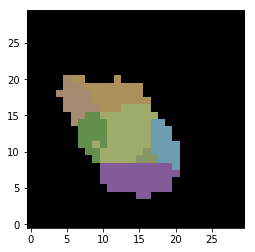

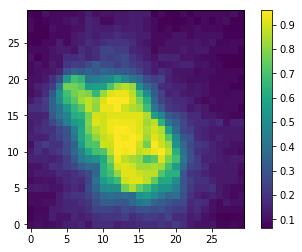

In [3]:
# try david's parameters
import numpy as np
import pickle
with open('gold_calibrate_twiddle_run1.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_20x20_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

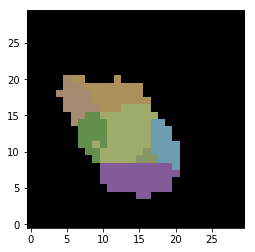

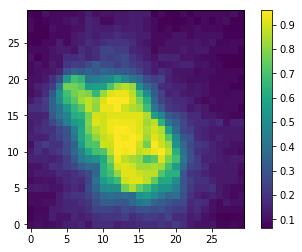

In [11]:
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

## it seems new parameter is better than get from I9

# run high resolution reconstruction with new parameters

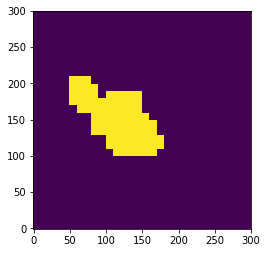

In [3]:
# first make a mask:
mask_30_30 = np.load('Au_calibrate_20x20_0.01_shift_0_0_0.npy')[:,:,6]>0.5
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')
plt.show()
np.save('gold_calibrate_mask_300_300.npy',mask_300_300)

In [1]:
# try large Q 
mask
import numpy as np
import pickle
with open('gold_calibrate_twiddle_run1.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(10)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-180-bsf0/Au_vol2_NSUM10_180_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0],mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_300x300_0.001_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
10


NameError: name 'mask_300_300' is not defined

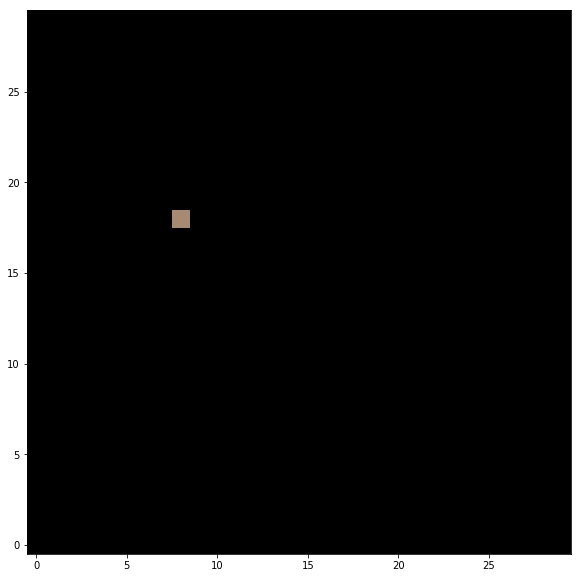

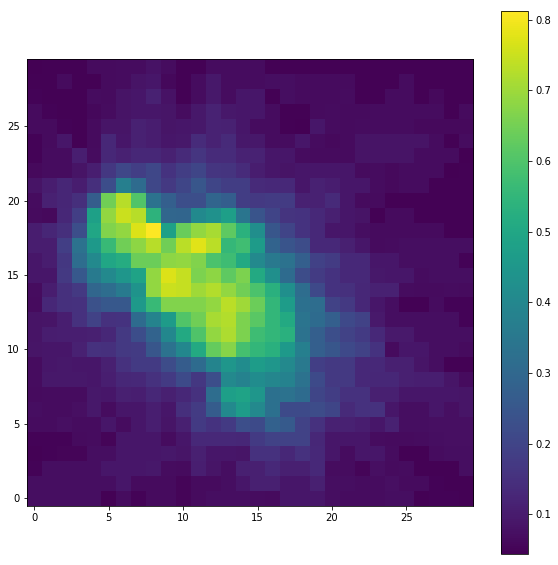

In [9]:
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.8)
MicFileTool.plot_conf_square_mic(S.squareMicData)

# load ebsd data:

In [1]:
import pandas as pd
df = pd.read_csv('/home/hedm/work/Au_calibrate/DeNoised_Registered_Flipped_EBSD_GrainBoundaries.txt',header=None)

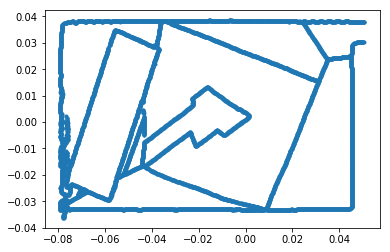

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/home/hedm/work/Au_calibrate/DeNoised_Registered_Flipped_EBSD_GrainBoundaries.txt',header=None)
plt.plot(df.iloc[:,0],df.iloc[:,1],'.')
plt.show()

# confuded by the ebsd image, check z0 and z1 in 360 rotation images:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
with open('gold_calibrate_twiddle_run1.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)

    
# first make a mask:
mask_30_30 = np.load('Au_calibrate_z1_30x30_0.01_shift_0_0_0.npy')[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')
plt.show()

<Figure size 640x480 with 1 Axes>

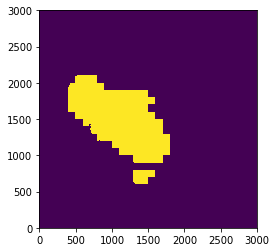

(256, 3)
8


ValueError: mask should be in the same shape as input

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
with open('gold_calibrate_twiddle_run1.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)

    
# first make a mask:
mask_30_30 = np.load('Au_calibrate_z1_30x30_0.01_shift_0_0_0.npy')[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')
plt.show()

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(8)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z1_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0],mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z1_300x300_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)      # reduced binary data

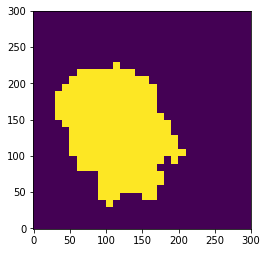

(256, 3)
8
 exp data loaded, shape is: (3403435, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 11275, voxelLeft: 1/22100.  max hitratio: 0.4736842215061188, peakcnt: 57,reconstructed euler angle [  9.67728397  34.89055525 337.38238449]]]]]]number of flood fills: 323
2.0943952
 voxelIdx: 62809, voxelLeft: 0/22100.  max hitratio: 0.2181818187236786, peakcnt: 55,reconstructed euler angle [143.45786343  27.65509291 258.70346846]]max misorien: 1.4824111461639404
1.4824111
 voxelIdx: 62809, voxelLeft: 0/22100.  max hitratio: 0.2181818187236786, peakcnt: 55,reconstructed euler angle [143.47426837  27.64644849 258.71081847]]max misorien: 1.150349736213684
1.1503497
 voxelIdx: 62807, voxelLeft: 0/22100.  max hitratio: 0.23636363446712494, peakcnt: 55,recon

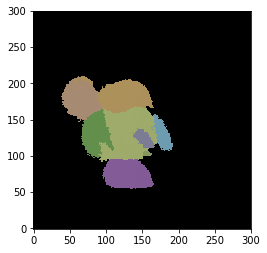

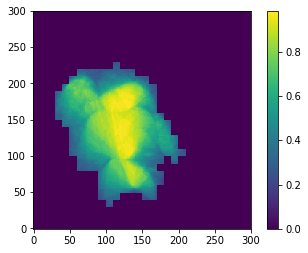

In [2]:
%matplotlib inline
import numpy as np
import pickle
with open('gold_calibrate_twiddle_run1.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)

# first make a mask:
import matplotlib.pyplot as plt
mask_30_30 = np.load('Au_calibrate_z2_30x30_0.01_shift_0_0_0.npy')[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')
plt.show()
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(8)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z2_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0],mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z2_300x300_0.001_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)      # reduced binary data

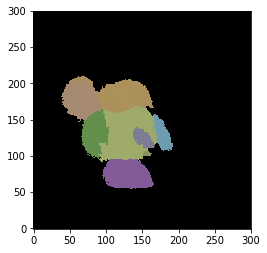

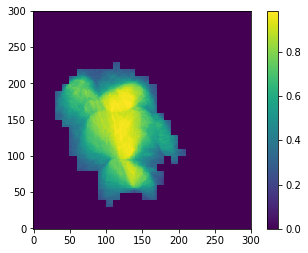

In [2]:
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)      # reduced binary data

# plot result from IceNine, first 2 layer combined:


-0.107578 0.00737535 0 1 9 1 195.382 31.3543 186.163 0.852201 1

<class 'str'>
sw is 0.72 

shape of snp is (11174, 11)


<IPython.core.display.Javascript object>


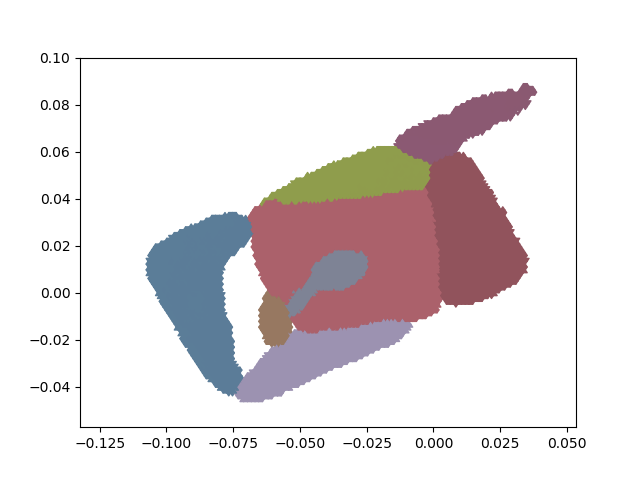

In [6]:
%matplotlib notebook
import MicFileTool
import IntBin
micFile = '/home/hedm/work/Au_calibrate/Au_Merged_0.85_0.82_gID_.mic'
m = MicFileTool.MicFile(micFile)
m.plot_mic_patches(1,0.6)

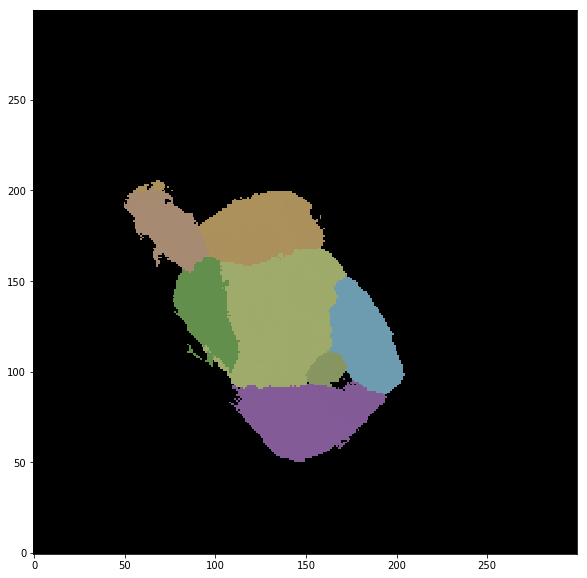

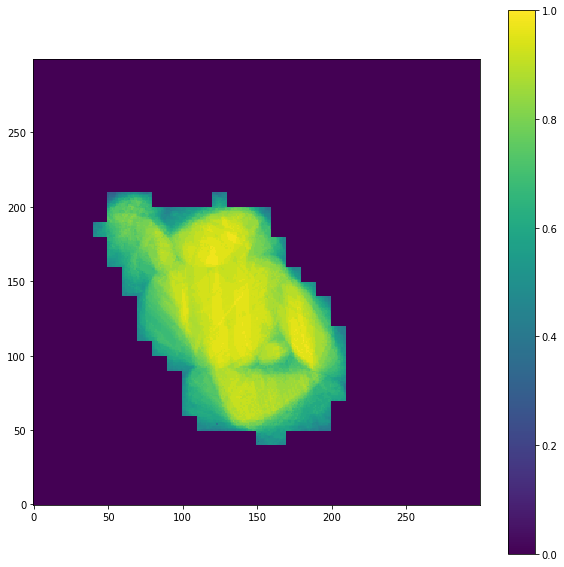

In [11]:
import numpy as np
import MicFileTool
d = np.load('Au_calibrate_300x300_0.001_shift_0_0_0.npy')
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(d,0.7)
MicFileTool.plot_conf_square_mic(d)

# try on layer z3

(256, 3)
8
 exp data loaded, shape is: (4411161, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 27652, voxelLeft: 1/25900.  max hitratio: 0.29411765933036804, peakcnt: 51,reconstructed euler angle [285.26500973  31.17858648  95.93240436]]]]]number of flood fills: 314
2.0943952
 voxelIdx: 65819, voxelLeft: 0/25900.  max hitratio: 0.290909081697464, peakcnt: 55,reconstructed euler angle [143.02809481  27.65636775 259.43831491]5]max misorien: 1.281193494796753
1.2811935
 voxelIdx: 65819, voxelLeft: 0/25900.  max hitratio: 0.290909081697464, peakcnt: 55,reconstructed euler angle [143.00396933  27.66452312 259.46593636]4]max misorien: 1.1454405784606934
1.1454406
 voxelIdx: 65790, voxelLeft: 0/25900.  max hitratio: 0.3333333432674408, peakcnt: 54,recons

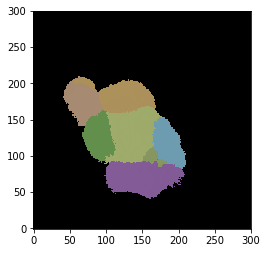

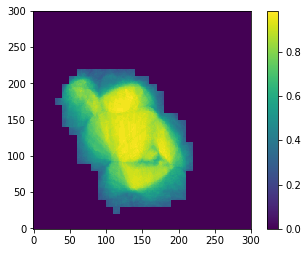

In [2]:
# try large Q 
#mask_300_300 = np.load('gold_calibrate_mask_300_300.npy')
import numpy as np
import pickle
with open('gold_calibrate_twiddle_run1.p', 'rb') as input:
    centerL, centerJ, centerK, centerRot  = pickle.load(input)

# first make a mask:
import matplotlib.pyplot as plt
mask_30_30 = np.load('Au_calibrate_z3_30x30_0.01_shift_0_0_0.npy')[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(8)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0],mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z3_300x300_0.001_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

# using david's parameter: /home/hedm/work/Au_calibrate/Fits/z2-fullRotation/ConfigFiles/Au_fullRotation_PMC3_.opt_det0

In [1]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z3_david_30x30_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

mask_30_30 = np.load(S.squareMicOutFile)[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')


S.set_Q(10)
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0], mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z3_david_300x300_0.001_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 10000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (4411161, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 320, voxelLeft: 1/900.  max hitratio: 0.3181818127632141, peakcnt: 44,reconstructed euler angle [  4.93096023  40.21931773 323.10125059]]]]number of flood fills: 21
1.598005
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.05000000074505806, peakcnt: 40,reconstructed euler angle [  5.93149579  44.26409493 347.19777711]max misorien: 1.5229688882827759
1.5229689
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.05000000074505806, peakcnt: 40,reconstructed euler angle [  5.958507    44.22360586 347.16884396]max misorien: 1.4273269176483154
1.4273269
 voxelIdx: 892, voxelLeft: 0/900.  max hitratio: 0.06818182021379471, peakcnt: 44,reconstructed euler angl

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

 exp data loaded, shape is: (4411161, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 44737, voxelLeft: 1/24300.  max hitratio: 0.49462366104125977, peakcnt: 93,reconstructed euler angle [284.72785708  31.37377744  96.20841224]]]]]number of flood fills: 229
2.0943952
 voxelIdx: 68799, voxelLeft: 0/24300.  max hitratio: 0.15555556118488312, peakcnt: 90,reconstructed euler angle [144.4522158   27.46242111 258.00304668]max misorien: 1.2311655282974243
1.2311655
 voxelIdx: 68799, voxelLeft: 0/24300.  max hitratio: 0.15555556118488312, peakcnt: 90,reconstructed euler angle [144.44829376  27.4670185  257.96359538]max misorien: 1.1454726457595825
1.1454726
 voxelIdx: 63972, voxelLeft: 0/24300.  max hitratio: 0.2068965584039688, peakcnt: 87,reconstructed eu

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

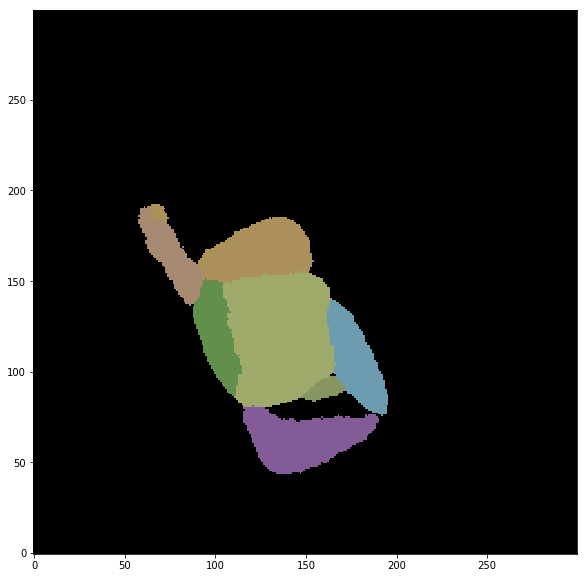

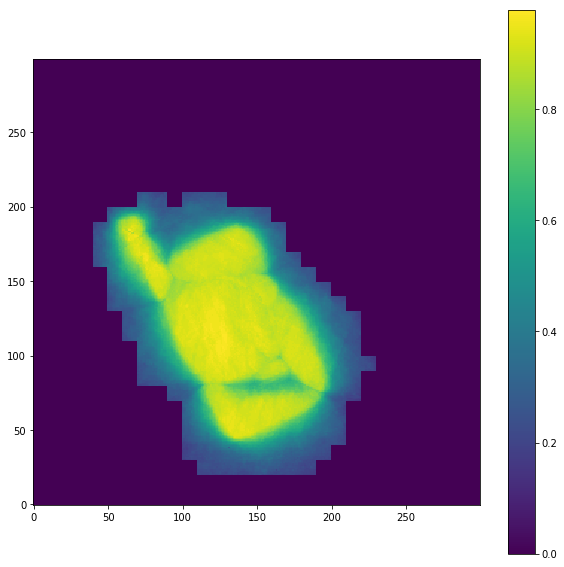

In [5]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.8)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (3403435, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 545, voxelLeft: 1/900.  max hitratio: 0.1702127605676651, peakcnt: 47,reconstructed euler angle [ 45.95227577  43.80064582 295.39950735]]]]number of flood fills: 17
1.6345521
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.0476190485060215, peakcnt: 42,reconstructed euler angle [186.23001174  43.82924655 192.8453913 ]]max misorien: 1.6307644844055176
1.6307645
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.0476190485060215, peakcnt: 42,reconstructed euler angle [186.19157158  43.86939812 192.81893192]]8e-02]max misorien: 1.3394678831100464
1.3394679
 voxelIdx: 896, voxelLeft: 0/900.  max hitratio: 0.06976744532585144, peakcnt: 43,reconstructed eul

<IPython.core.display.Javascript object>


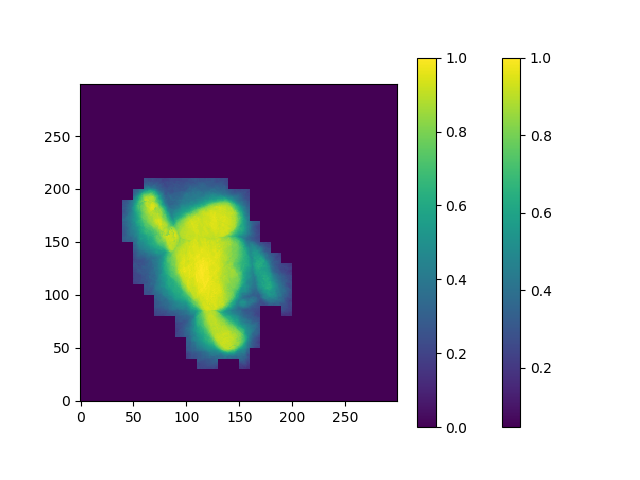

 exp data loaded, shape is: (3403435, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 22405, voxelLeft: 1/19600.  max hitratio: 0.2527472674846649, peakcnt: 91,reconstructed euler angle [  9.12232826  34.69910907 337.85260318]]]]]]]number of flood fills: 212
2.0943952
 voxelIdx: 59829, voxelLeft: 0/19600.  max hitratio: 0.1538461595773697, peakcnt: 91,reconstructed euler angle [ 44.64775943  44.87120673 296.99929895]]max misorien: 1.5621929168701172
1.5621929
 voxelIdx: 59829, voxelLeft: 0/19600.  max hitratio: 0.1538461595773697, peakcnt: 91,reconstructed euler angle [ 44.67460936  44.87829002 297.01801395]]max misorien: 1.229983925819397
1.2299839
 voxelIdx: 59829, voxelLeft: 0/19600.  max hitratio: 0.1538461595773697, peakcnt: 91,reconstructed eu

In [6]:
# try david's parameters on z2
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z2_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z2_david_30x30_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

mask_30_30 = np.load(S.squareMicOutFile)[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')


S.set_Q(10)
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0], mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z2_david_300x300_0.001_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

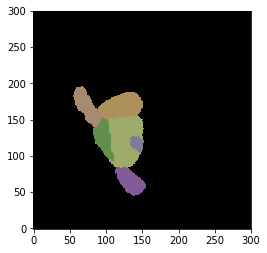

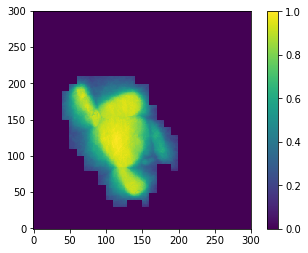

In [9]:
%matplotlib inline 
MicFileTool.plot_square_mic(S.squareMicData,0.7)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (2285282, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 279, voxelLeft: 1/900.  max hitratio: 0.10204081982374191, peakcnt: 49,reconstructed euler angle [  2.38326998 119.08361025 357.67547802]]]]e-01]number of flood fills: 18
1.6249914
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.043478261679410934, peakcnt: 46,reconstructed euler angle [ 35.65154492  45.67731989 331.83624574]max misorien: 1.612762689590454
1.6127627
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.043478261679410934, peakcnt: 46,reconstructed euler angle [ 35.60361849  45.62166109 331.87356535]max misorien: 1.4871580600738525
1.4871581
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.043478261679410934, peakcnt: 46,reconstructed e

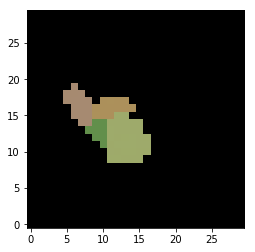

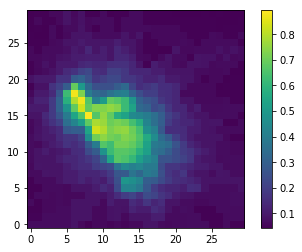

 exp data loaded, shape is: (2285282, 4).
=============start of copy exp data to gpu ===========
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'int'>
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 21799, voxelLeft: 1/13100.  max hitratio: 0.3478260934352875, peakcnt: 92,reconstructed euler angle [  9.34958404  34.8608721  337.64802326]]]]]]]number of flood fills: 138
2.0943952
 voxelIdx: 59819, voxelLeft: 0/13100.  max hitratio: 0.17977528274059296, peakcnt: 89,reconstructed euler angle [ 45.44918197  44.98342115 296.17298489]max misorien: 1.5119354724884033
1.5119355
 voxelIdx: 59819, voxelLeft: 0/13100.  max hitratio: 0.17977528274059296, peakcnt: 89,reconstructed euler angle [ 45.47245806  44.9710167  296.18429511]max misorien: 1.1475398540496826
1.1475399
 voxelIdx: 51971, voxelLeft: 0/13100.  max hitratio: 0.21348313987255096, peakcnt: 89,reconstructed 

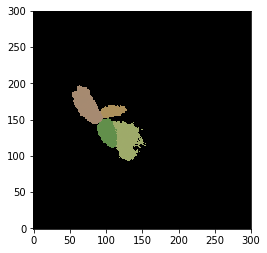

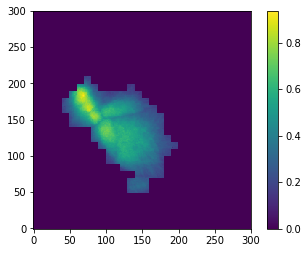

In [10]:
# try david's parameters on z2
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z1_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z1_david_30x30_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

mask_30_30 = np.load(S.squareMicOutFile)[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')


S.set_Q(10)
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0], mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z1_david_300x300_0.001_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

-0.115313 -0.054735 0 2 9 0 316.254 44.9269 25.6363 0 0.980769 0 0 1 1 1 0 0 0

<class 'str'>
sw is 0.72 

shape of snp is (34160, 19)


<IPython.core.display.Javascript object>


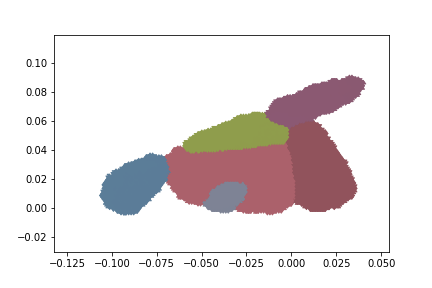

In [13]:

%matplotlib notebook
import MicFileTool
import IntBin
micFile = '/home/hedm/work/Au_calibrate/Au_fullRotation_z2_Fit2_.mic.LBFS'
m = MicFileTool.MicFile(micFile)
m.plot_mic_patches(1,0.6)

-0.115313 -0.054735 0 2 9 0 195.1 31.9588 186.462 0 0.949098 0 0 1 1 1 0 0 0

<class 'str'>
sw is 0.72 

shape of snp is (34160, 19)


<IPython.core.display.Javascript object>


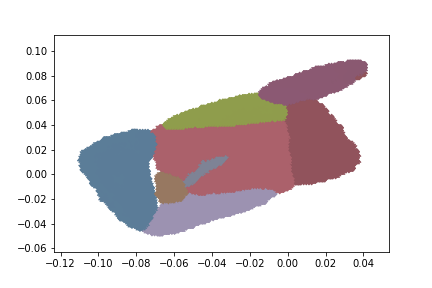

In [15]:

%matplotlib notebook
import MicFileTool
import IntBin
micFile = '/home/hedm/work/Au_calibrate/Au_fullRotation_z3_Fit5_.mic.LBFS'
m = MicFileTool.MicFile(micFile)
m.plot_mic_patches(1,0.6)

-0.115313 -0.054735 0 2 9 0 195.604 31.7156 185.848 0 0.936531 0 0 1 1 1 0 0 0

<class 'str'>
sw is 0.72 

shape of snp is (34160, 19)


<IPython.core.display.Javascript object>


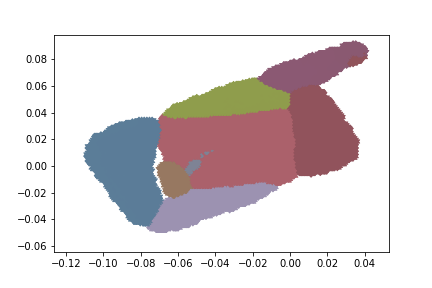

In [16]:
%matplotlib notebook
import MicFileTool
import IntBin
micFile = '/home/hedm/work/Au_calibrate/Au_fullRotation_z4_Fit1_.mic.LBFS'
m = MicFileTool.MicFile(micFile)
m.plot_mic_patches(1,0.6)

# combine z2 and z3:

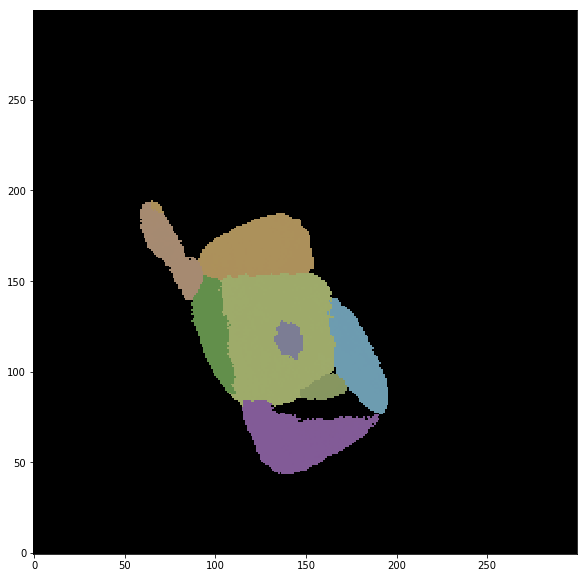

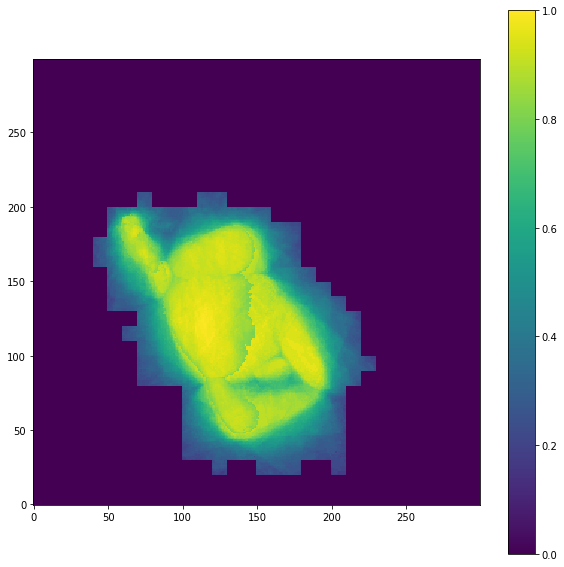

In [3]:
z2Mic = np.load('Au_calibrate_z2_david_300x300_0.001_shift_0_0_0.npy')
z3Mic = np.load('Au_calibrate_z3_david_300x300_0.001_shift_0_0_0.npy')
newMic = np.copy(z3Mic)
x,y  =  np.where(z2Mic[:,:,6]>0.8)
newMic[x,y,:] = z2Mic[x,y,:]
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(newMic,0.8)
MicFileTool.plot_conf_square_mic(newMic)

# try 3 dets

In [ ]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677, 8.07811]])
centerJ = np.array([[928.821, 940.444, 942.902]])
centerK = np.array([[2030.67, 2026.39, 2024.06]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513],
                       [89.473, 90.2258,  359.597]]])

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import time
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z2_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z2_david_30x30_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()

time.sleep(1)
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)
time.sleep(1)
mask_30_30 = np.load(S.squareMicOutFile)[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')

S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.FZFile = '/home/hedm/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/hedm/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z2_'      # reduced binary data
S.expdataNDigit = 6     
S.set_Q(9)
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0], mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'Au_calibrate_z2_david_300x300_0.001_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 10000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()

time.sleep(1)
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)
time.sleep(1)

(256, 3)
7
 exp data loaded, shape is: (4822176, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 865, voxelLeft: 1/900.  max hitratio: 0.08571428805589676, peakcnt: 35,reconstructed euler angle [ 45.16393155  43.73258554 355.62202264]]]]number of flood fills: 20
start of post processing, moving grain boundaries untile stable
 Iteration: 40, max misorien: 0.0006905339541845024number of post process iteration: 40, number of voxel revisited: 3204
 post process takes is 72.90987968444824 seconds
===========end of reconstruction========== 

SourceModule time 128.0167109375 seconds.
saved as npy format


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

(256, 3)
 exp data loaded, shape is: (4822176, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 47457, voxelLeft: 1/19500.  max hitratio: 0.13725490868091583, peakcnt: 51,reconstructed euler angle [260.39902278  50.84251675 336.44809586]]]]]number of flood fills: 311
start of post processing, moving grain boundaries untile stable
 Iteration: 1, max misorien: 1.233351469039917

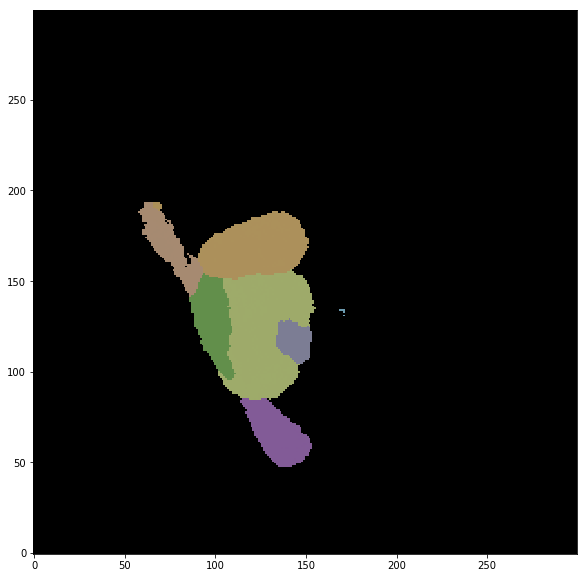

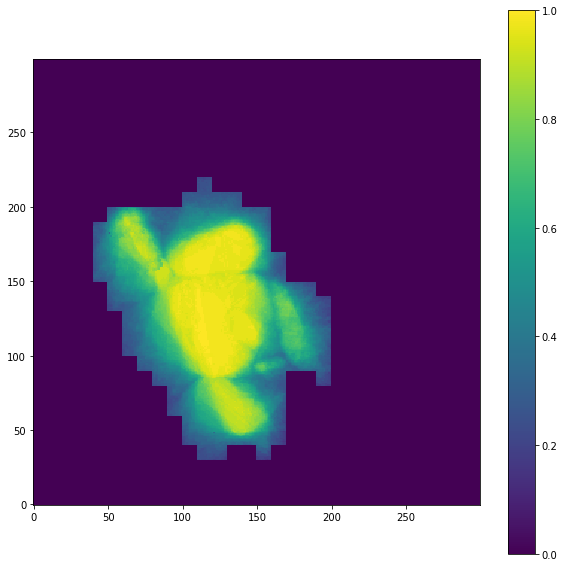

In [5]:
MicFileTool.plot_square_mic(S.squareMicData,0.8)
MicFileTool.plot_conf_square_mic(S.squareMicData)

In [1]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677, 8.07811]])
centerJ = np.array([[928.821, 940.444, 942.902]])
centerK = np.array([[2030.67, 2026.39, 2024.06]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513],
                       [89.473, 90.2258,  359.597]]])

import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
# prepare reconstructor, load in data
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.set_Q(7)
print(S.maxQ)
S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
S.create_square_mic([30,30],voxelsize=0.01,shift=[0.0,0.0,0])                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'outputs/Au_calibrate_z3_david_30x30_0.01_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 5000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

mask_30_30 = np.load(S.squareMicOutFile)[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_300_30 = np.repeat(mask_30_30, 10, axis=0)
mask_300_300 = np.repeat(mask_300_30, 10, axis=1)
plt.imshow(mask_300_300.T, origin='lower')

S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) 
S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6     
S.set_Q(9)
S.create_square_mic([300,300],voxelsize=0.001,shift=[0.0,0.0,0], mask=mask_300_300)                             # resolution of reconstruction and voxel size
S.squareMicOutFile = 'outputs/Au_calibrate_z3_david_300x300_0.001_shift_0_0_0.npy'             # output file name
S.searchBatchSize = 10000                                                 # number of orientations search at each iteration, larger number will take longer time.
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
# blind search for parameters
# find approximate parameter first, after maxhitratio mostly above 0.65, can move to the next phase
S.serial_recon_multi_stage()
MicFileTool.plot_square_mic(S.squareMicData,0.5)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 145, voxelLeft: 1/900.  max hitratio: 0.05882352963089943, peakcnt: 34,reconstructed euler angle [195.11375212  45.55068602 185.45467596]]]]-01]number of flood fills: 23
1.6177042
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.0625, peakcnt: 32,reconstructed euler angle [186.67476665  37.90474781 182.9826255 ]311.73557152]]-01]max misorien: 1.6178970336914062
1.617897
 voxelIdx: 899, voxelLeft: 0/900.  max hitratio: 0.0625, peakcnt: 32,reconstructed euler angle [186.69144517  37.85728681 182.9726125 ]311.73557152]]-0

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

(256, 3)
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 26495, voxelLeft: 1/23700.  max hitratio: 0.5, peakcnt: 54,reconstructed euler angle [129.16495803  27.01078208 186.74119705]]  96.06921298]]]]]]number of flood fills: 280
2.0943952
 voxelIdx: 68799, voxelLeft: 0/23700.  max hitratio: 0.18518517911434174, peakcnt: 54,reconstructed euler angle [143.08266631  27.67806927 259.26316178]max misorien: 1.247140645980835
1.2471406
 voxelIdx: 68798, voxelLeft: 0/23700.  max hitratio: 0.18518517911434174, peakcnt: 54,reconstructed euler angle [143.97008731  27.52643899 258.14893962]

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 2 Axes>

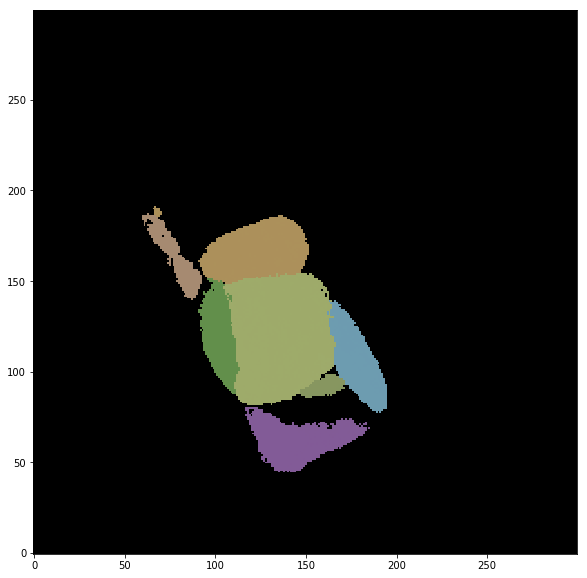

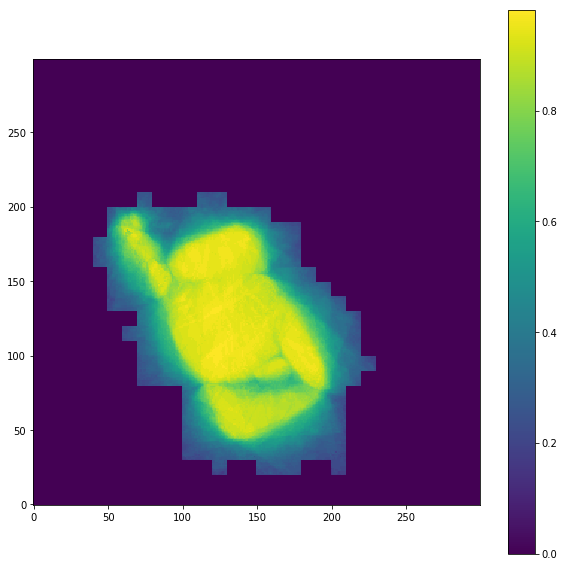

In [8]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.8)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (4236694, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 277, voxelLeft: 1/900.  max hitratio: 0.2926829159259796, peakcnt: 41,reconstructed euler angle [129.16800327  27.23677764 186.58971696]number of flood fills: 23
start of post processing, moving grain boundaries untile stable
 Iteration: 18, max misorien: 0.0006905339541845024number of post process iteration: 18, number of voxel revisited: 2833
 post process takes is 25.43591594696045 seconds
===========end of reconstruction========== 

SourceModule time 45.7521953125 seconds.
saved as npy format


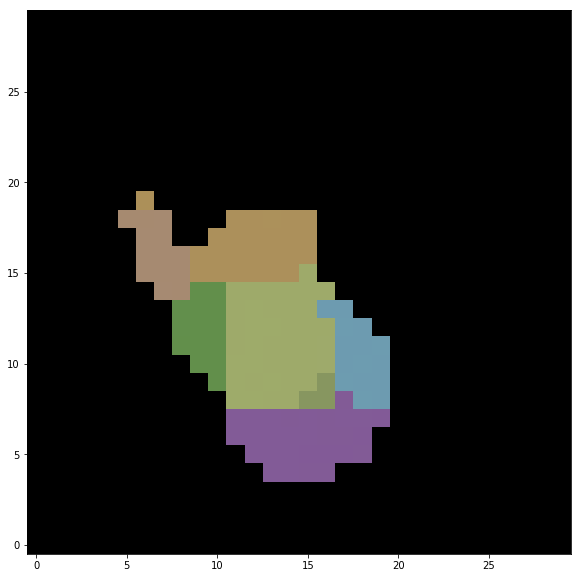

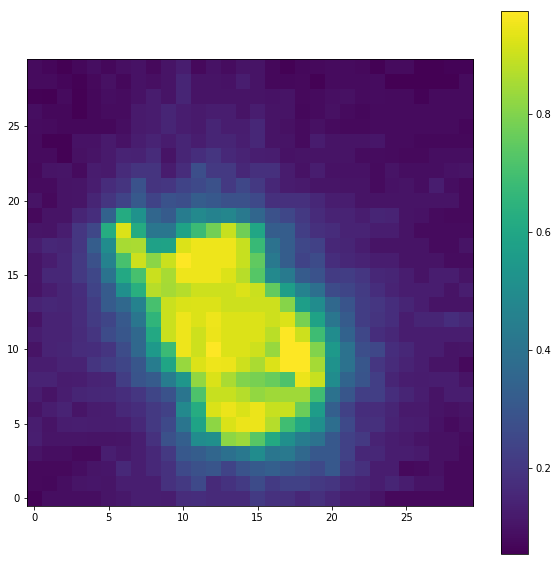

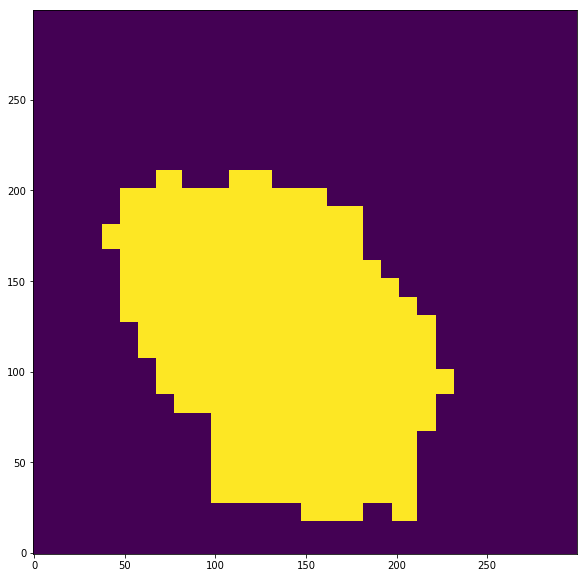

(256, 3)
7
 exp data loaded, shape is: (4236694, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 22592, voxelLeft: 1/25216.  max hitratio: 0.32499998807907104, peakcnt: 40,reconstructed euler angle [129.41912334  26.91495407 186.47867163]number of flood fills: 236
start of post processing, moving grain boundaries untile stable
 Iteration: 66, max misorien: 0.0006905339541845024number of post process iteration: 66, number of voxel revisited: 24613
 post process takes is 226.27753448486328 seconds
===========end of reconstruction========== 

SourceModule time 621.717625 seconds.
saved as npy format


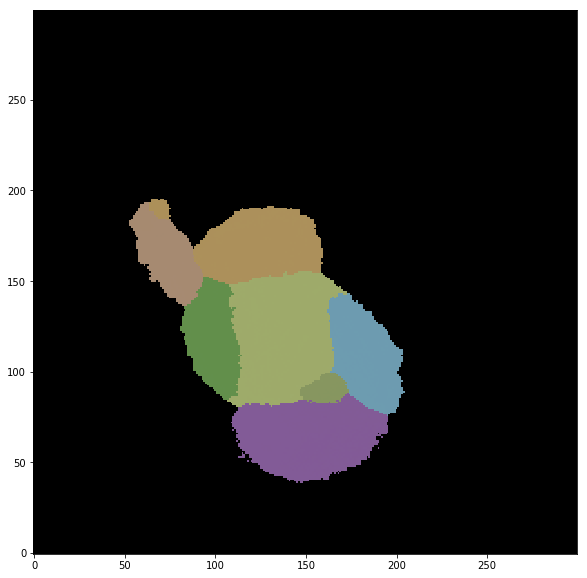

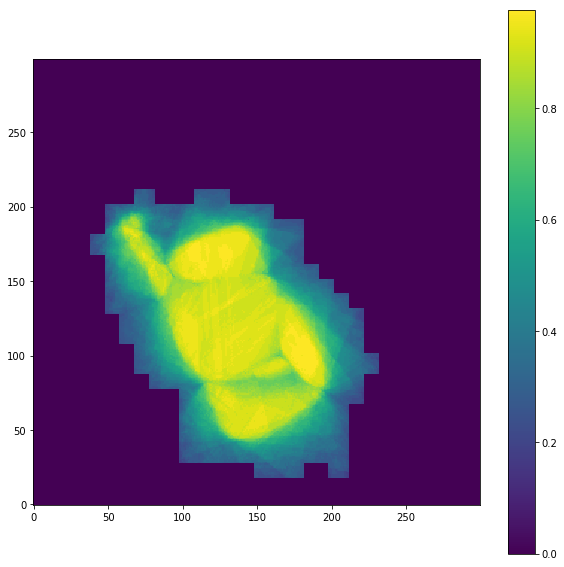

In [5]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

centerL = np.array([[5.0923, 6.55677, 8.07811]])
centerJ = np.array([[928.821, 940.444, 942.902]])
centerK = np.array([[2030.67, 2026.39, 2024.06]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513],
                       [89.473, 90.2258,  359.597]]])

# step 2: start reconstruction with calibrated configuration (parameters)
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
import scipy.ndimage as ndi

############ low resolution reconstruction
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
S.set_Q(7)
print(S.maxQ)

S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
imgsize = [30, 30]
voxelSize = 0.01
shift = [0.0, 0.0, 0.0]
S.create_square_mic(imgsize,
                    voxelsize=voxelSize,
                    shift=shift,
                   )# resolution of reconstruction and voxel size
S.squareMicOutFile = 'output/gold_calibrate_z3_' \
                    + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                    + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
S.intensity_threshold = 2 # throw away peaks with intensity below this value
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
S.serial_recon_multi_stage()

#388seconds with verbose
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.6)
MicFileTool.plot_conf_square_mic(S.squareMicData)

######### create mask
mask_15_15 = np.load(S.squareMicOutFile)[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_150_15 = np.repeat(mask_15_15, 10, axis=0)
mask_150_150 = np.repeat(mask_150_15, 10, axis=1)
mask_150_150 = ndi.maximum_filter(mask_150_150,size=5)
plt.imshow(mask_150_150.T, origin='lower')
plt.show()

######## high resolution reconstruction
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
S.set_Q(7)
print(S.maxQ)

S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
imgsize = [300, 300]
voxelSize = 0.001
shift = [0.0, 0.0, 0.0]
S.create_square_mic(imgsize,
                    voxelsize=voxelSize,
                    shift=shift,
                    mask=mask_150_150,
                   )# resolution of reconstruction and voxel size
S.squareMicOutFile = 'output/gold_calibrate_z3_' \
                    + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                    + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
S.intensity_threshold = 2 # throw away peaks with intensity below this value
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
S.serial_recon_multi_stage()

#388seconds with verbose
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.6)
MicFileTool.plot_conf_square_mic(S.squareMicData)

In [1]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

centerL = np.array([[5.0923, 6.55677, 8.07811]])
centerJ = np.array([[928.821, 940.444, 942.902]])
centerK = np.array([[2030.67, 2026.39, 2024.06]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513],
                       [89.473, 90.2258,  359.597]]])

# step 2: start reconstruction with calibrated configuration (parameters)
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
import scipy.ndimage as ndi

############ low resolution reconstruction
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
S.set_Q(7)
print(S.maxQ)

S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
imgsize = [30, 30]
voxelSize = 0.01
shift = [0.0, 0.0, 0.0]
S.create_square_mic(imgsize,
                    voxelsize=voxelSize,
                    shift=shift,
                   )# resolution of reconstruction and voxel size
S.squareMicOutFile = 'output/gold_calibrate_z3_' \
                    + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                    + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
S.intensity_threshold = 2 # throw away peaks with intensity below this value
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
S.serial_recon_multi_stage(enablePostProcess=False)

#388seconds with verbose
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.6)
MicFileTool.plot_conf_square_mic(S.squareMicData)

######### create mask
mask_15_15 = np.load(S.squareMicOutFile)[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_150_15 = np.repeat(mask_15_15, 10, axis=0)
mask_150_150 = np.repeat(mask_150_15, 10, axis=1)
mask_150_150 = ndi.maximum_filter(mask_150_150,size=5)
plt.imshow(mask_150_150.T, origin='lower')
plt.show()

######## high resolution reconstruction
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
S.set_Q(7)
print(S.maxQ)

S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
imgsize = [300, 300]
voxelSize = 0.001
shift = [0.0, 0.0, 0.0]
S.create_square_mic(imgsize,
                    voxelsize=voxelSize,
                    shift=shift,
                    mask=mask_150_150,
                   )# resolution of reconstruction and voxel size
S.squareMicOutFile = 'output/gold_calibrate_z3_' \
                    + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                    + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
S.intensity_threshold = 2 # throw away peaks with intensity below this value
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
S.serial_recon_multi_stage(enablePostProcess=False)

#388seconds with verbose
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.6)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (4236694, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 481, voxelLeft: 1/900.  max hitratio: 0.12195122241973877, peakcnt: 41,reconstructed euler angle [146.39075969  28.63663987 256.67711507]number of flood fills: 22
===========end of reconstruction========== 

SourceModule time 20.195150390625 seconds.
saved as npy format


<Figure size 1000x1000 with 1 Axes>

<Figure size 1000x1000 with 2 Axes>

<Figure size 1000x1000 with 1 Axes>

(256, 3)
7
 exp data loaded, shape is: (4236694, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 16673, voxelLeft: 1/24300.  max hitratio: 0.26829269528388977, peakcnt: 41,reconstructed euler angle [ 4.0172693  39.42943939 53.07758497]number of flood fills: 226
===========end of reconstruction========== 

SourceModule time 374.42762500000003 seconds.
saved as npy format


<Figure size 1000x1000 with 1 Axes>

<Figure size 1000x1000 with 2 Axes>

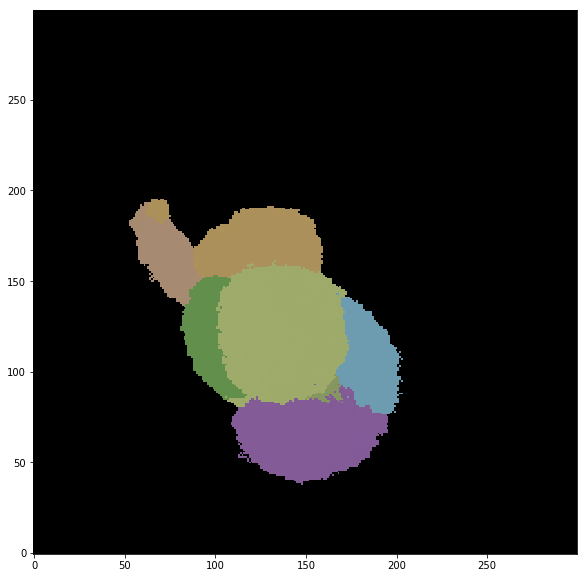

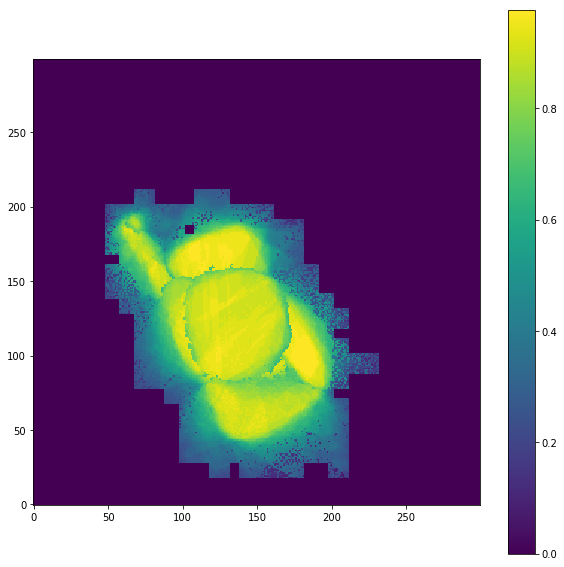

In [2]:
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.6)
MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 774, voxelLeft: 1/900.  max hitratio: 0.05263157933950424, peakcnt: 38,reconstructed euler angle [ 46.5421506   42.96060087 311.33786333]]]]number of flood fills: 13
start of post processing, moving grain boundaries untile stable
 Iteration: 18, max misorien: 0.0006905339541845024number of post process iteration: 18, number of voxel revisited: 2536
 post process takes is 20.706412315368652 seconds
===========end of reconstruction========== 

SourceModule time 41.784410156250004 seconds.
saved as npy format


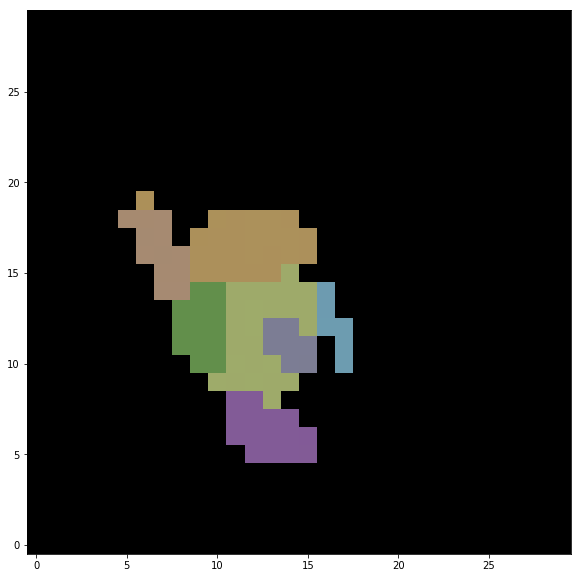

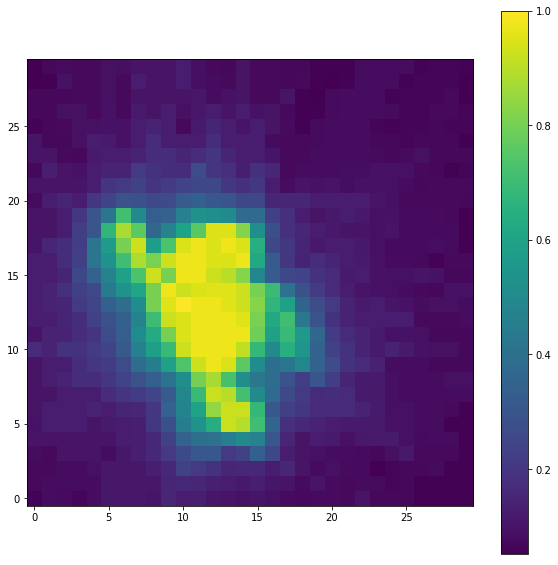

[[ 45.44860352  45.45571057 296.21234211]
 [ 46.0050726   46.09498627 295.6561028 ]
 [  9.49552117  35.33488098 337.85470765]
 [ 45.5934661   46.2224442  290.40876842]
 [129.24328411  27.04926707 186.54952768]
 [  9.04252865  34.76849953 337.71089091]
 [  7.17521275  40.51206293 320.50706673]
 [ 45.99946158  45.59886739 295.84922035]
 [  9.7334514   34.81941599 337.66183285]
 [260.29916501  20.84709798  97.51640907]
 [129.28539269  27.04954863 186.40369678]
 [147.17490642  34.76401768 178.53537681]
 [  9.33027815  35.18139437 337.23433327]
 [129.12769283  27.25959773 186.85349742]
 [  4.86997657  39.60738952 322.35282719]
 [  4.81684787  39.58815832 322.74791358]
 [284.82184052  31.37022397  96.19323875]
 [124.12204232  26.2992408  191.87245186]
 [284.55458778  31.01097125  96.87282619]
 [  5.15088747  40.15488367 323.02303843]
 [  5.59155153  40.69320468 322.34326429]
 [  4.1309489   40.60935293 323.2631567 ]
 [285.03444746  31.57479574  96.69374488]
 [ 45.153741    44.90850131 296.20

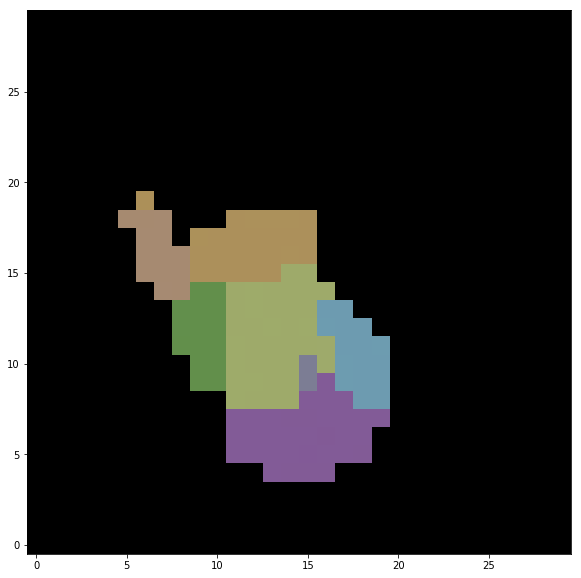

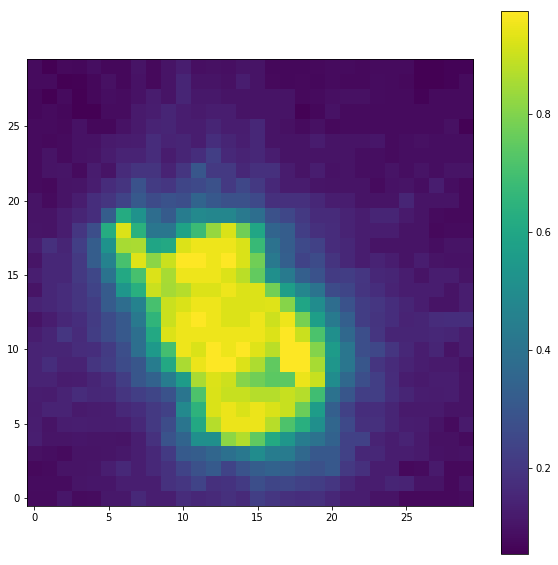

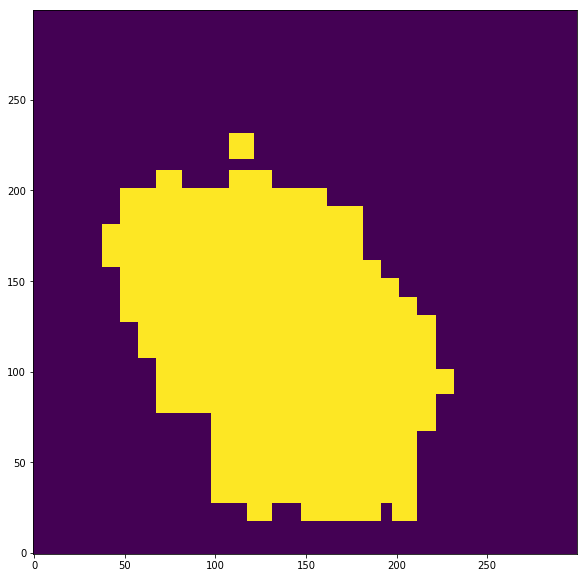

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 34722, voxelLeft: 1/25852.  max hitratio: 0.2750000059604645, peakcnt: 40,reconstructed euler angle [  4.41853509  40.11945613 323.43254354]]]]]]number of flood fills: 273
start of post processing, moving grain boundaries untile stable
 Iteration: 63, max misorien: 0.0006905339541845024number of post process iteration: 63, number of voxel revisited: 9642
 post process takes is 88.15674781799316 seconds
===========end of reconstruction========== 

SourceModule time 646.842125 seconds.
saved as npy format


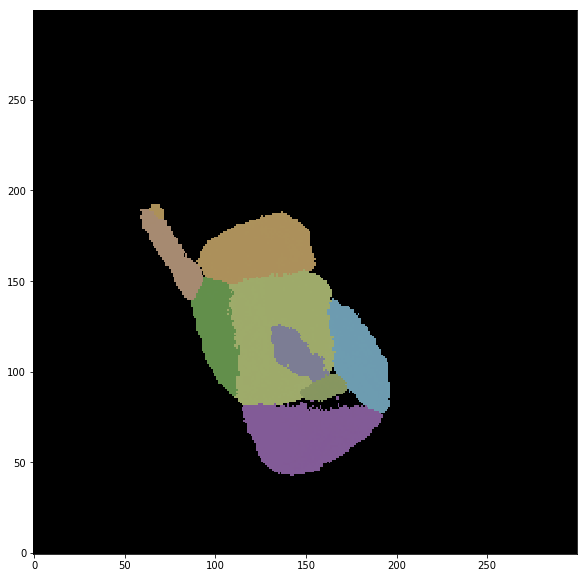

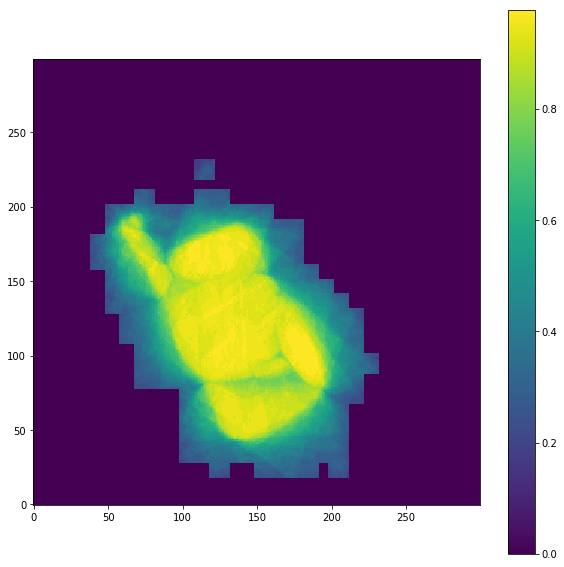

In [1]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

centerL = np.array([[5.0923, 6.55677, 8.07811]])
centerJ = np.array([[928.821, 940.444, 942.902]])
centerK = np.array([[2030.67, 2026.39, 2024.06]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513],
                       [89.473, 90.2258,  359.597]]])

# step 2: start reconstruction with calibrated configuration (parameters)
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
import scipy.ndimage as ndi

############ low resolution reconstruction
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
S.set_Q(7)
print(S.maxQ)

S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z2_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
imgsize = [30, 30]
voxelSize = 0.01
shift = [0.0, 0.0, 0.0]
S.create_square_mic(imgsize,
                    voxelsize=voxelSize,
                    shift=shift,
                   )# resolution of reconstruction and voxel size
S.squareMicOutFile = 'output/gold_calibrate_z2_' \
                    + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                    + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
S.intensity_threshold = 2 # throw away peaks with intensity below this value
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
S.serial_recon_multi_stage(enablePostProcess=True)

#388seconds with verbose
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.6)
MicFileTool.plot_conf_square_mic(S.squareMicData)
eulers,label,numFeatures = S.extract_orientations()
print(eulers)


############ low resolution reconstruction
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
S.set_Q(7)
print(S.maxQ)

S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.additionalFZ = eulers
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
imgsize = [30, 30]
voxelSize = 0.01
shift = [0.0, 0.0, 0.0]
S.create_square_mic(imgsize,
                    voxelsize=voxelSize,
                    shift=shift,
                   )# resolution of reconstruction and voxel size
S.squareMicOutFile = 'output/gold_calibrate_z3_' \
                    + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                    + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
S.intensity_threshold = 0 # throw away peaks with intensity below this value
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
S.serial_recon_multi_stage(enablePostProcess=True)

#388seconds with verbose
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.6)
MicFileTool.plot_conf_square_mic(S.squareMicData)

######### create mask
mask_15_15 = np.load(S.squareMicOutFile)[:,:,6]>0.3
#mask_30_30 = S.squareMicData[:,:,6]>0.5
mask_150_15 = np.repeat(mask_15_15, 10, axis=0)
mask_150_150 = np.repeat(mask_150_15, 10, axis=1)
mask_150_150 = ndi.maximum_filter(mask_150_150,size=5)
plt.imshow(mask_150_150.T, origin='lower')
plt.show()

######## high resolution reconstruction
S = reconstruction.Reconstructor_GPU()
S.NDet = 3
S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
S.set_Q(7)
print(S.maxQ)

S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
S.additionalFZ = eulers
S.set_sample('gold')
S.energy = 65.351
S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
S.expdataNDigit = 6                                                       # number of digit in the binary file name
imgsize = [300, 300]
voxelSize = 0.001
shift = [0.0, 0.0, 0.0]
S.create_square_mic(imgsize,
                    voxelsize=voxelSize,
                    shift=shift,
                    mask=mask_150_150,
                   )# resolution of reconstruction and voxel size
S.squareMicOutFile = 'output/gold_calibrate_z3_' \
                    + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                    + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
S.intensity_threshold = 0 # throw away peaks with intensity below this value
S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
S.serial_recon_multi_stage(enablePostProcess=True)

#388seconds with verbose
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.8)
MicFileTool.plot_conf_square_mic(S.squareMicData)

<IPython.core.display.Javascript object>


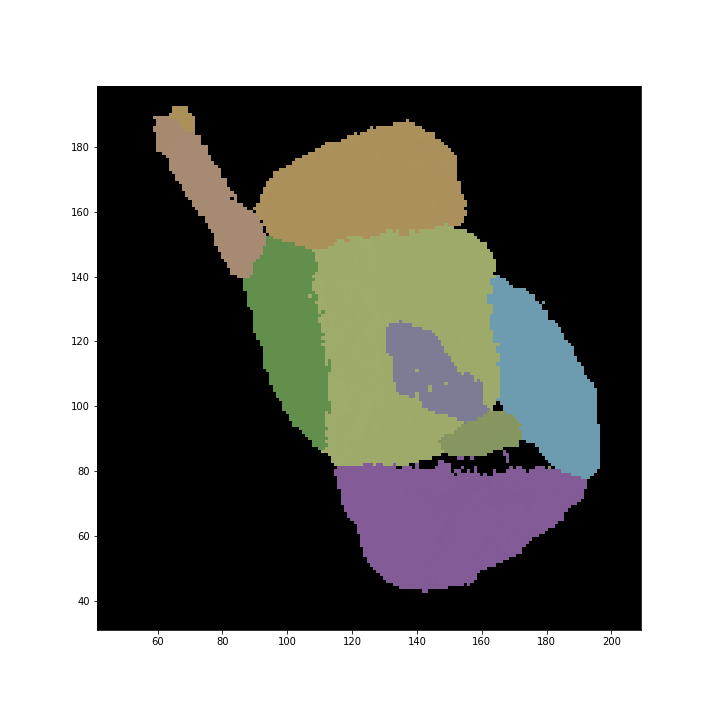

In [7]:
%matplotlib 
import matplotlib.pyplot as plt
import MicFileTool
#plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(S.squareMicData,0.8)
plt.show()
# #MicFileTool.plot_conf_square_mic(S.squareMicData)
# plt.imshow(label.T,origin='lower')
# plt.colorbar()

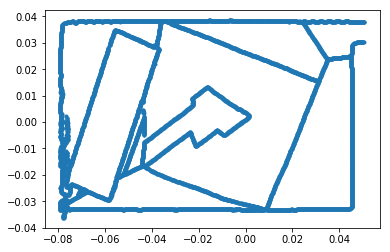

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/home/heliu/work/Au_calibrate/DeNoised_Registered_Flipped_EBSD_GrainBoundaries.txt',header=None)
plt.plot(df.iloc[:,0],df.iloc[:,1],'.')
plt.show()

In [3]:
import RotRep
twinEulers = RotRep.generate_twin_oriens_euler(S.extract_orientations(),symType='FCC')
print(twinEulers)

(196, 3, 3) (49, 3, 3) (4, 3, 3)
[[3.60461128e+00 1.38510788e+00 3.03318500e+00]
 [5.81742559e+00 2.84456253e+00 3.03104926e+00]
 [3.02132904e-01 6.40956828e-01 4.66675838e+00]
 [4.06149113e+00 1.91697870e+00 5.48837664e+00]
 [2.46125662e+00 5.71904211e-01 3.24916179e+00]
 [5.29957615e+00 1.70039682e+00 2.10028572e+00]
 [5.73311405e+00 1.59301098e+00 4.57773487e+00]
 [2.83298694e+00 3.01759956e+00 3.81125775e+00]
 [3.20580877e+00 5.57206907e-01 2.89525517e+00]
 [5.59431222e+00 1.97128641e+00 2.46214344e+00]
 [5.68751800e+00 1.20358478e+00 4.86912157e+00]
 [3.34402323e+00 2.64579784e+00 4.59054185e+00]
 [5.34830339e+00 1.17180790e+00 1.20282938e+00]
 [7.21520860e-01 1.36929635e+00 2.73666631e+00]
 [3.99744109e+00 1.09403658e+00 5.83308580e+00]
 [2.49922812e+00 1.29682639e+00 4.24703489e+00]
 [4.31137728e+00 8.48845579e-01 3.00760770e+00]
 [1.30931724e-01 2.08757966e+00 3.84327384e+00]
 [5.09430775e+00 6.13156075e-01 6.25751386e+00]
 [3.18778921e+00 1.91463140e+00 5.48186024e+00]
 [2.966

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 744, voxelLeft: 1/900.  max hitratio: 0.05882352963089943, peakcnt: 34,reconstructed euler angle [ 44.93594239  43.82466437 356.15682599]]]]number of flood fills: 16
start of post processing, moving grain boundaries untile stable
 Iteration: 27, max misorien: 0.0006905339541845024number of post process iteration: 27, number of voxel revisited: 7163
 post process takes is 58.368043661117554 seconds
===========end of reconstruction========== 

SourceModule time 79.6833125 seconds.
saved as npy format


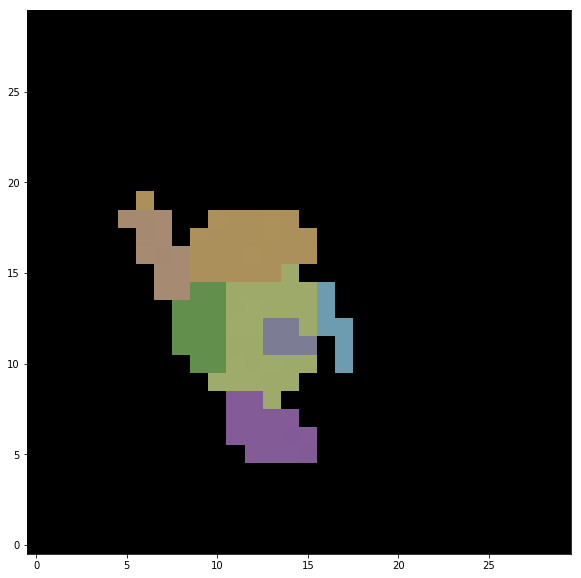

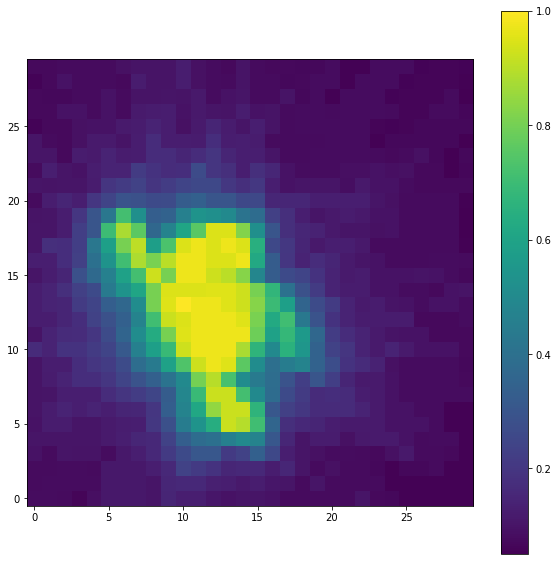

[[ 45.28506092  45.32239169 296.21285955]
 [  9.87156938  35.55611926 338.25451937]
 [ 45.53299071  46.19173488 290.57223099]
 [ 45.44944342  45.54100332 296.1553529 ]
 [128.85416613  27.32477577 187.01398091]
 [  9.85555663  41.198183   319.53878934]
 [  9.74337818  34.81136937 337.66061479]
 [260.76138702  20.62977231  97.14086976]
 [ 45.84258238  45.56359465 295.92136067]
 [146.92709864  34.69641404 178.65967372]
 [129.2207854   26.93289629 186.27552856]
 [  9.33490576  35.18077746 337.22799559]
 [  4.44628583  39.74064128 322.73884229]
 [129.45227499  27.40824763 186.76105951]
 [129.10112376  27.22458793 186.86965803]
 [  4.84789025  39.5810597  322.41194863]
 [284.79039115  31.42060393  96.22616359]
 [284.86130779  31.37554082  96.18177592]
 [124.38577659  26.3913446  191.63153784]
 [284.6104584   31.01640391  96.84376332]
 [  5.20123583  40.13211112 322.98024443]
 [  5.56482204  40.86793908 322.30490619]
 [ 45.16622772  44.9099954  296.20477408]
 [  4.30173319  40.1368058  323.96

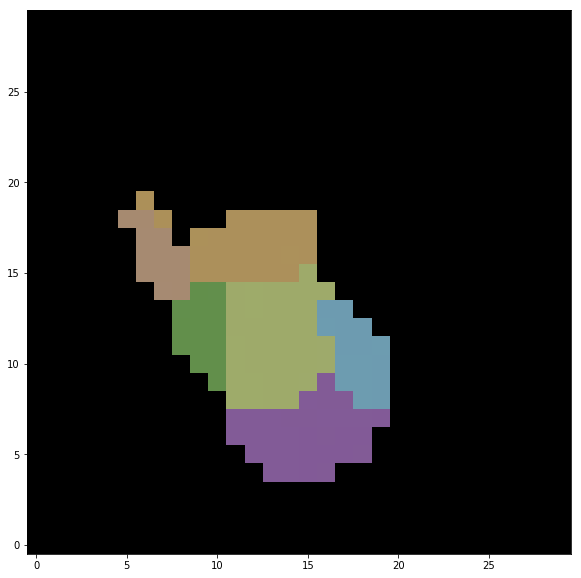

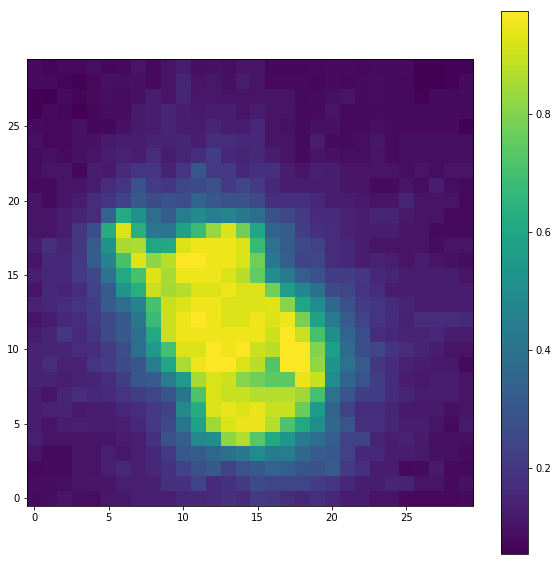

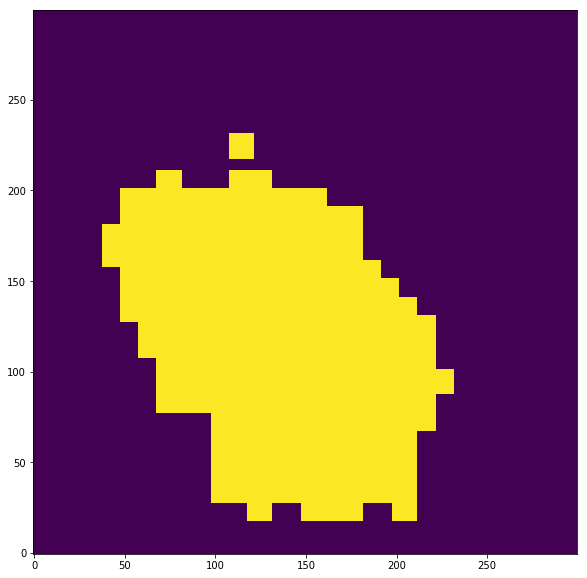

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 18728, voxelLeft: 1/25752.  max hitratio: 0.2857142984867096, peakcnt: 42,reconstructed euler angle [129.12070978  27.12828232 186.84782946]]]]]]number of flood fills: 284
start of post processing, moving grain boundaries untile stable
 Iteration: 246, max misorien: 0.0006905339541845024number of post process iteration: 246, number of voxel revisited: 42106
 post process takes is 381.25857615470886 seconds
===========end of reconstruction========== 

SourceModule time 1490.335125 seconds.
saved as npy format


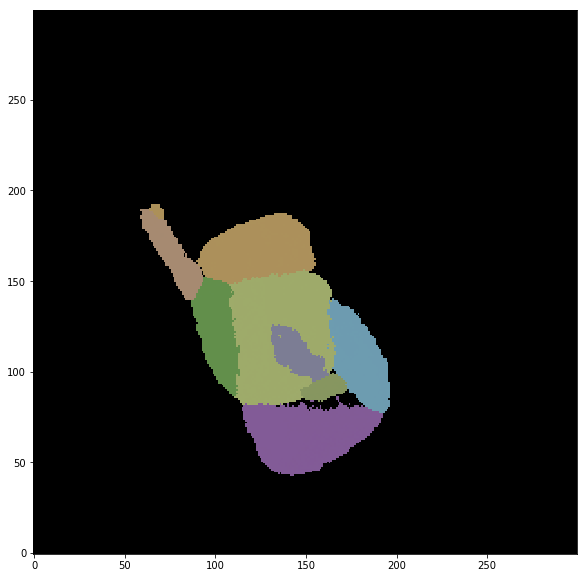

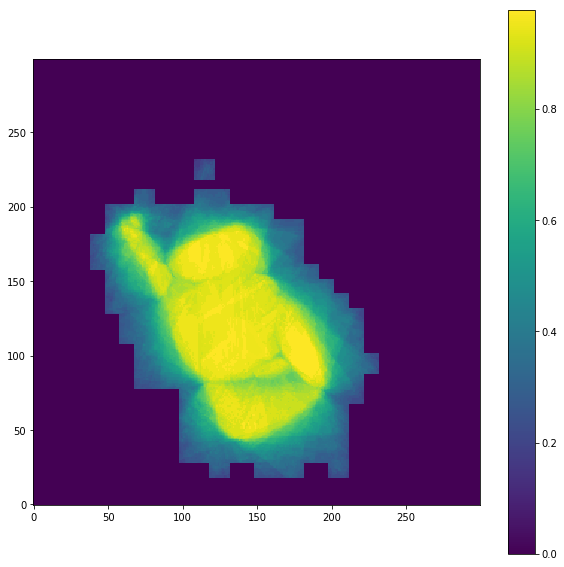

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 279, voxelLeft: 1/900.  max hitratio: 0.5952380895614624, peakcnt: 42,reconstructed euler angle [129.13277319  27.19431105 186.87020532]]9]]number of flood fills: 14
start of post processing, moving grain boundaries untile stable
 Iteration: 81, max misorien: 0.0006905339541845024number of post process iteration: 81, number of voxel revisited: 9960
 post process takes is 84.6612024307251 seconds
===========end of reconstruction========== 

SourceModule time 105.8547578125 seconds.
saved as npy format


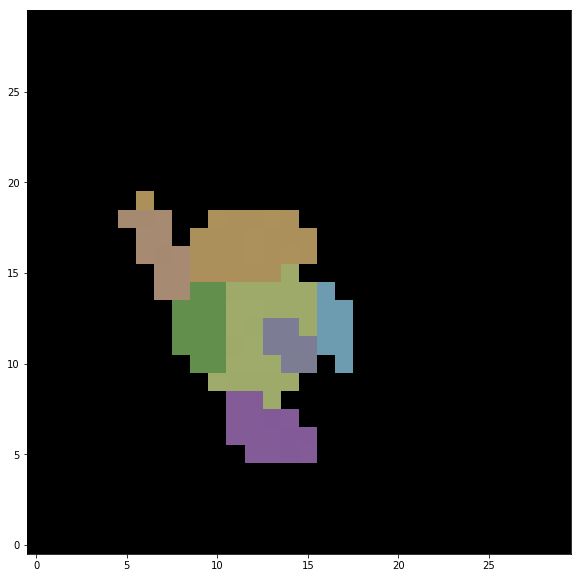

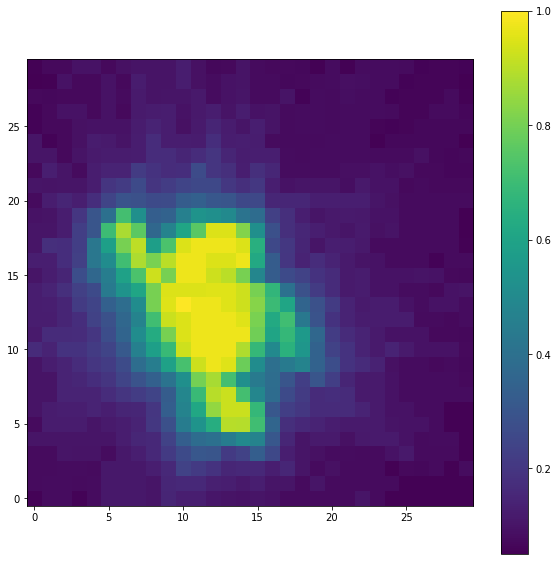

[[ 45.3981273   45.3599466  296.11909413]
 [129.04599565  27.26644135 186.89491381]
 [  9.41884535  35.3416198  337.87465147]
 [  9.60785594  35.53874279 338.29085466]
 [ 45.62540037  45.51600769 296.14085032]
 [  9.68760382  34.82923311 337.61629923]
 [  9.70496813  41.05945115 319.65208955]
 [  4.56461999  40.11108758 323.2084871 ]
 [  4.87288001  40.16957914 323.13452838]
 [  4.24281136  39.18701373 324.16750081]
 [147.08158424  34.74947593 178.61327173]
 [129.12669415  27.28864779 186.86496689]
 [  4.87048071  39.58636951 322.34449535]
 [284.84348222  31.41232748  96.20314084]
 [124.70935627  26.47466498 191.32563336]
 [284.52781351  31.0032349   96.88347439]
 [  5.18390584  40.13329015 323.00222297]
 [  5.68982697  40.76311235 322.27910395]
 [ 45.1230499   44.89075017 296.19362877]
 [  4.4553175   40.11250539 323.79506316]
 [221.3911537    3.31467124 157.14350471]
 [  4.25741018  41.58297556 323.4930844 ]
 [143.54381587  27.76944205 258.60884041]
 [ 44.95625735  44.85203847 296.53

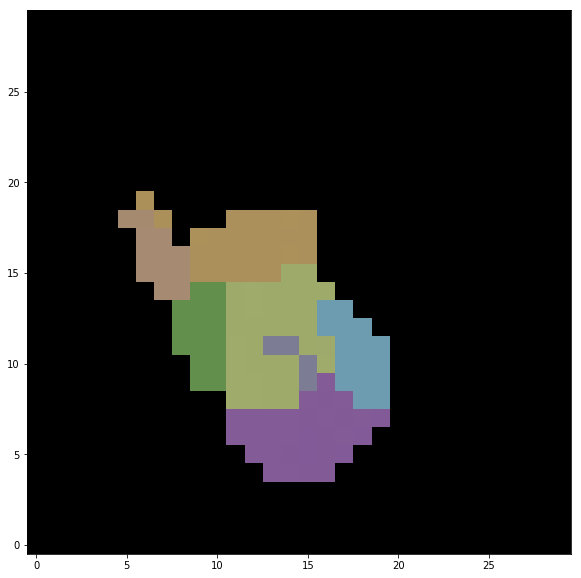

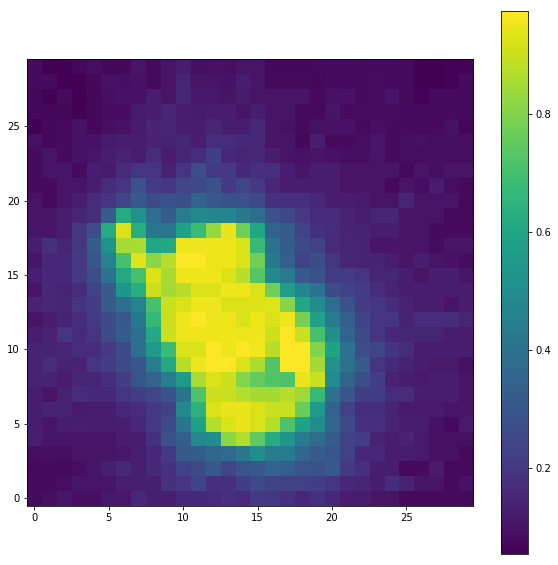

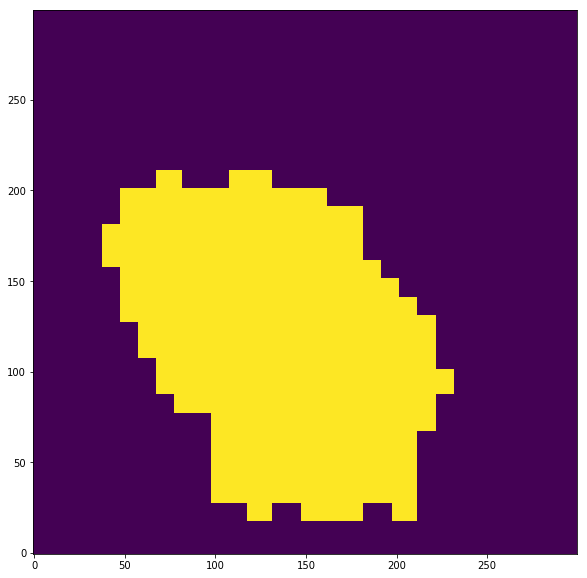

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 20247, voxelLeft: 1/25456.  max hitratio: 0.5853658318519592, peakcnt: 41,reconstructed euler angle [  9.90144401  34.86708364 337.96442707]]]]]]number of flood fills: 283
start of post processing, moving grain boundaries untile stable
 Iteration: 165, max misorien: 0.0006905339541845024number of post process iteration: 165, number of voxel revisited: 35615
 post process takes is 322.11361932754517 seconds
===========end of reconstruction========== 

SourceModule time 1467.0155 seconds.
saved as npy format


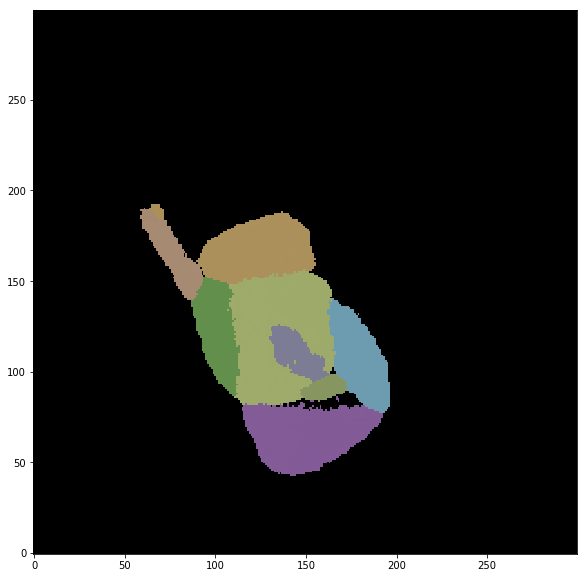

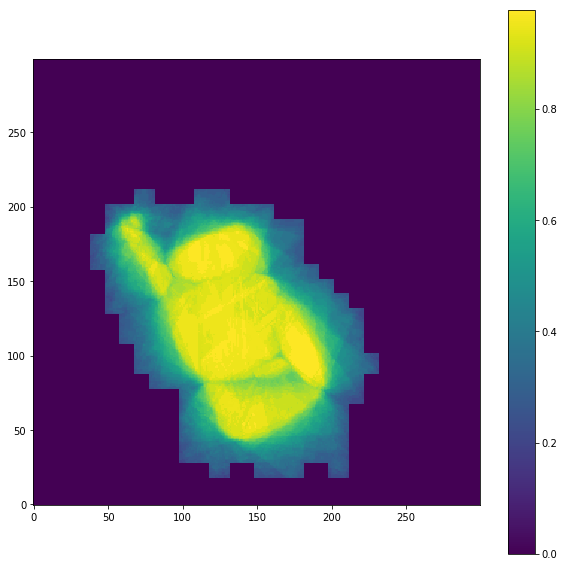

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 205, voxelLeft: 1/900.  max hitratio: 0.07500000298023224, peakcnt: 40,reconstructed euler angle [  9.06141554  35.59642347 337.75143459]]]]number of flood fills: 14
start of post processing, moving grain boundaries untile stable
 Iteration: 78, max misorien: 0.0006905339541845024number of post process iteration: 78, number of voxel revisited: 10419
 post process takes is 88.82990646362305 seconds
===========end of reconstruction========== 

SourceModule time 109.8927890625 seconds.
saved as npy format


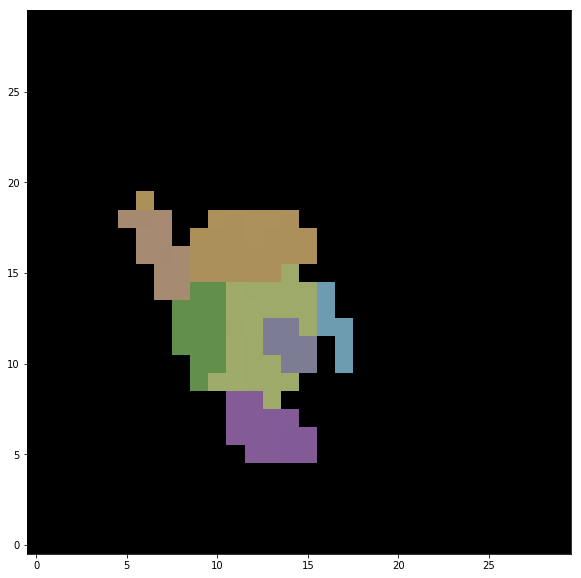

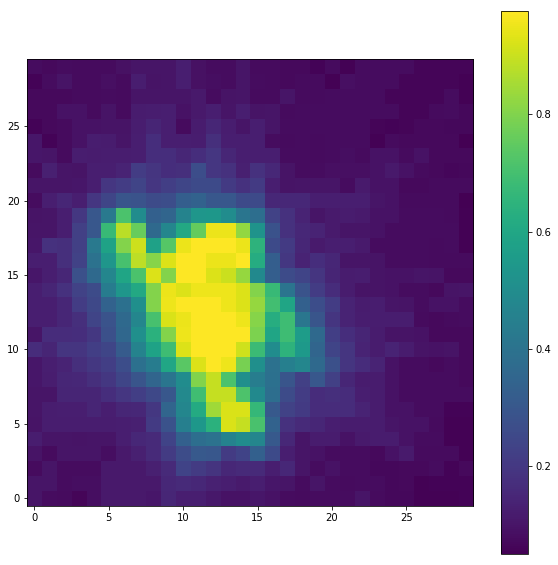

[[ 45.5101629   45.4923285  296.14733035]
 [ 10.55074165  35.23083341 337.41481409]
 [129.08856612  27.23083259 186.83405551]
 [  9.30050732  34.78857673 337.60200718]
 [  9.6817274   34.82133373 337.65944281]
 [260.27561527  20.82549336  97.61019908]
 [ 46.051185    45.7092286  295.48056811]
 [261.33453948  20.58729867  96.54627454]
 [147.10619385  34.78491672 178.60902674]
 [129.1072077   27.29234496 186.88214875]
 [  4.7614984   39.5738731  322.41312411]
 [124.91239247  26.55526708 191.06577964]
 [284.53844177  31.00056883  96.88865143]
 [284.8484238   31.37871237  96.16323204]
 [  5.13350854  40.11574373 323.03285183]
 [  5.78562696  40.98010449 322.21070346]
 [  3.73512774  40.67941142 323.36448716]
 [285.01360217  31.54964552  96.72794403]
 [ 45.17186984  44.94920091 296.20743808]
 [  4.55493654  40.1002262  323.63212122]
 [ 97.82793887  41.87431166 257.00933679]
 [219.23645094   3.24895827 159.27030763]
 [  4.38129405  40.58333956 323.37973367]
 [  3.52124626  41.64695462 323.73

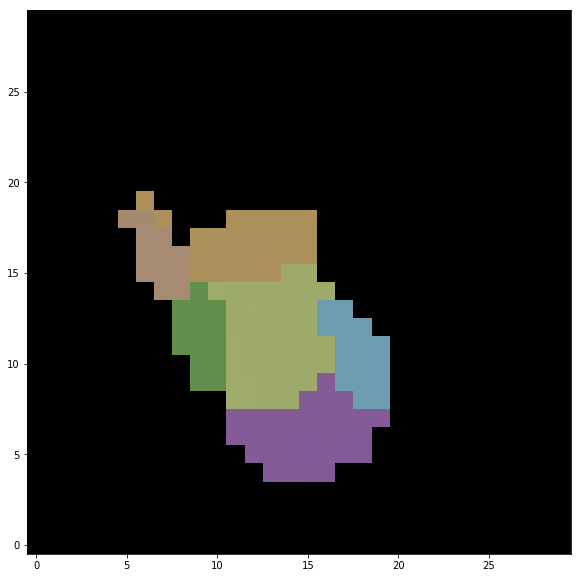

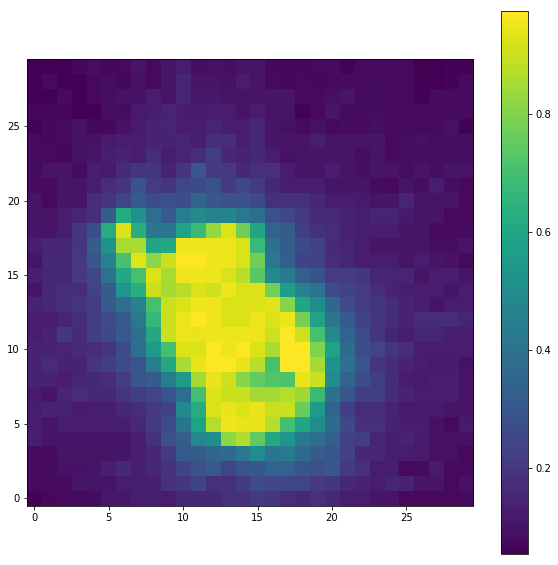

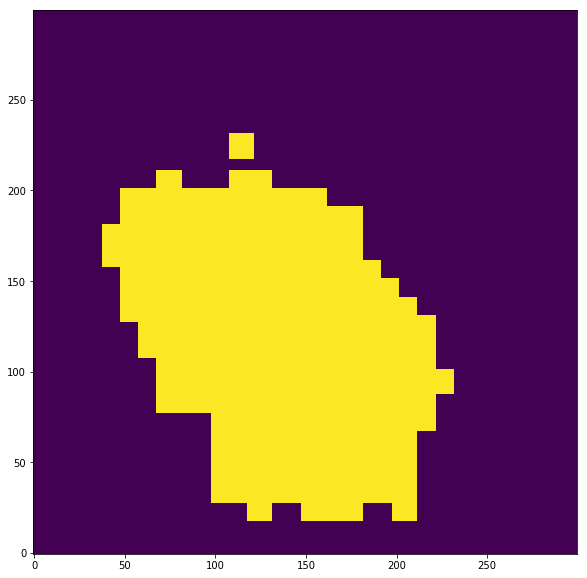

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 46287, voxelLeft: 1/25752.  max hitratio: 0.7906976938247681, peakcnt: 43,reconstructed euler angle [ 45.20926992  44.7301434  296.18658892] ]]]]number of flood fills: 274
start of post processing, moving grain boundaries untile stable
 Iteration: 360, max misorien: 0.0006905339541845024number of post process iteration: 360, number of voxel revisited: 54317
 post process takes is 491.0659158229828 seconds
===========end of reconstruction========== 

SourceModule time 1625.438375 seconds.
saved as npy format


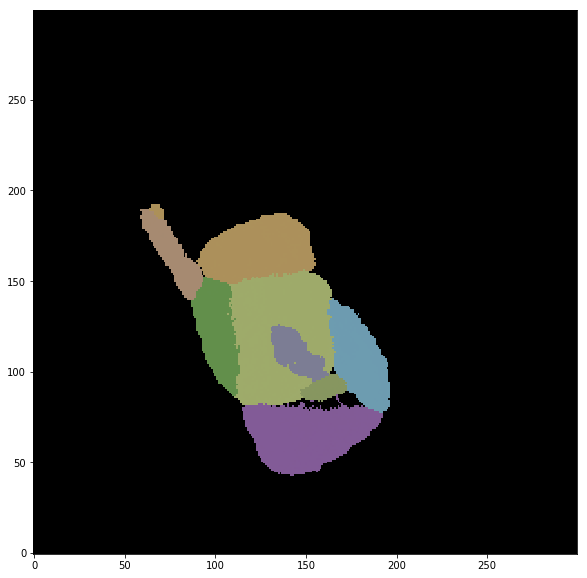

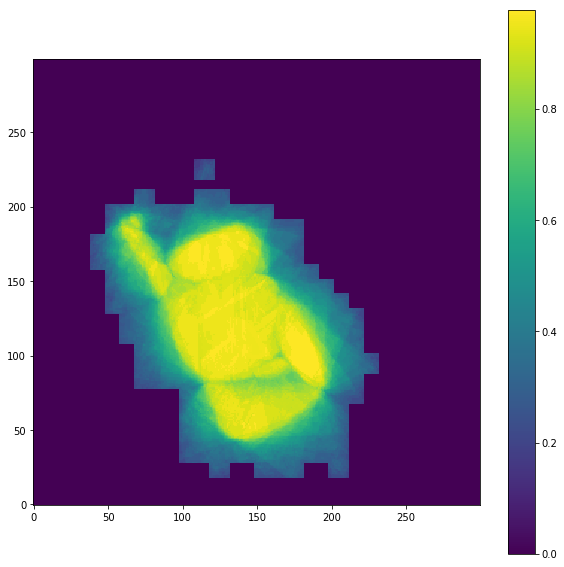

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 94, voxelLeft: 1/900.  max hitratio: 0.10256410390138626, peakcnt: 39,reconstructed euler angle [ 45.38114257  45.61763044 296.17388389]]]]]number of flood fills: 16
start of post processing, moving grain boundaries untile stable
 Iteration: 134, max misorien: 0.0006905339541845024number of post process iteration: 134, number of voxel revisited: 17500
 post process takes is 148.03564262390137 seconds
===========end of reconstruction========== 

SourceModule time 169.215078125 seconds.
saved as npy format


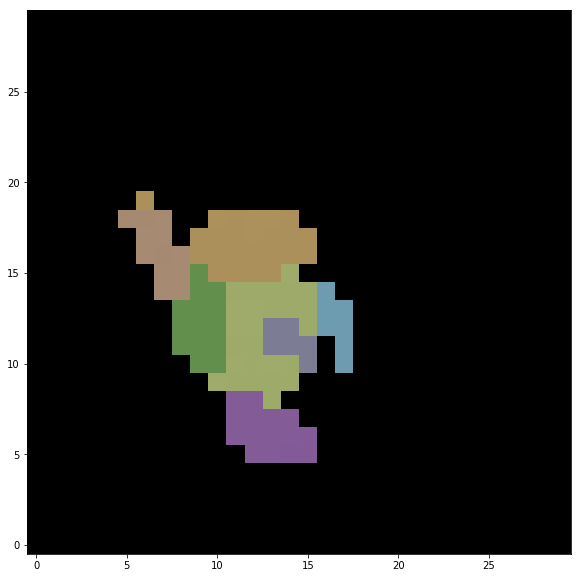

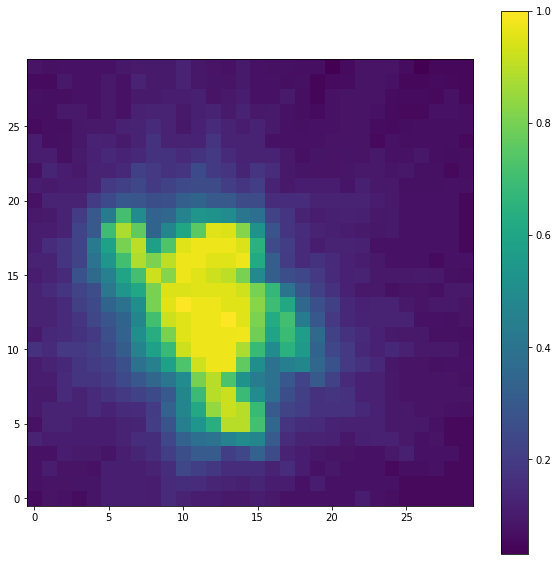

[[ 45.5044834   45.46278762 296.17518058]
 [276.9720942   25.74440825  82.31760434]
 [  9.70791355  34.83803886 337.59496091]
 [  7.16905396  40.54340325 320.49362094]
 [ 46.0938054   45.61262431 295.70786267]
 [129.0566376   27.2476125  186.6530329 ]
 [261.43679266  20.47169318  96.25939751]
 [ 45.48678537  45.42742928 296.25645005]
 [147.0130289   34.72986948 178.58427752]
 [129.25721835  27.51297411 186.75373699]
 [129.0857291   27.20953518 186.86058759]
 [  4.84353615  39.58459985 322.35872971]
 [  4.79749858  39.61006214 322.77523111]
 [284.90046748  31.32576122  96.32873992]
 [284.91179191  31.35054843  96.17901908]
 [124.41019256  26.36006343 191.59803568]
 [284.52589972  30.99894877  96.89291348]
 [  5.15219208  40.11314999 322.98138049]
 [  5.68333182  40.7141989  322.32134076]
 [ 45.1261423   44.90615842 296.21923536]
 [  4.41903054  40.10524119 323.81477473]
 [221.98079042   3.29206795 156.5284429 ]
 [  3.50546679  41.623459   323.73184314]
 [  4.1412055   41.48899604 323.52

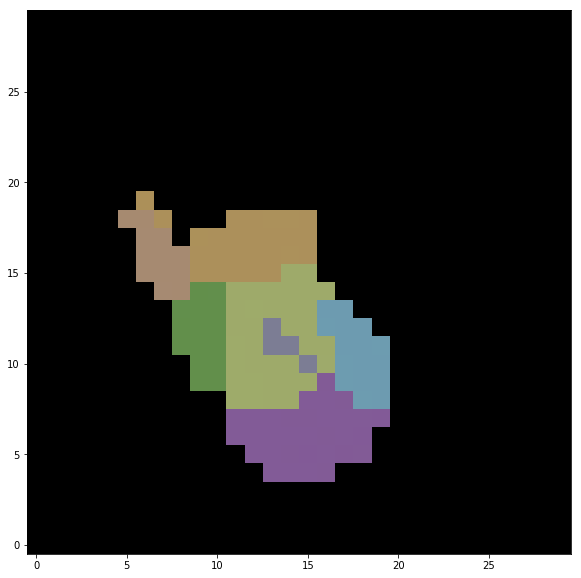

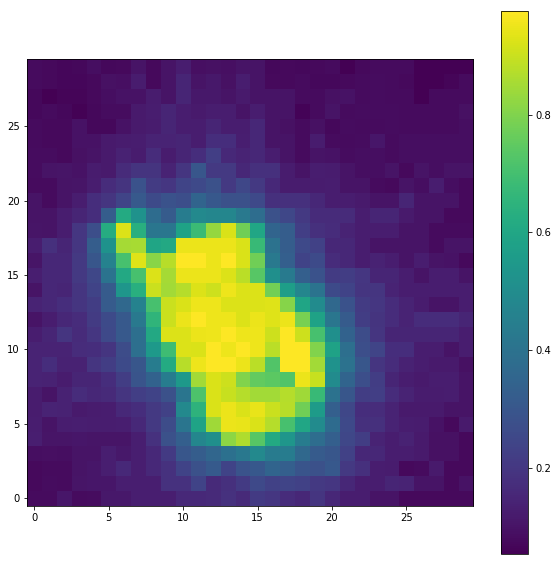

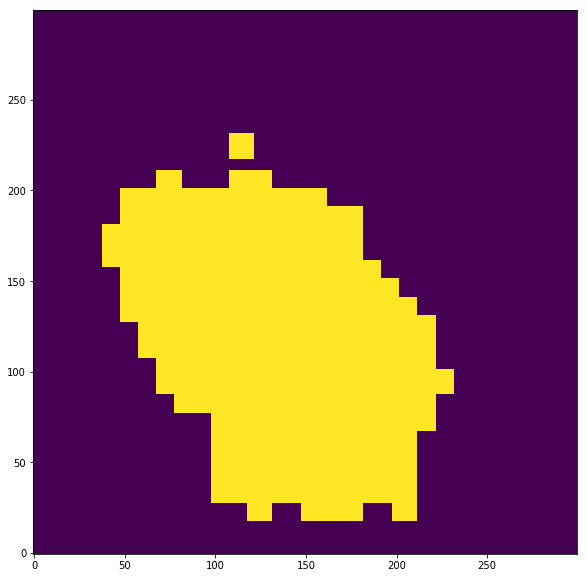

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 47779, voxelLeft: 1/25652.  max hitratio: 0.8205128312110901, peakcnt: 39,reconstructed euler angle [285.1669541   31.4182259   95.72145401]]]]]]number of flood fills: 267
start of post processing, moving grain boundaries untile stable
 Iteration: 155, max misorien: 0.0006905339541845024number of post process iteration: 155, number of voxel revisited: 36227
 post process takes is 327.8012101650238 seconds
===========end of reconstruction========== 

SourceModule time 1458.692 seconds.
saved as npy format


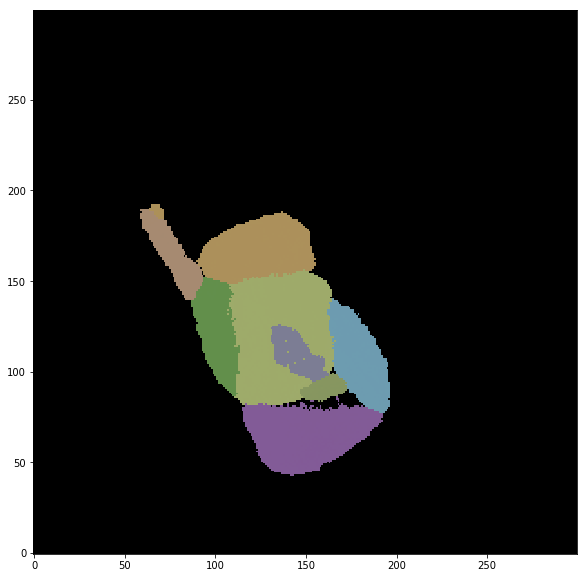

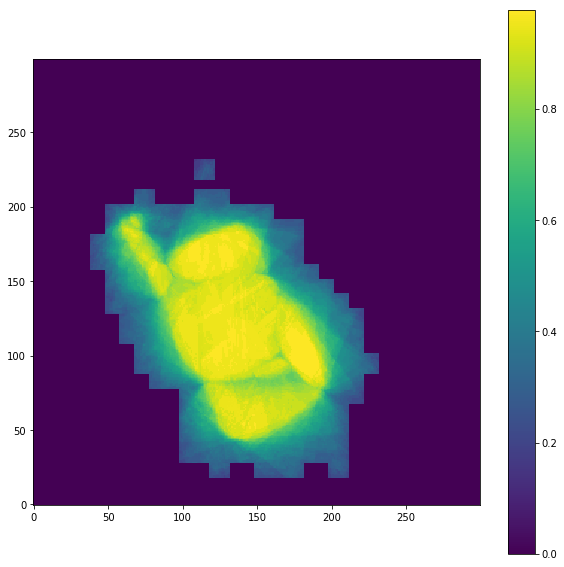

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 765, voxelLeft: 1/900.  max hitratio: 0.05714285746216774, peakcnt: 35,reconstructed euler angle [120.22225972  53.01158966 176.92035445]5]]number of flood fills: 16
start of post processing, moving grain boundaries untile stable
 Iteration: 136, max misorien: 0.0006905339541845024number of post process iteration: 136, number of voxel revisited: 20194
 post process takes is 171.23385381698608 seconds
===========end of reconstruction========== 

SourceModule time 192.40434375 seconds.
saved as npy format


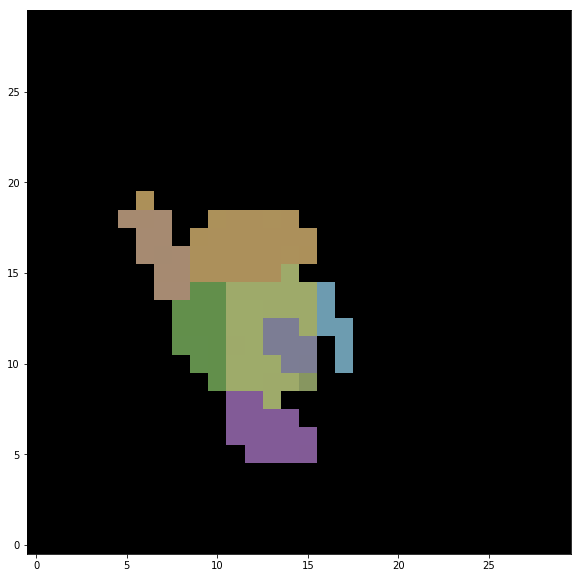

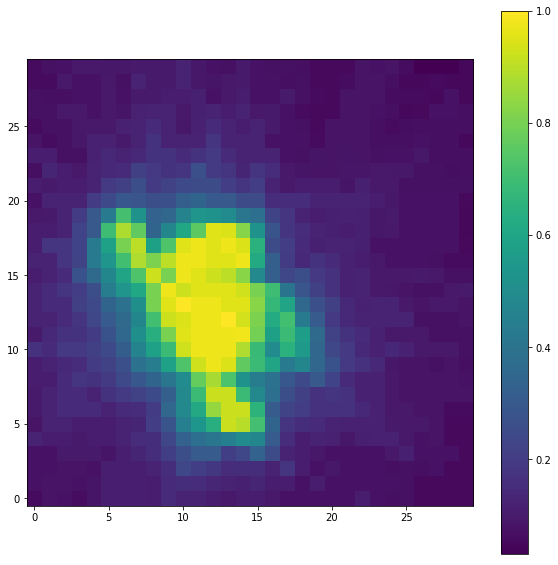

[[ 45.69515463  45.46680242 296.01951157]
 [276.93723286  25.90474661  82.28525579]
 [ 23.24946212  44.32296536 353.93488375]
 [129.08336782  27.23282129 186.79947226]
 [  9.69086384  34.83873963 337.60062711]
 [ 45.98772559  45.63386982 295.84308586]
 [  9.94575586  35.0403889  337.3304487 ]
 [260.35214056  20.79214447  97.49404482]
 [  4.25789397  39.16309016 324.17320858]
 [147.09804697  34.71866974 178.57617013]
 [129.11529615  27.28204606 186.87366228]
 [  4.82976352  39.69537319 322.81088551]
 [284.84137499  31.40722681  96.22475189]
 [124.86533678  26.51570308 191.37788418]
 [284.56442254  31.01216876  96.86449948]
 [  5.15299181  40.12526977 323.01997655]
 [  5.5965675   41.03946665 322.20130585]
 [ 45.13795675  44.9574554  296.20404215]
 [  4.58069231  39.94472419 323.55813551]
 [221.24368666   3.3115034  157.30312244]
 [  4.4150863   40.59089627 323.38538806]
 [  3.51134276  41.65501966 323.74129628]
 [  4.38000551  41.46664299 323.44553954]
 [143.56952156  27.751701   258.61

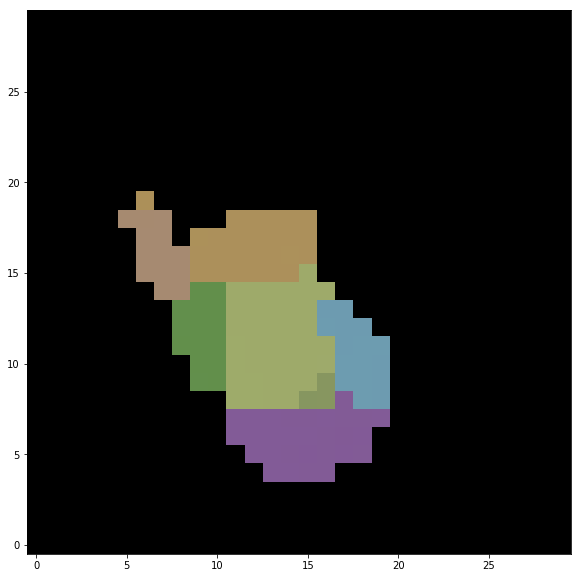

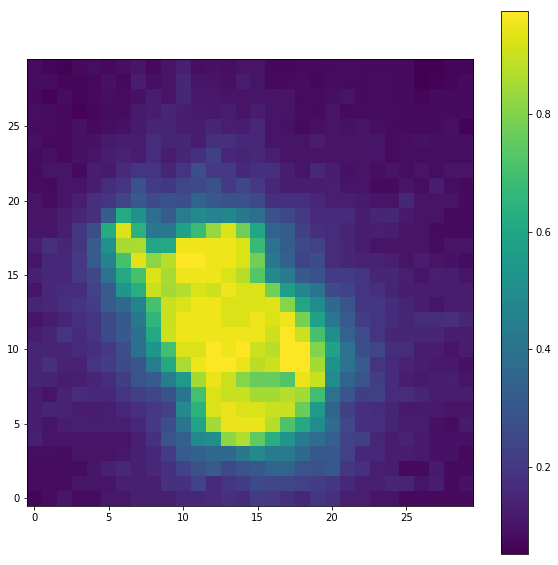

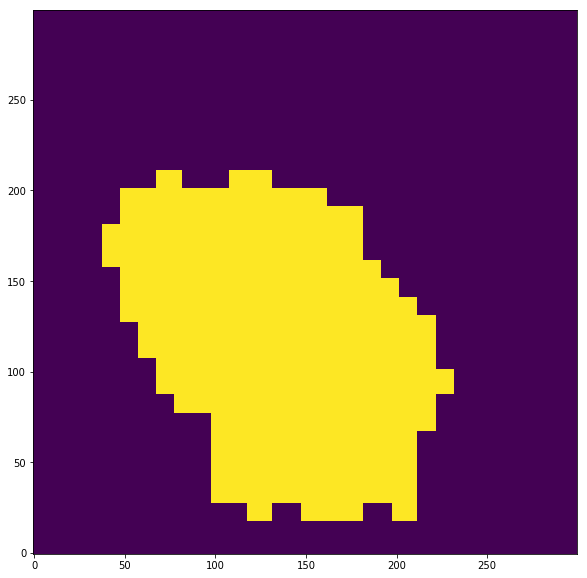

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 56437, voxelLeft: 1/25456.  max hitratio: 0.3658536672592163, peakcnt: 41,reconstructed euler angle [284.68878563  31.41371511  96.0658459 ]]]]]]number of flood fills: 276
start of post processing, moving grain boundaries untile stable
 Iteration: 1500, max misorien: 0.9268110990524292number of post process iteration: 1500, number of voxel revisited: 141143
 post process takes is 1278.2654008865356 seconds
===========end of reconstruction========== 

SourceModule time 2434.26875 seconds.
saved as npy format


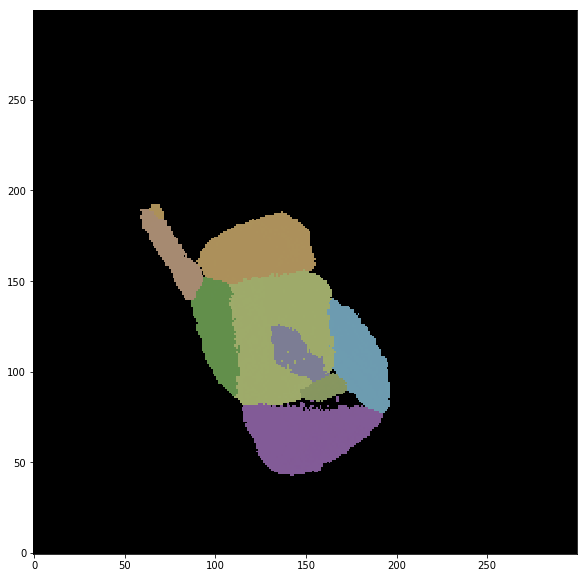

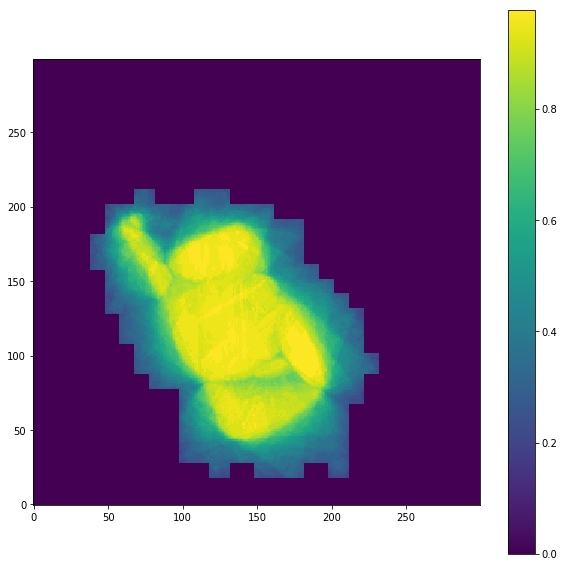

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 858, voxelLeft: 1/900.  max hitratio: 0.054054055362939835, peakcnt: 37,reconstructed euler angle [110.28289658  42.99697199 277.16281999]]]+02]number of flood fills: 12
start of post processing, moving grain boundaries untile stable
 Iteration: 171, max misorien: 0.0006905339541845024number of post process iteration: 171, number of voxel revisited: 21970
 post process takes is 187.78708744049072 seconds
===========end of reconstruction========== 

SourceModule time 208.91776562500002 seconds.
saved as npy format


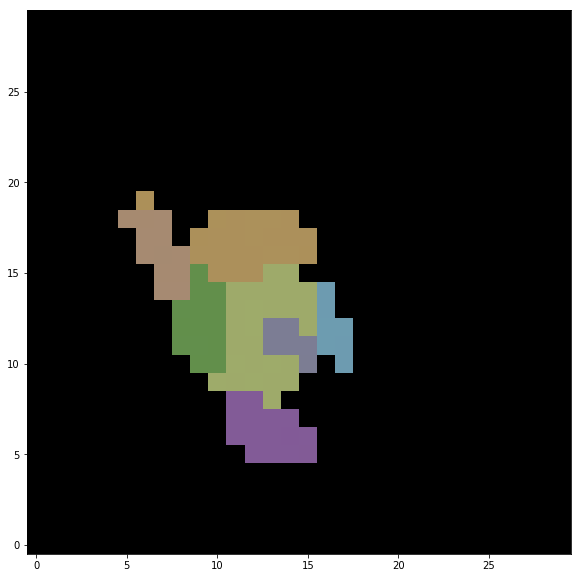

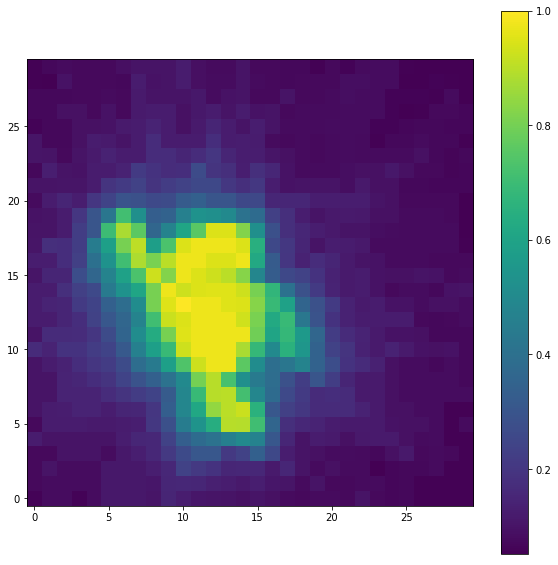

[[ 45.50803814  45.36401884 296.17978643]
 [  9.61349552  35.54996434 338.3166722 ]
 [  7.31426689  40.62287319 320.14173011]
 [ 45.40525276  45.36465802 296.38928353]
 [129.04378462  27.23801146 186.78195026]
 [  9.71577124  34.85312691 337.61307595]
 [  7.21905245  40.56895485 320.46487984]
 [ 45.41223831  45.6827021  296.11790473]
 [ 46.03477744  45.68682058 295.756683  ]
 [260.57337893  20.69211993  97.27291905]
 [ 46.03044425  45.64800269 295.63995654]
 [146.9389032   34.74624075 178.63647483]
 [129.12647962  27.24597527 186.83930876]
 [  4.82888353  39.59648549 322.38473517]
 [284.86940533  31.38368527  96.19115458]
 [124.63787586  26.47773803 191.32311992]
 [284.60616977  31.01930987  96.84155698]
 [  5.15983781  40.09316885 322.97735011]
 [  5.78208927  41.08940633 322.14467002]
 [ 45.16376589  44.88930999 296.19917703]
 [  4.4597011   40.15762444 323.82663022]
 [ 97.41848953  41.89924256 257.2441045 ]
 [221.87557841   3.2958068  156.60595052]
 [  3.53100625  41.62108191 323.73

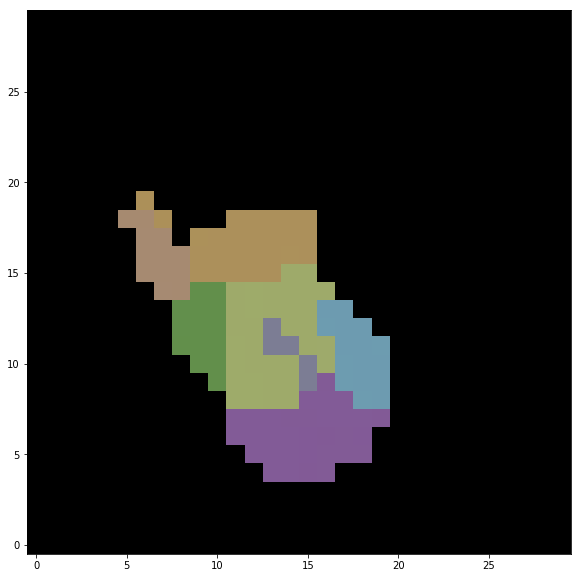

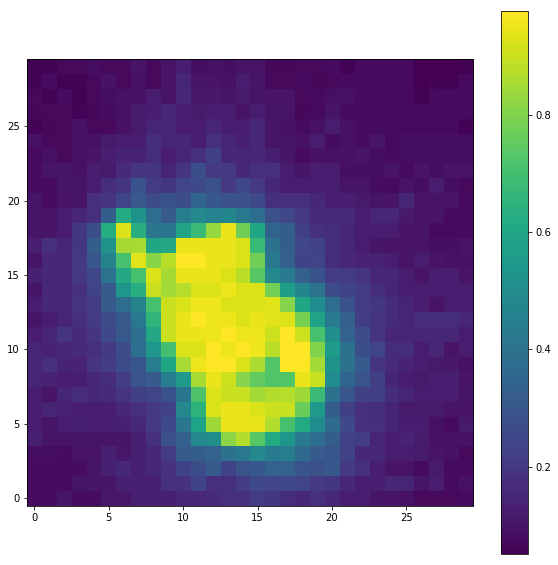

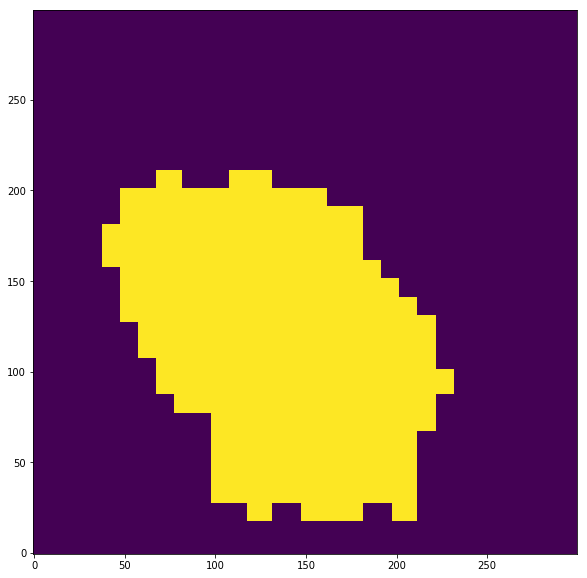

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 47873, voxelLeft: 1/25456.  max hitratio: 0.550000011920929, peakcnt: 40,reconstructed euler angle [  5.15651617  40.02795973 323.36473495]]]]]]]number of flood fills: 274
start of post processing, moving grain boundaries untile stable
 Iteration: 216, max misorien: 0.0006905339541845024number of post process iteration: 216, number of voxel revisited: 40861
 post process takes is 368.6921718120575 seconds
===========end of reconstruction========== 

SourceModule time 1489.126 seconds.
saved as npy format


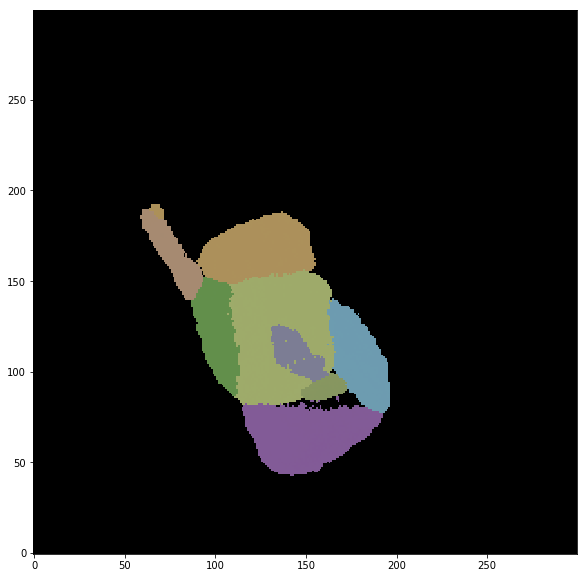

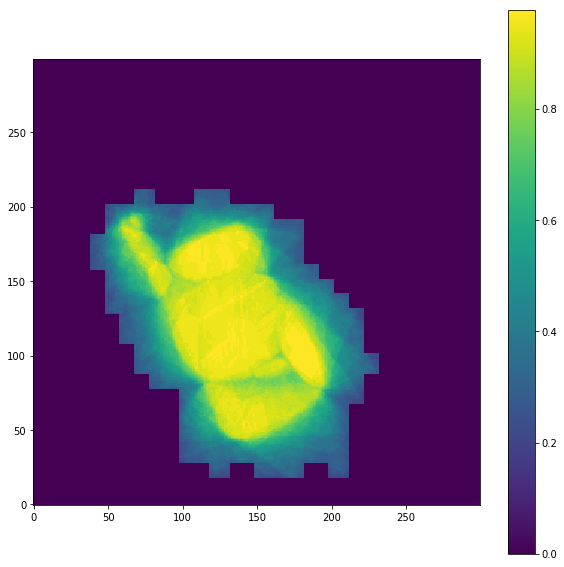

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 459, voxelLeft: 1/900.  max hitratio: 0.5116279125213623, peakcnt: 43,reconstructed euler angle [ 44.99150567  44.82084504 296.25090254]]]]]number of flood fills: 14
start of post processing, moving grain boundaries untile stable
 Iteration: 80, max misorien: 0.0006905339541845024number of post process iteration: 80, number of voxel revisited: 11893
 post process takes is 100.90637445449829 seconds
===========end of reconstruction========== 

SourceModule time 122.01396875 seconds.
saved as npy format


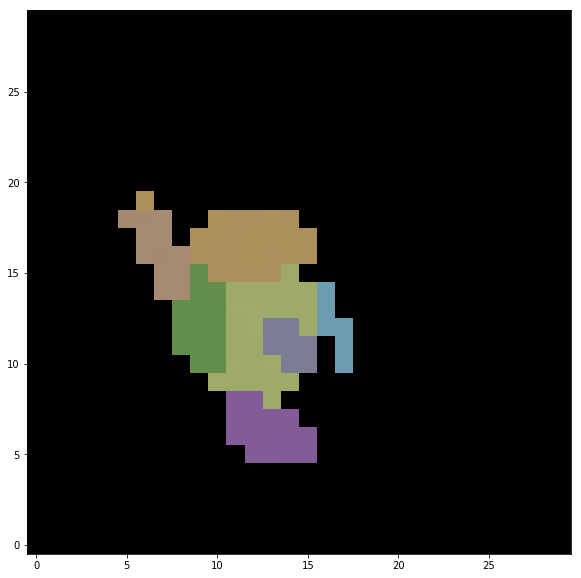

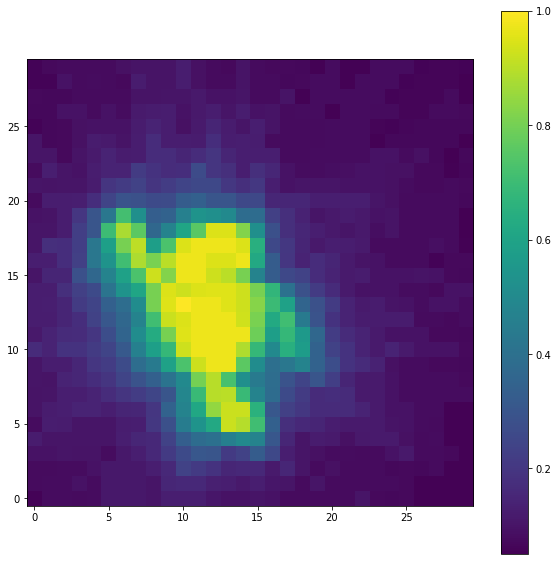

[[ 45.29401237  45.35071335 296.19000556]
 [128.95973631  27.38164799 187.18895665]
 [ 45.87962963  46.13471595 295.70582676]
 [ 10.47583141  35.22785259 337.47273333]
 [  7.74194069  40.85626961 319.96939104]
 [ 23.6642817   44.71614526 353.67839615]
 [ 45.58441651  45.4879087  296.0517894 ]
 [  9.41835612  34.59961575 337.53221212]
 [  7.97431417  40.83893469 320.2939893 ]
 [ 46.01385191  45.65618197 295.75017029]
 [  9.71238332  34.82229471 337.65981537]
 [260.93470096  20.61438502  96.78640556]
 [ 45.70490252  45.58687459 296.017311  ]
 [129.06953997  27.22106404 186.54608563]
 [146.98326274  34.7057446  178.66648082]
 [  9.24324528  35.15325168 337.36413396]
 [  4.49299474  39.73587429 322.73529097]
 [129.09149717  27.26266154 186.86948076]
 [  4.75505884  39.56646579 322.39225076]
 [284.83995415  31.38480666  96.20653232]
 [124.9259941   26.54010074 191.27634646]
 [  5.21680337  40.07928817 322.94482326]
 [  5.79241846  40.74812972 322.28075685]
 [ 45.15860837  44.88635507 296.19

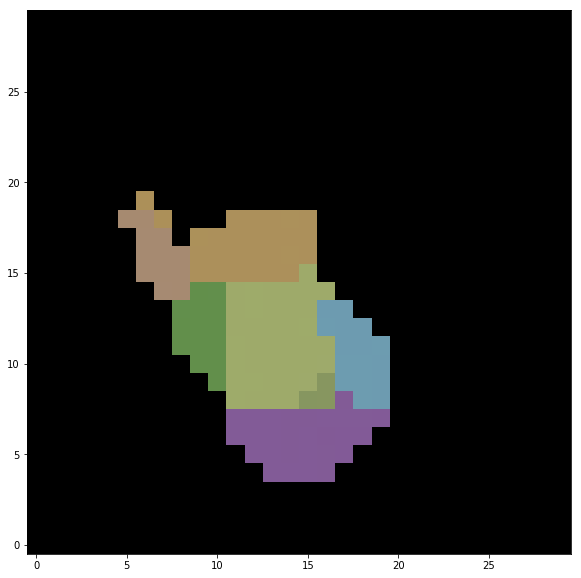

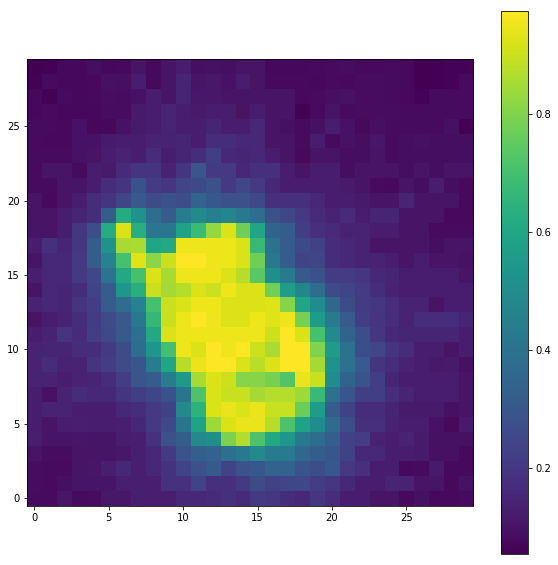

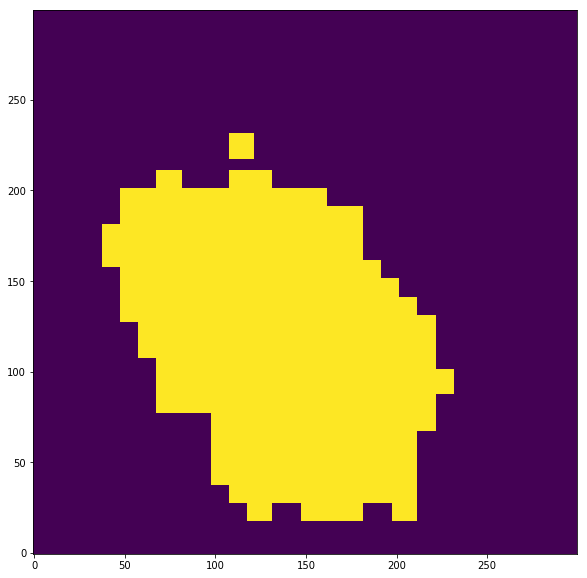

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 23487, voxelLeft: 1/25652.  max hitratio: 0.31707316637039185, peakcnt: 41,reconstructed euler angle [129.52474402  26.86138427 186.36432141]]]]]number of flood fills: 268
start of post processing, moving grain boundaries untile stable
 Iteration: 701, max misorien: 0.0008457279182039201number of post process iteration: 701, number of voxel revisited: 74485
 post process takes is 675.5396597385406 seconds
===========end of reconstruction========== 

SourceModule time 1797.101625 seconds.
saved as npy format


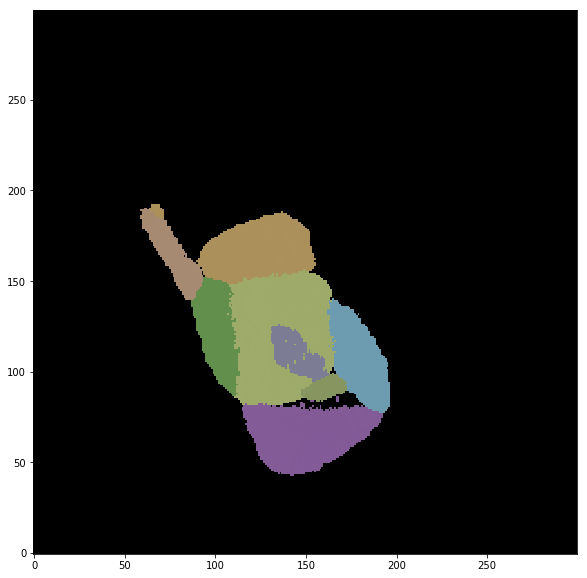

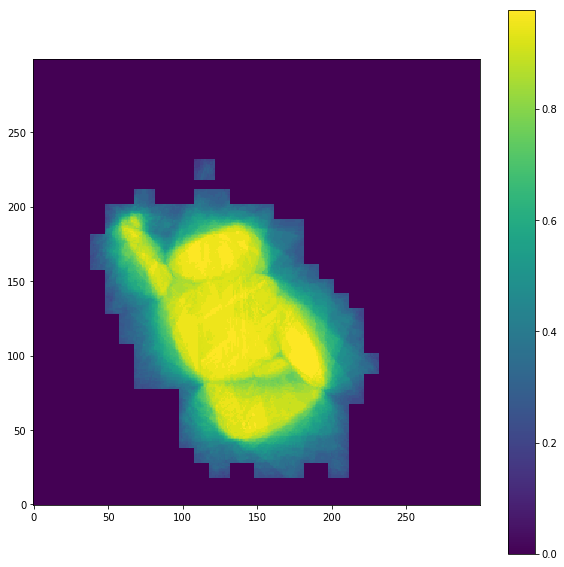

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 49, voxelLeft: 1/900.  max hitratio: 0.10000000149011612, peakcnt: 40,reconstructed euler angle [ 46.43433979  45.80038761 295.28142391]]]]]number of flood fills: 15
start of post processing, moving grain boundaries untile stable
 Iteration: 94, max misorien: 0.0006905339541845024number of post process iteration: 94, number of voxel revisited: 11065
 post process takes is 94.05176067352295 seconds
===========end of reconstruction========== 

SourceModule time 115.306703125 seconds.
saved as npy format


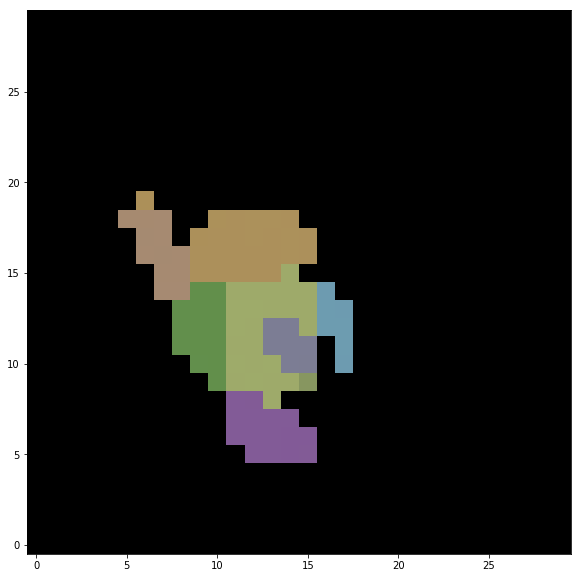

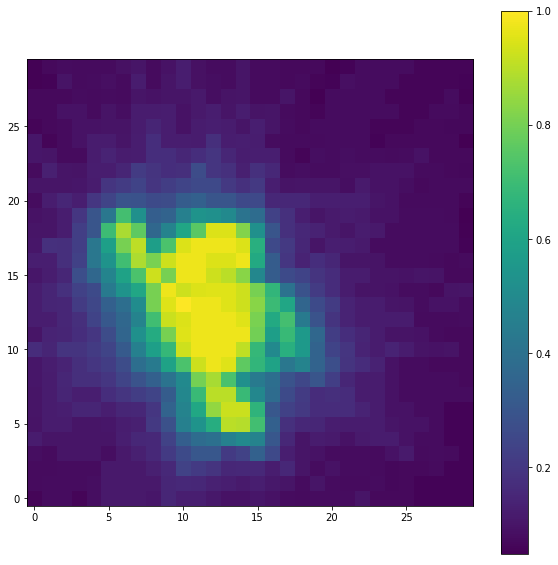

[[ 45.65486654  45.52227068 296.0627273 ]
 [ 46.01179438  45.52061505 295.50324476]
 [  9.55174138  35.54003896 338.31437946]
 [128.99537274  27.23663834 186.92600087]
 [  8.94555919  34.59746498 337.88787505]
 [  9.7982705   41.12900498 319.57518127]
 [  9.74560705  34.83213846 337.6177175 ]
 [260.08815786  20.84376456  97.75441401]
 [147.17900658  34.73477621 178.57173224]
 [129.08069062  27.24911079 186.84768323]
 [  9.18157946  35.17300109 337.36017334]
 [285.20684218  30.52781307  96.02098508]
 [284.57439502  31.0188625   96.85457548]
 [284.78466272  31.41061316  96.26512494]
 [  5.17136783  40.1019931  323.01721251]
 [  5.4639064   40.71759872 322.31263843]
 [ 45.15812508  44.90466299 296.19058247]
 [ 97.98277222  41.85536681 256.9768792 ]
 [221.9984092    3.31549465 156.50867435]
 [  4.49420758  40.57071357 323.36847378]
 [  4.20026171  41.49123951 323.60038756]
 [143.52118188  27.74776077 258.6354981 ]
 [ 44.97814398  44.89865434 296.56132091]
 [ 45.04772705  44.43364886 296.88

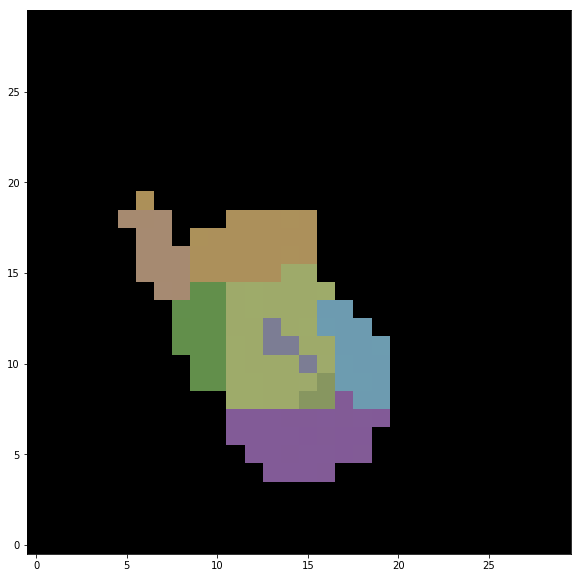

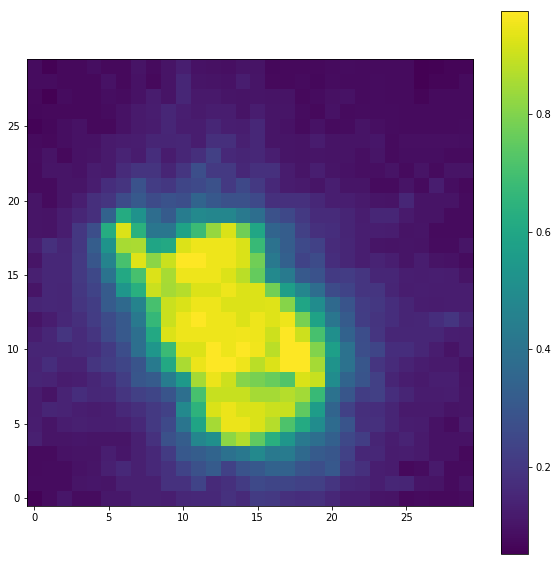

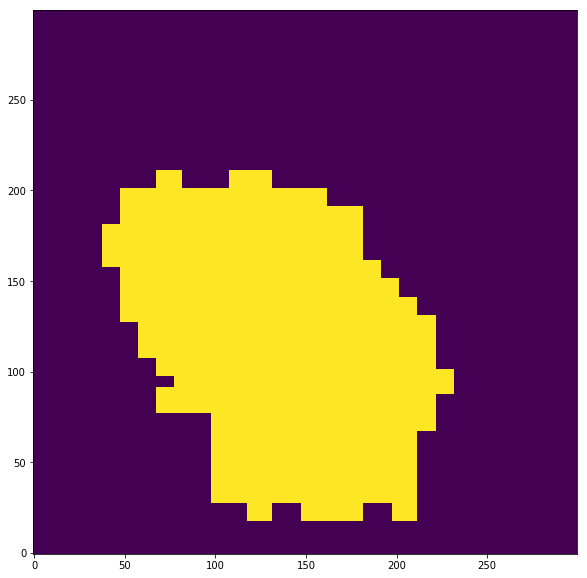

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 24421, voxelLeft: 1/25496.  max hitratio: 0.574999988079071, peakcnt: 40,reconstructed euler angle [129.01324603  27.02010674 186.95645713]8]]]]]number of flood fills: 283
start of post processing, moving grain boundaries untile stable
 Iteration: 74, max misorien: 0.0006905339541845024number of post process iteration: 74, number of voxel revisited: 25582
 post process takes is 231.76241278648376 seconds
===========end of reconstruction========== 

SourceModule time 1360.564375 seconds.
saved as npy format


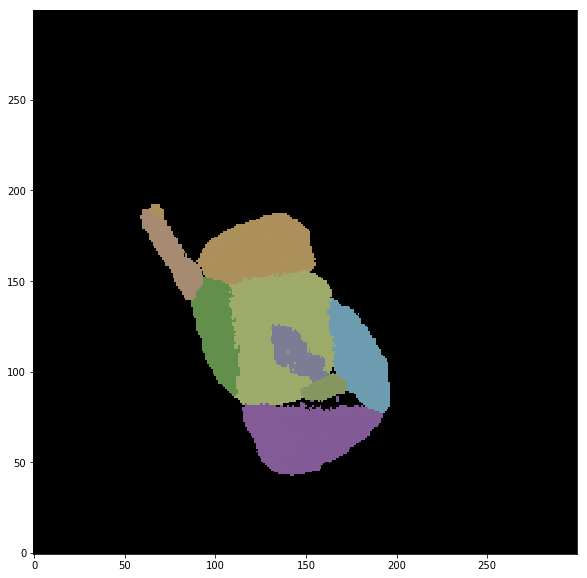

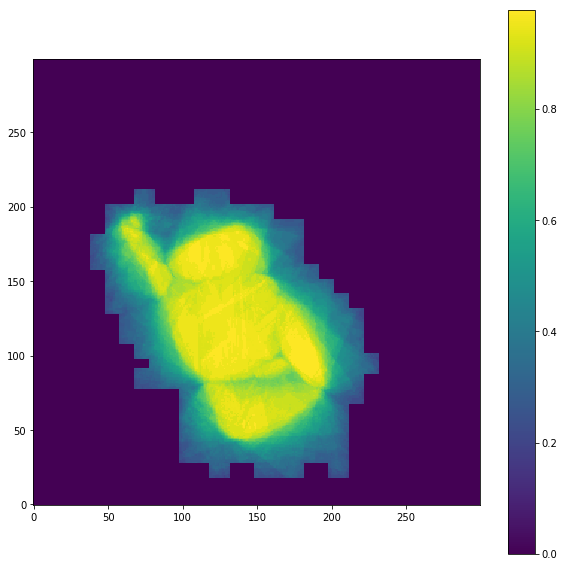

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 32, voxelLeft: 1/900.  max hitratio: 0.05882352963089943, peakcnt: 34,reconstructed euler angle [236.64425186  44.58189834 172.1393723 ]]]]]number of flood fills: 16
start of post processing, moving grain boundaries untile stable
 Iteration: 42, max misorien: 0.0006905339541845024number of post process iteration: 42, number of voxel revisited: 8680
 post process takes is 73.92998600006104 seconds
===========end of reconstruction========== 

SourceModule time 95.0930390625 seconds.
saved as npy format


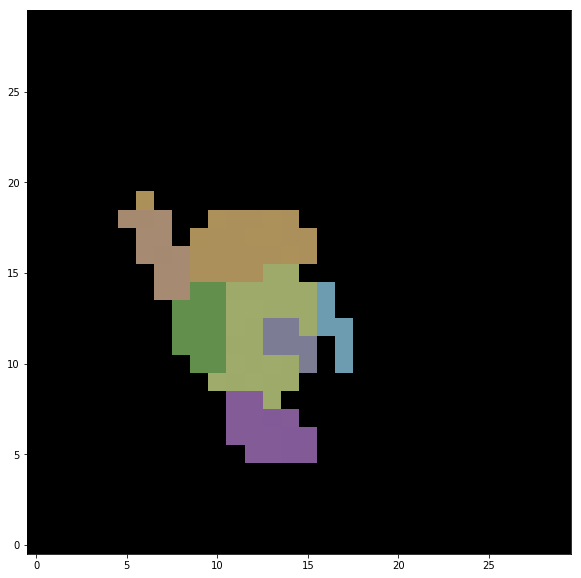

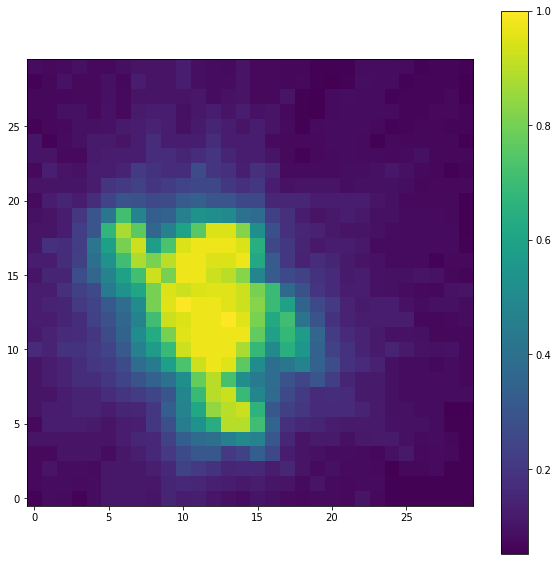

[[ 45.6221445   45.47695074 296.10440326]
 [128.98939039  27.2657926  186.91676353]
 [  9.41818579  35.34604567 337.98538131]
 [  9.83144734  35.55834344 338.29842229]
 [  9.76268585  34.81517676 337.60669678]
 [  9.67031222  41.0215336  319.68834382]
 [ 45.51096126  46.13274351 290.51706792]
 [ 45.77269439  45.59187296 296.04394158]
 [260.4552491   20.78946216  97.49722135]
 [147.04794028  34.75372042 178.61051227]
 [260.12567817  20.68541272  97.8552393 ]
 [  9.19469067  35.16126801 337.36858663]
 [129.11299565  27.26721852 186.86111803]
 [125.01609599  26.53155338 191.24669066]
 [284.59682487  31.02427523  96.8429642 ]
 [284.84795699  31.40819429  96.21351017]
 [  5.14756025  40.09645528 322.99695359]
 [  5.48093903  40.68265336 322.31485012]
 [ 45.14820625  44.90805479 296.20618991]
 [  4.57482711  40.00793744 323.56305587]
 [221.88718389   3.21364425 156.57901269]
 [  4.03187978  41.35790983 323.53160781]
 [  4.19519163  41.50434341 323.4657245 ]
 [143.5071188   27.74492062 258.63

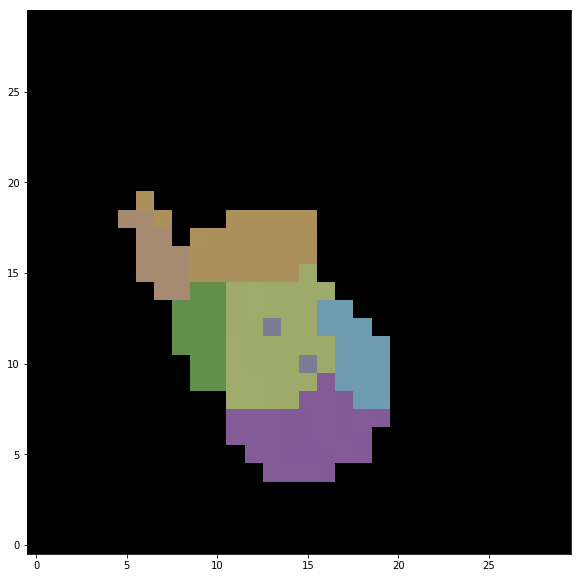

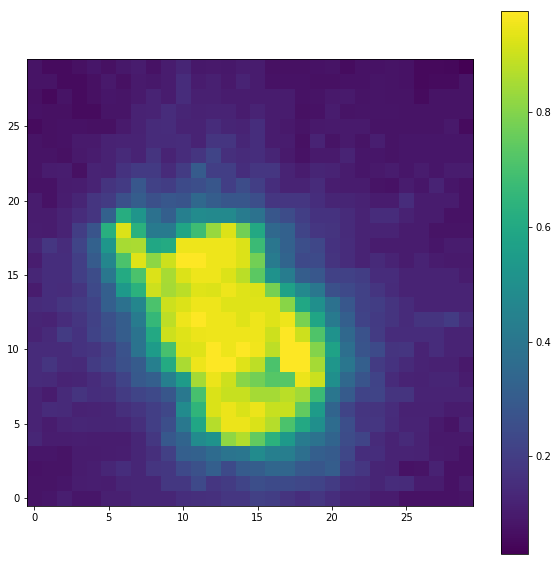

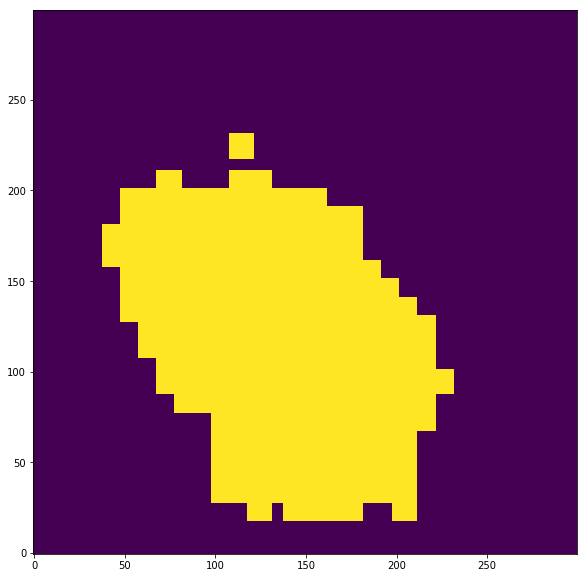

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 54019, voxelLeft: 1/25752.  max hitratio: 0.26829269528388977, peakcnt: 41,reconstructed euler angle [284.20160345  31.65341975  96.21262684]]]]]number of flood fills: 281
start of post processing, moving grain boundaries untile stable
 Iteration: 402, max misorien: 0.0006905339541845024number of post process iteration: 402, number of voxel revisited: 48986
 post process takes is 443.73941946029663 seconds
===========end of reconstruction========== 

SourceModule time 1622.522 seconds.
saved as npy format


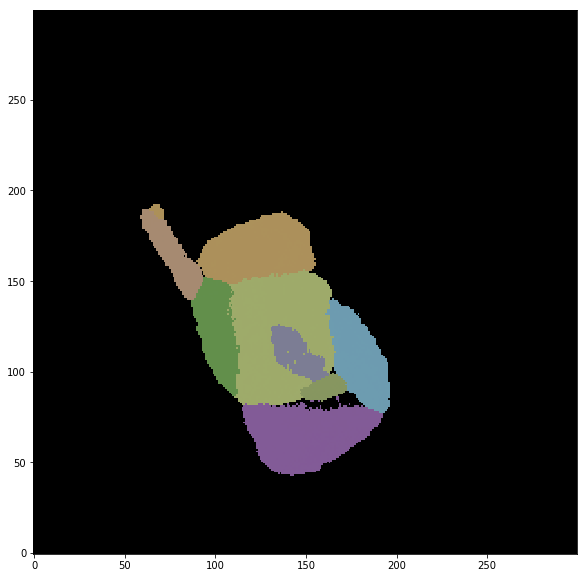

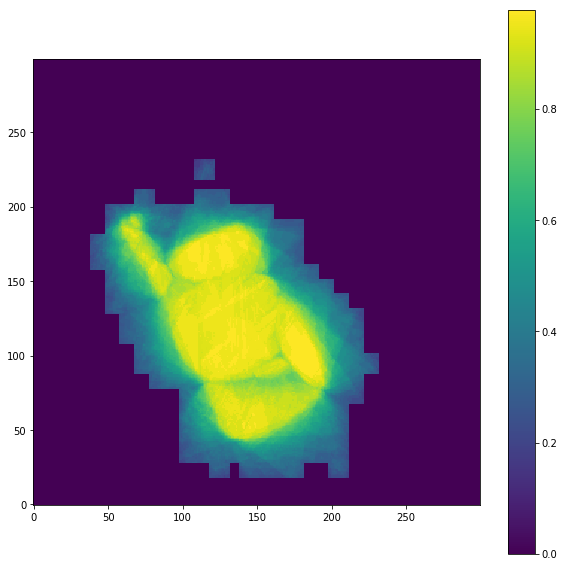

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 302, voxelLeft: 1/900.  max hitratio: 0.2368421107530594, peakcnt: 38,reconstructed euler angle [285.14977028  31.21994047  96.15912593]]]]]number of flood fills: 15
start of post processing, moving grain boundaries untile stable
 Iteration: 49, max misorien: 0.0006905339541845024number of post process iteration: 49, number of voxel revisited: 10097
 post process takes is 85.89658951759338 seconds
===========end of reconstruction========== 

SourceModule time 107.09539843750001 seconds.
saved as npy format


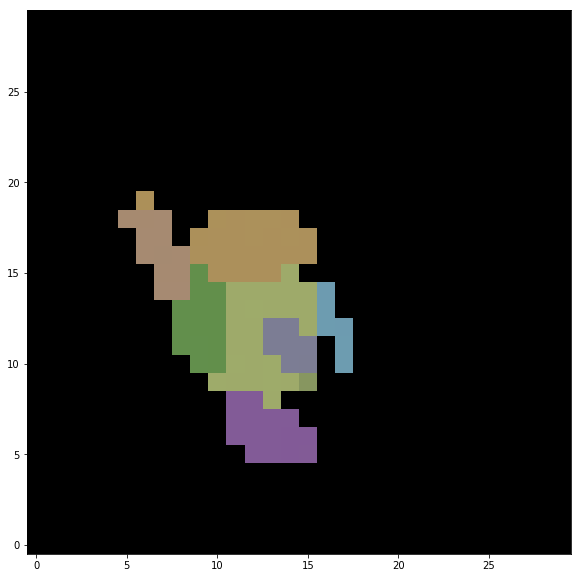

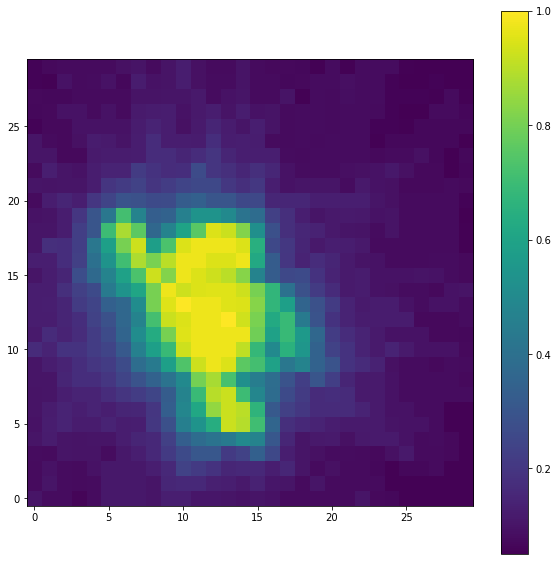

[[ 45.56683017  45.37259369 296.21049775]
 [128.93850886  27.3940678  187.21522504]
 [  9.56008055  35.3756188  338.54780759]
 [ 45.51585059  45.51595259 296.1495533 ]
 [  9.71816313  34.85192182 337.5877736 ]
 [ 10.11954944  41.39260113 319.43562513]
 [260.63562928  20.65089295  97.17055356]
 [ 45.87216115  45.63026732 295.91600649]
 [129.04441715  27.23848783 186.57519549]
 [147.11027926  34.72372042 178.59104432]
 [129.09739453  27.25604564 186.88034916]
 [  4.81018229  39.60390018 322.3836195 ]
 [284.86223289  31.38913906  96.18203136]
 [  5.2166421   40.02946036 322.93372027]
 [  5.72923796  40.74679027 322.25970426]
 [ 45.193719    44.89158136 296.18864766]
 [  4.43556866  40.09873808 323.78585609]
 [219.25275944   3.24550035 159.29298894]
 [  4.41677293  40.58058729 323.35366847]
 [  4.65121107  40.72331991 323.48097694]
 [  3.49659454  41.62035542 323.73580214]
 [  4.18505916  41.49968368 323.52895699]
 [143.55745174  27.75167427 258.60669153]
 [ 44.96342223  44.87380931 296.56

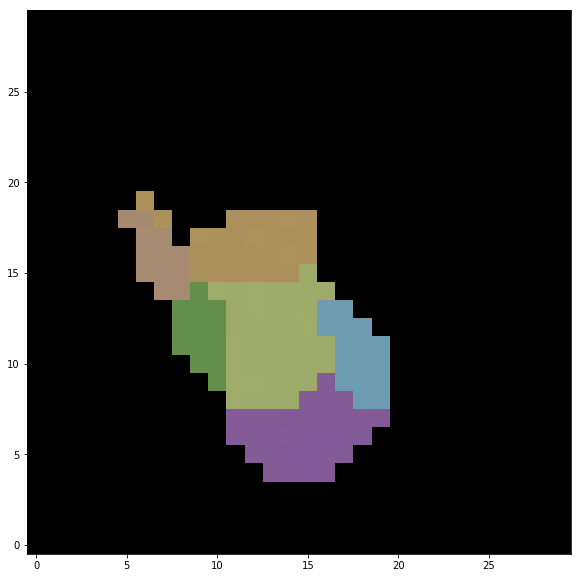

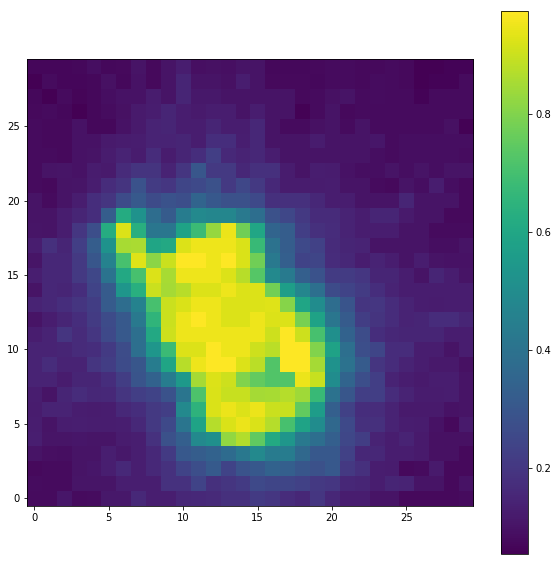

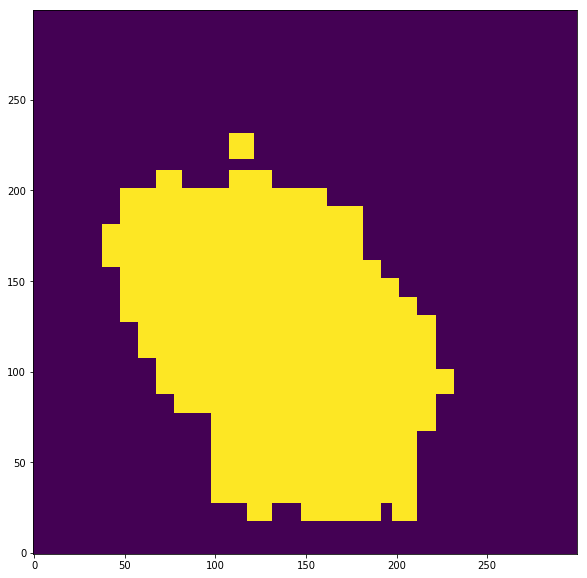

(256, 3)
7
 exp data loaded, shape is: (5816101, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 12167, voxelLeft: 1/25752.  max hitratio: 0.22499999403953552, peakcnt: 40,reconstructed euler angle [  9.41517075  34.61933988 337.58133555]]]]]number of flood fills: 282
start of post processing, moving grain boundaries untile stable
 Iteration: 1110, max misorien: 0.0006905339541845024number of post process iteration: 1110, number of voxel revisited: 101019
 post process takes is 916.0137329101562 seconds
===========end of reconstruction========== 

SourceModule time 2047.1067500000001 seconds.
saved as npy format


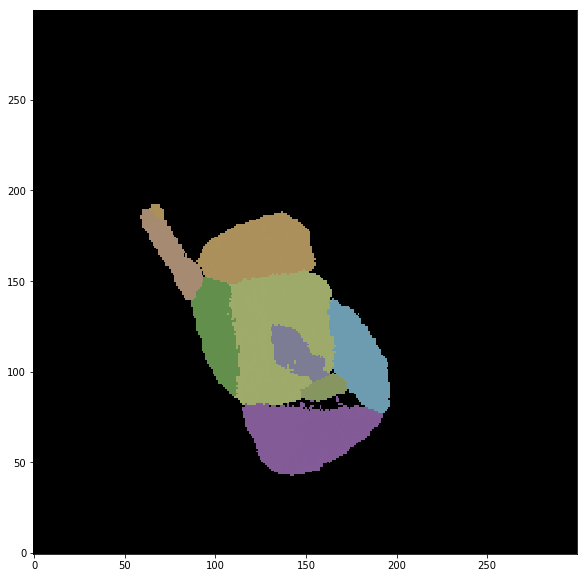

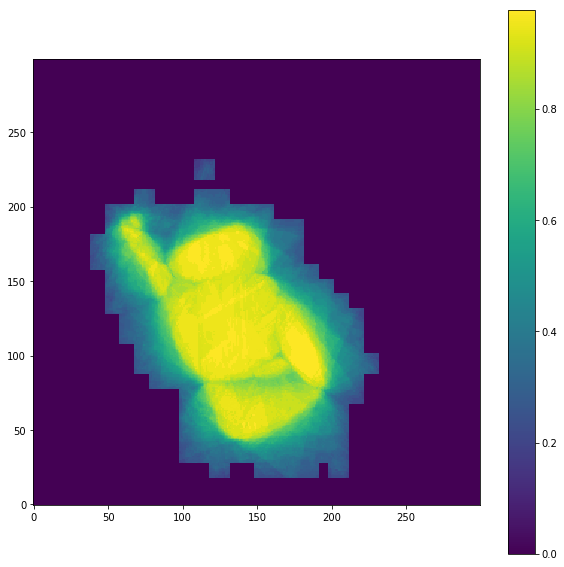

In [1]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

centerL = np.array([[5.0923, 6.55677, 8.07811]])
centerJ = np.array([[928.821, 940.444, 942.902]])
centerK = np.array([[2030.67, 2026.39, 2024.06]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513],
                       [89.473, 90.2258,  359.597]]])

# step 2: start reconstruction with calibrated configuration (parameters)
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
import scipy.ndimage as ndi

for i in range(10):
    ############ low resolution reconstruction
    S = reconstruction.Reconstructor_GPU()
    S.NDet = 3
    S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
    S.set_Q(7)
    print(S.maxQ)

    S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
    S.set_sample('gold')
    S.energy = 65.351
    S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z2_'      # reduced binary data
    S.expdataNDigit = 6                                                       # number of digit in the binary file name
    imgsize = [30, 30]
    voxelSize = 0.01
    shift = [0.0, 0.0, 0.0]
    S.create_square_mic(imgsize,
                        voxelsize=voxelSize,
                        shift=shift,
                       )# resolution of reconstruction and voxel size
    S.squareMicOutFile = 'output/gold_calibrate_z2_' \
                        + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                        + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
    S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
    S.intensity_threshold = 2 # throw away peaks with intensity below this value
    S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
    S.serial_recon_multi_stage(enablePostProcess=True)

    #388seconds with verbose
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (10,10)
    MicFileTool.plot_square_mic(S.squareMicData,0.6)
    MicFileTool.plot_conf_square_mic(S.squareMicData)
    eulers,label,numFeatures = S.extract_orientations()
    print(eulers)


    ############ low resolution reconstruction
    S = reconstruction.Reconstructor_GPU()
    S.NDet = 3
    S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
    S.set_Q(7)
    print(S.maxQ)

    S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
    S.additionalFZ = eulers
    S.set_sample('gold')
    S.energy = 65.351
    S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
    S.expdataNDigit = 6                                                       # number of digit in the binary file name
    imgsize = [30, 30]
    voxelSize = 0.01
    shift = [0.0, 0.0, 0.0]
    S.create_square_mic(imgsize,
                        voxelsize=voxelSize,
                        shift=shift,
                       )# resolution of reconstruction and voxel size
    S.squareMicOutFile = 'output/gold_calibrate_z3_' \
                        + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                        + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
    S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
    S.intensity_threshold = 0 # throw away peaks with intensity below this value
    S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
    S.serial_recon_multi_stage(enablePostProcess=True)

    #388seconds with verbose
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (10,10)
    MicFileTool.plot_square_mic(S.squareMicData,0.6)
    MicFileTool.plot_conf_square_mic(S.squareMicData)

    ######### create mask
    mask_15_15 = np.load(S.squareMicOutFile)[:,:,6]>0.3
    #mask_30_30 = S.squareMicData[:,:,6]>0.5
    mask_150_15 = np.repeat(mask_15_15, 10, axis=0)
    mask_150_150 = np.repeat(mask_150_15, 10, axis=1)
    mask_150_150 = ndi.maximum_filter(mask_150_150,size=5)
    plt.imshow(mask_150_150.T, origin='lower')
    plt.show()

    ######## high resolution reconstruction
    S = reconstruction.Reconstructor_GPU()
    S.NDet = 3
    S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
    S.set_Q(7)
    print(S.maxQ)

    S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
    S.additionalFZ = eulers
    S.set_sample('gold')
    S.energy = 65.351
    S.expDataInitial = '/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_z3_NSUM10_360_bsf0_z3_'      # reduced binary data
    S.expdataNDigit = 6                                                       # number of digit in the binary file name
    imgsize = [300, 300]
    voxelSize = 0.001
    shift = [0.0, 0.0, 0.0]
    S.create_square_mic(imgsize,
                        voxelsize=voxelSize,
                        shift=shift,
                        mask=mask_150_150,
                       )# resolution of reconstruction and voxel size
    S.squareMicOutFile = 'output/gold_calibrate_z3_run' + str(i) + '_' \
                        + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                        + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
    S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
    S.intensity_threshold = 0 # throw away peaks with intensity below this value
    S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
    S.serial_recon_multi_stage(enablePostProcess=True)

    #388seconds with verbose
    plt.rcParams["figure.figsize"] = (10,10)
    MicFileTool.plot_square_mic(S.squareMicData,0.8)
    MicFileTool.plot_conf_square_mic(S.squareMicData)

In [10]:
# calculate grain boundaries:
import numpy as np
import reconstruction
import RotRep
import matplotlib.pyplot as plt
lMisOrienMap = []
overlapMap = np.zeros([300,300])
for i in range(10):
    mic = np.load(f'output/gold_calibrate_z3_run{i}_300x300_0.001_shift_0.0_0.0_0.0.npy')
    euler = mic[:,:,3:6]
    misOrienMap = reconstruction.misorien_map_euler(euler,symType='Cubic')
    lMisOrienMap.append(misOrienMap)
    overlapMap += misOrienMap>0.1

<IPython.core.display.Javascript object>


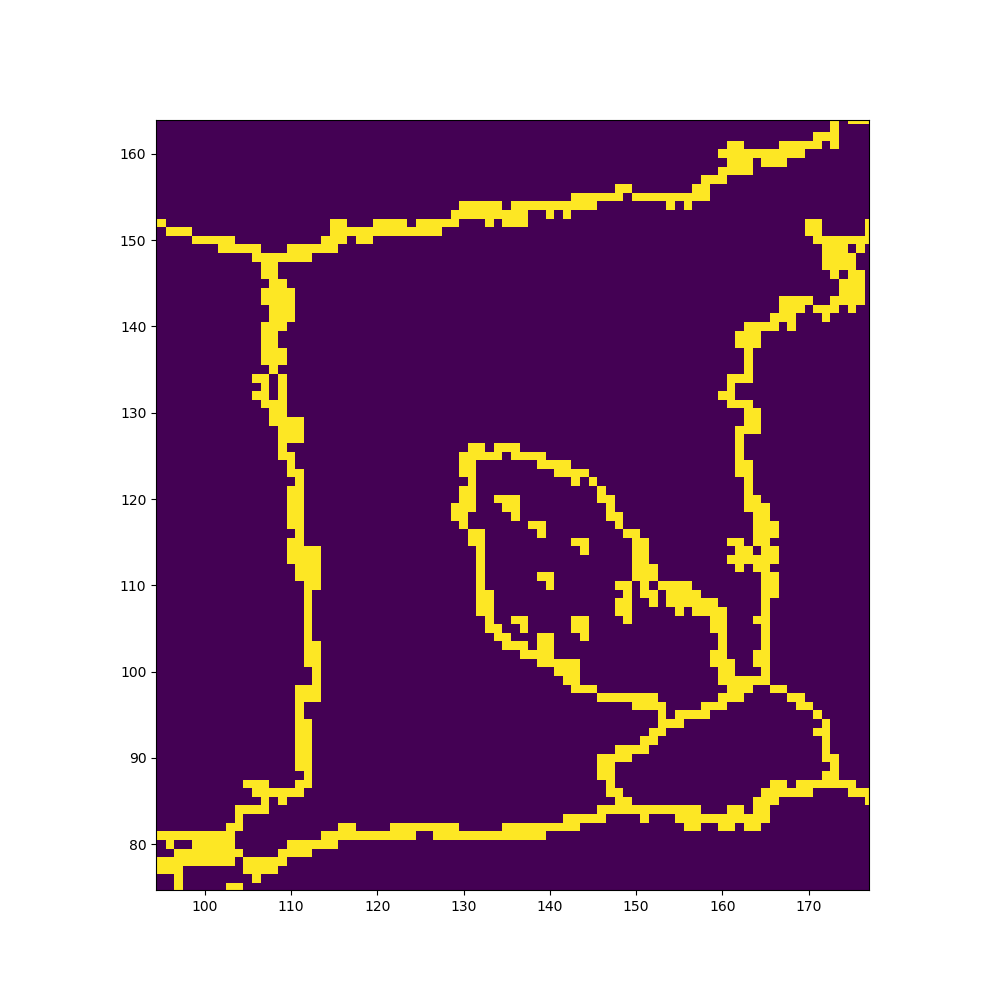

In [12]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(overlapMap.T>0.1,origin='lower')
plt.show()

# grain boundary accuracy in 2um range

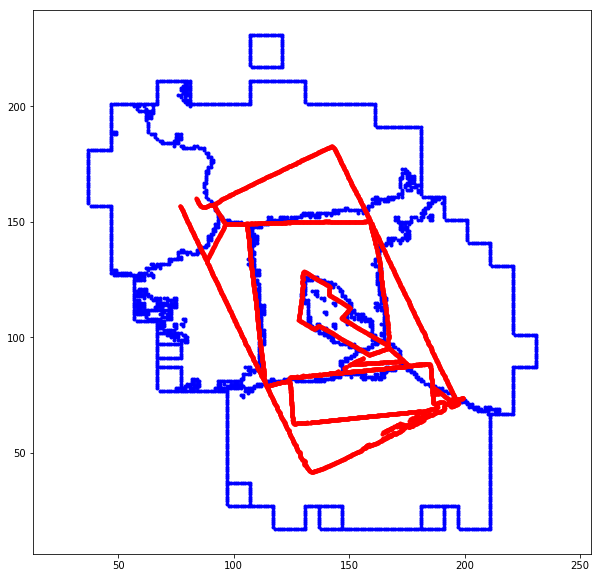

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (10,10)
df = pd.read_csv('/home/heliu/work/Au_calibrate/DeNoised_Registered_Flipped_EBSD_GrainBoundaries.txt',header=None)
theta = np.pi/2.0+0.45
factor = 1000
shiftX = 133
shiftY = 128
rotM = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
newCord = np.dot(rotM, df.iloc[:,0:2].values.T)
newCord*= factor
newCord[0,:] += shiftX
newCord[1,:] += shiftY
#plt.plot(newCord[0,:],newCord[1,:],'.r')
x,y = np.where(overlapMap>0)
plt.plot(x,y,'.b')
plt.plot(newCord[0,:],newCord[1,:],'.r')
plt.axis('equal')
plt.show()

(256, 3)
7
 exp data loaded, shape is: (2094341, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 193, voxelLeft: 1/900.  max hitratio: 0.1190476194024086, peakcnt: 42,reconstructed euler angle [127.23320291  27.76128236 278.26108783]]]]]number of flood fills: 0
start of post processing, moving grain boundaries untile stable
 Iteration: 200, max misorien: 1.5941104888916016number of post process iteration: 200, number of voxel revisited: 41093
 post process takes is 351.4184775352478 seconds
===========end of reconstruction========== 

SourceModule time 374.5205 seconds.
saved as npy format


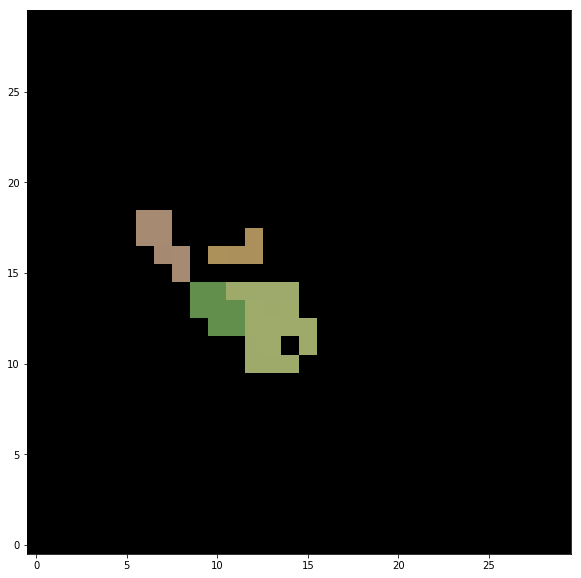

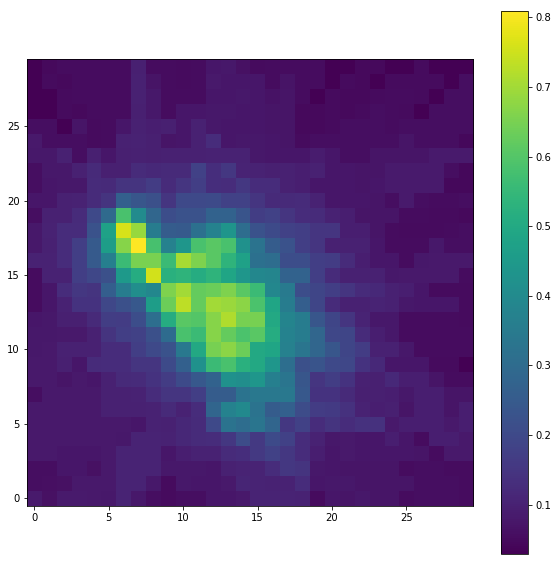

[[ 45.99952502  46.29195247 274.85183941]
 [277.45273911  26.08279282  81.60982111]
 [  9.90266616  35.57540456 338.22532629]
 [140.34900516  60.08517453 230.26021076]
 [ 10.23040784  34.46720479 336.75026659]
 [  9.92284155  34.86567481 337.0277059 ]
 [  8.958894    36.10030919 338.13416966]
 [243.8494969   43.96167396 129.79398862]
 [139.56990111  37.58544031 181.62128687]
 [  9.8600734   34.7562531  337.54880443]
 [ 10.42692569  35.11821298 336.79793931]
 [ 46.04443181  45.68882287 294.91338921]
 [ 45.38050488  45.52501826 296.37188003]
 [  9.68713156  35.01504113 337.33900045]
 [147.62273602  33.83660034 178.19652069]
 [147.16937998  33.81180726 178.81028167]
 [147.38127266  34.10012147 178.09768775]
 [128.90999711  27.18702088 186.88401761]
 [147.27004982  34.13608822 178.37418767]
 [  9.52957583  34.96883605 338.26790672]
 [  5.1397462   44.38538264 341.96858456]
 [  4.66485068  40.46950602 323.21945448]
 [ 45.31798486  44.92575693 296.25651973]
 [  3.42512427  40.63762306 324.20

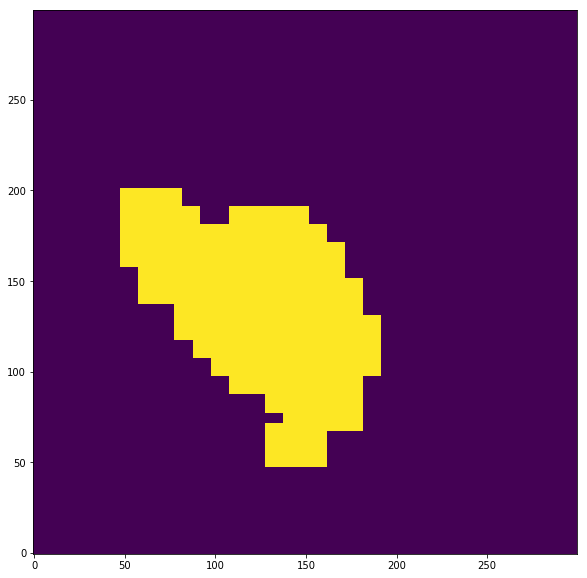

(256, 3)
7
 exp data loaded, shape is: (3396020, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 18147, voxelLeft: 1/13156.  max hitratio: 0.31707316637039185, peakcnt: 41,reconstructed euler angle [ 10.33365235  34.84442397 337.56117205]]]]]number of flood fills: 9
start of post processing, moving grain boundaries untile stable
 Iteration: 195, max misorien: 0.0008457279182039201number of post process iteration: 195, number of voxel revisited: 12076
 post process takes is 118.86822938919067 seconds
===========end of reconstruction========== 

SourceModule time 475.211 seconds.
saved as npy format


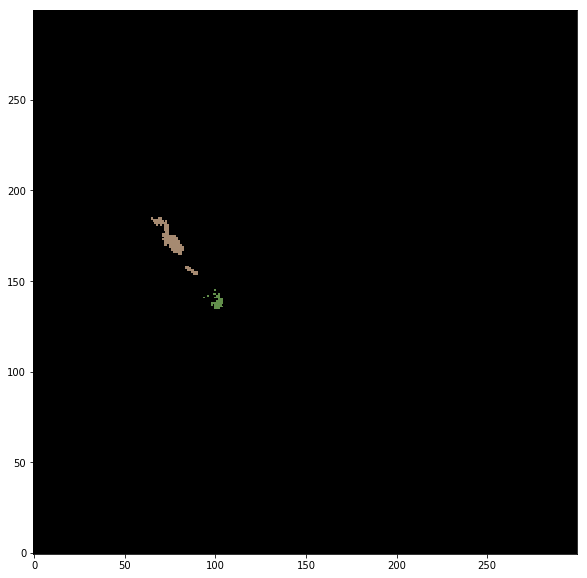

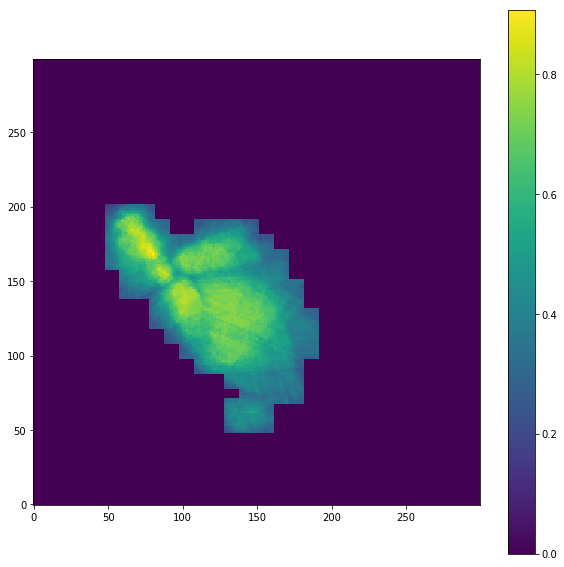

In [1]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

centerL = np.array([[5.0923, 6.55677, 8.07811]])
centerJ = np.array([[928.821, 940.444, 942.902]])
centerK = np.array([[2030.67, 2026.39, 2024.06]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513],
                       [89.473, 90.2258,  359.597]]])

# step 2: start reconstruction with calibrated configuration (parameters)
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
import scipy.ndimage as ndi

layer = 1
for i in range(1):
    ############ low resolution reconstruction
    S = reconstruction.Reconstructor_GPU()
    S.NDet = 3
    S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
    S.set_Q(7)
    print(S.maxQ)

    S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
    S.set_sample('gold')
    S.energy = 65.351
    S.expDataInitial = f'/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z{layer}_'      # reduced binary data
    S.expdataNDigit = 6                                                       # number of digit in the binary file name
    imgsize = [30, 30]
    voxelSize = 0.01
    shift = [0.0, 0.0, 0.0]
    S.create_square_mic(imgsize,
                        voxelsize=voxelSize,
                        shift=shift,
                       )# resolution of reconstruction and voxel size
    S.squareMicOutFile = f'output/gold_calibrate_z{layer}_' \
                        + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                        + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
    S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
    S.intensity_threshold = 2 # throw away peaks with intensity below this value
    S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
    S.serial_recon_multi_stage(enablePostProcess=True)

    #388seconds with verbose
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (10,10)
    MicFileTool.plot_square_mic(S.squareMicData,0.6)
    MicFileTool.plot_conf_square_mic(S.squareMicData)
    eulers,label,numFeatures = S.extract_orientations()
    print(eulers)

    ######### create mask
    mask_15_15 = np.load(S.squareMicOutFile)[:,:,6]>0.3
    #mask_30_30 = S.squareMicData[:,:,6]>0.5
    mask_150_15 = np.repeat(mask_15_15, 10, axis=0)
    mask_150_150 = np.repeat(mask_150_15, 10, axis=1)
    mask_150_150 = ndi.maximum_filter(mask_150_150,size=5)
    plt.imshow(mask_150_150.T, origin='lower')
    plt.show()

    ######## high resolution reconstruction
    S = reconstruction.Reconstructor_GPU()
    S.NDet = 3
    S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
    S.set_Q(7)
    print(S.maxQ)

    S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
    S.additionalFZ = eulers
    S.set_sample('gold')
    S.energy = 65.351
    S.expDataInitial = f'/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z{layer}_'      # reduced binary data
    S.expdataNDigit = 6                                                       # number of digit in the binary file name
    imgsize = [300, 300]
    voxelSize = 0.001
    shift = [0.0, 0.0, 0.0]
    S.create_square_mic(imgsize,
                        voxelsize=voxelSize,
                        shift=shift,
                        mask=mask_150_150,
                       )# resolution of reconstruction and voxel size
    S.squareMicOutFile = f'output/gold_calibrate_z{layer}_run' + str(i) + '_' \
                        + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                        + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
    S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
    S.intensity_threshold = 0 # throw away peaks with intensity below this value
    S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
    S.serial_recon_multi_stage(enablePostProcess=True)

    #388seconds with verbose
    plt.rcParams["figure.figsize"] = (10,10)
    MicFileTool.plot_square_mic(S.squareMicData,0.8)
    MicFileTool.plot_conf_square_mic(S.squareMicData)

(256, 3)
7
 exp data loaded, shape is: (3498387, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 616, voxelLeft: 1/900.  max hitratio: 0.12195122241973877, peakcnt: 41,reconstructed euler angle [128.99812491  26.84026248 186.88713063]]]]number of flood fills: 14
start of post processing, moving grain boundaries untile stable
 Iteration: 200, max misorien: 1.5976074934005737number of post process iteration: 200, number of voxel revisited: 30432
 post process takes is 286.1516041755676 seconds
===========end of reconstruction========== 

SourceModule time 309.09515625 seconds.
saved as npy format


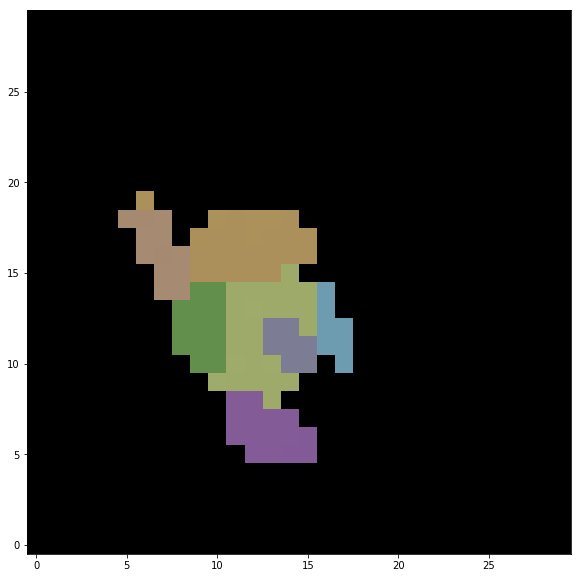

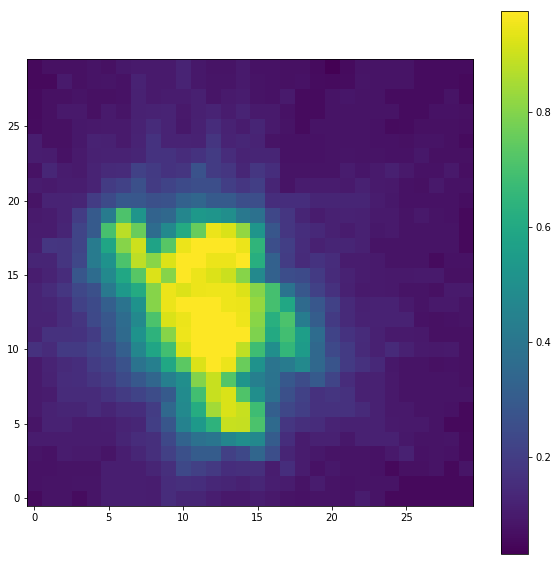

[[ 10.54693648  35.2372269  337.45907338]
 [  9.77089718  35.551305   338.27233135]
 [ 41.798589     5.1792596  338.84620328]
 [ 45.87405673  45.3636482  295.97791174]
 [ 45.29729971  45.30673085 296.37155078]
 [129.00913945  27.23384419 186.93623319]
 [ 46.34722766  45.70863219 295.0332712 ]
 [  7.0843699   40.50308572 320.51351317]
 [ 44.95101959  45.61320041 296.41346111]
 [  9.69118088  34.8367693  337.628591  ]
 [  4.68709012  40.46127276 323.2447694 ]
 [ 45.85025263  45.59066729 295.82575184]
 [147.13489824  34.75679027 178.50287762]
 [129.27850252  27.4492259  186.76714462]
 [129.05312832  27.2396583  186.91712319]
 [284.89533212  31.50332472  96.15610014]
 [284.87805774  31.37109841  96.19604117]
 [124.62703322  26.47260192 191.51823161]
 [284.5755407   31.01292979  96.86635752]
 [  5.18670344  40.10988128 322.96511133]
 [  5.48676644  40.84428668 322.301419  ]
 [ 45.14539638  44.88297717 296.19690189]
 [  4.56328467  39.98025838 323.57184905]
 [222.02218621   3.32835615 156.45

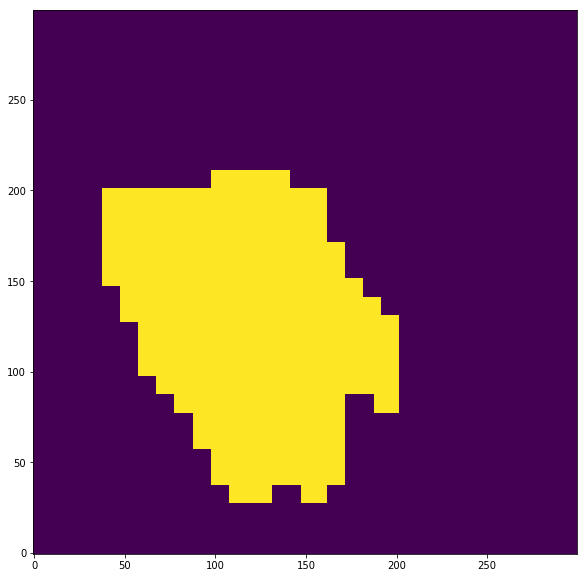

(256, 3)
7
 exp data loaded, shape is: (4822176, 4).
=============start of copy exp data to gpu ===========
start of create data on cpu ram
=============start of copy exp data to CPU ===========
assuming same type of detector in different distances
=============end of copy exp data to CPU ===========
start of creating texture memory
end of creating texture memory
=============end of copy exp data to gpu ===========
==========start of reconstruction======== 

 voxelIdx: 56479, voxelLeft: 1/20556.  max hitratio: 0.190476194024086, peakcnt: 42,reconstructed euler angle [ 44.05901578  44.78125541 297.25871083]]]]]]]number of flood fills: 173
start of post processing, moving grain boundaries untile stable
 Iteration: 184, max misorien: 0.0006905339541845024number of post process iteration: 184, number of voxel revisited: 33645
 post process takes is 327.02854895591736 seconds
===========end of reconstruction========== 

SourceModule time 926.50825 seconds.
saved as npy format


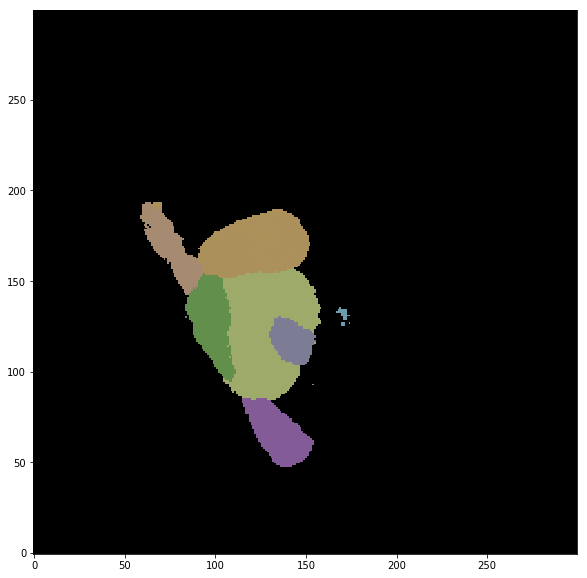

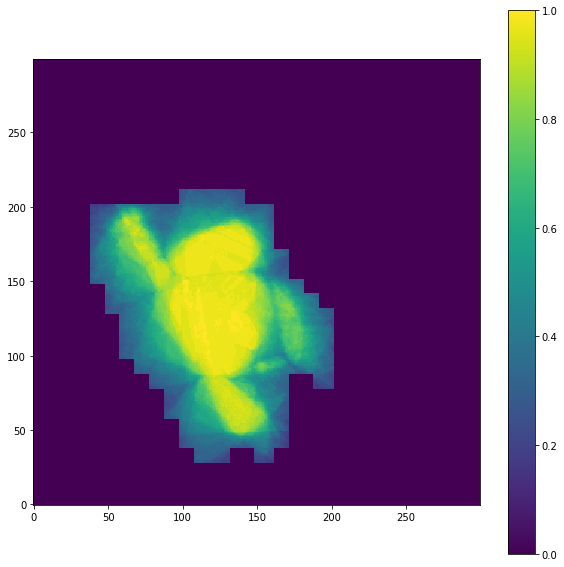

In [2]:
# try david's parameters
import numpy as np
centerL = np.array([[5.0923, 6.55677]])
centerJ = np.array([[928.821, 940.444]])
centerK = np.array([[2030.67, 2026.39]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513]]])

centerL = np.array([[5.0923, 6.55677, 8.07811]])
centerJ = np.array([[928.821, 940.444, 942.902]])
centerK = np.array([[2030.67, 2026.39, 2024.06]])
centerRot = np.array([[[89.4895, 90.5853, 359.537],
                       [89.8868, 90.8186, 359.513],
                       [89.473, 90.2258,  359.597]]])

# step 2: start reconstruction with calibrated configuration (parameters)
import reconstruction
import MicFileTool
import numpy as np
import matplotlib.pyplot as plt
import IntBin
import pickle
import scipy.ndimage as ndi

layer = 2
for i in range(1):
    ############ low resolution reconstruction
    S = reconstruction.Reconstructor_GPU()
    S.NDet = 3
    S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
    S.set_Q(7)
    print(S.maxQ)

    S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
    S.set_sample('gold')
    S.energy = 65.351
    S.expDataInitial = f'/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z{layer}_'      # reduced binary data
    S.expdataNDigit = 6                                                       # number of digit in the binary file name
    imgsize = [30, 30]
    voxelSize = 0.01
    shift = [0.0, 0.0, 0.0]
    S.create_square_mic(imgsize,
                        voxelsize=voxelSize,
                        shift=shift,
                       )# resolution of reconstruction and voxel size
    S.squareMicOutFile = f'output/gold_calibrate_z{layer}_' \
                        + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                        + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
    S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
    S.intensity_threshold = 2 # throw away peaks with intensity below this value
    S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
    S.serial_recon_multi_stage(enablePostProcess=True)

    #388seconds with verbose
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (10,10)
    MicFileTool.plot_square_mic(S.squareMicData,0.6)
    MicFileTool.plot_conf_square_mic(S.squareMicData)
    eulers,label,numFeatures = S.extract_orientations()
    print(eulers)

    ######### create mask
    mask_15_15 = np.load(S.squareMicOutFile)[:,:,6]>0.3
    #mask_30_30 = S.squareMicData[:,:,6]>0.5
    mask_150_15 = np.repeat(mask_15_15, 10, axis=0)
    mask_150_150 = np.repeat(mask_150_15, 10, axis=1)
    mask_150_150 = ndi.maximum_filter(mask_150_150,size=5)
    plt.imshow(mask_150_150.T, origin='lower')
    plt.show()

    ######## high resolution reconstruction
    S = reconstruction.Reconstructor_GPU()
    S.NDet = 3
    S.set_det_param(centerL, centerJ, centerK, centerRot) # set parameter
    S.set_Q(7)
    print(S.maxQ)

    S.FZFile = '/home/heliu/work/I9_test_data/Au_Mar17/DataFiles/MyFZ.dat'         # fundamental zone file
    S.additionalFZ = eulers
    S.set_sample('gold')
    S.energy = 65.351
    S.expDataInitial = f'/home/heliu/work/Au_calibrate/NSUM10-360-bsf0/Au_vol2_NSUM10_360_bsf0_z{layer}_'      # reduced binary data
    S.expdataNDigit = 6                                                       # number of digit in the binary file name
    imgsize = [300, 300]
    voxelSize = 0.001
    shift = [0.0, 0.0, 0.0]
    S.create_square_mic(imgsize,
                        voxelsize=voxelSize,
                        shift=shift,
                        mask=mask_150_150,
                       )# resolution of reconstruction and voxel size
    S.squareMicOutFile = f'output/gold_calibrate_z{layer}_run' + str(i) + '_' \
                        + f'{"x".join(map(str,imgsize))}_{voxelSize}' \
                        + f'_shift_{"_".join(map(str, shift))}.npy' # output file name
    S.searchBatchSize = 6000   # number of orientations search at each iteration, larger number will take longer time.
    S.intensity_threshold = 0 # throw away peaks with intensity below this value
    S.recon_prepare(reverseRot=True)  # at 1ID, left hand rotation needs reverseRot=True
    S.serial_recon_multi_stage(enablePostProcess=True)

    #388seconds with verbose
    plt.rcParams["figure.figsize"] = (10,10)
    MicFileTool.plot_square_mic(S.squareMicData,0.8)
    MicFileTool.plot_conf_square_mic(S.squareMicData)

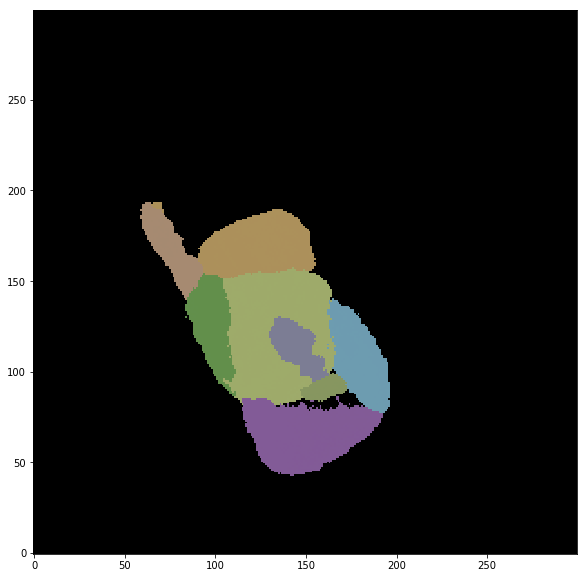

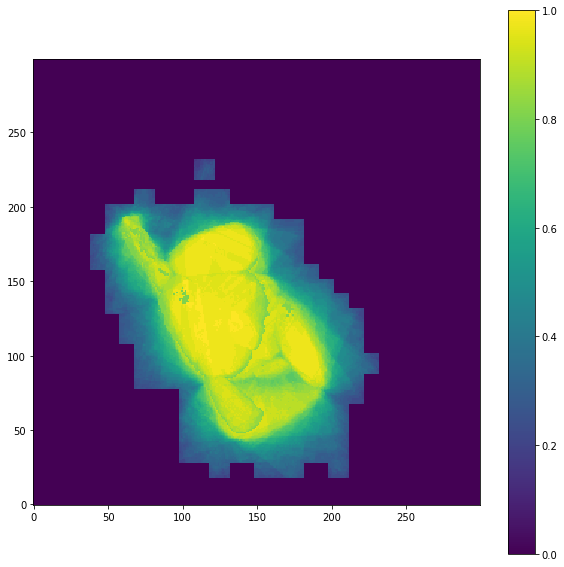

In [8]:
micZ1 = np.load('output/gold_calibrate_z1_run0_300x300_0.001_shift_0.0_0.0_0.0.npy')
micZ2 = np.load('output/gold_calibrate_z2_run0_300x300_0.001_shift_0.0_0.0_0.0.npy')
micZ3 = np.load('output/gold_calibrate_z3_run0_300x300_0.001_shift_0.0_0.0_0.0.npy')
newMic = np.copy(micZ3)
x,y  =  np.where(micZ2[:,:,6]>0.8)
newMic[x,y,:] = micZ2[x,y,:]
x,y  =  np.where(micZ1[:,:,6]>0.8)
newMic[x,y,:] = micZ1[x,y,:]
plt.rcParams["figure.figsize"] = (10,10)
MicFileTool.plot_square_mic(newMic,0.8)
MicFileTool.plot_conf_square_mic(newMic)

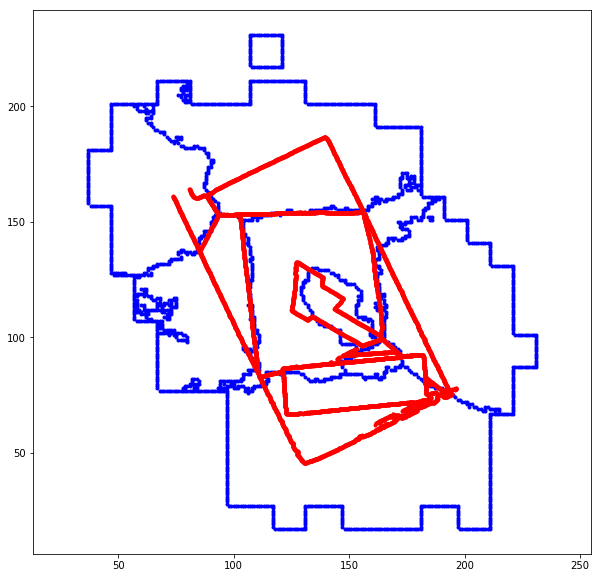

In [12]:
# calculate grain boundaries:
import numpy as np
import reconstruction
import RotRep
import matplotlib.pyplot as plt
mic = newMic
euler = mic[:,:,3:6]
misOrienMap = reconstruction.misorien_map_euler(euler,symType='Cubic')
overlapMap = misOrienMap>0.1

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (10,10)
df = pd.read_csv('/home/heliu/work/Au_calibrate/DeNoised_Registered_Flipped_EBSD_GrainBoundaries.txt',header=None)
theta = np.pi/2.0+0.45
factor = 1000
shiftX = 130
shiftY = 132
rotM = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
newCord = np.dot(rotM, df.iloc[:,0:2].values.T)
newCord*= factor
newCord[0,:] += shiftX
newCord[1,:] += shiftY
#plt.plot(newCord[0,:],newCord[1,:],'.r')
x,y = np.where(overlapMap>0)
plt.plot(x,y,'.b')
plt.plot(newCord[0,:],newCord[1,:],'.r')
plt.axis('equal')
plt.show()

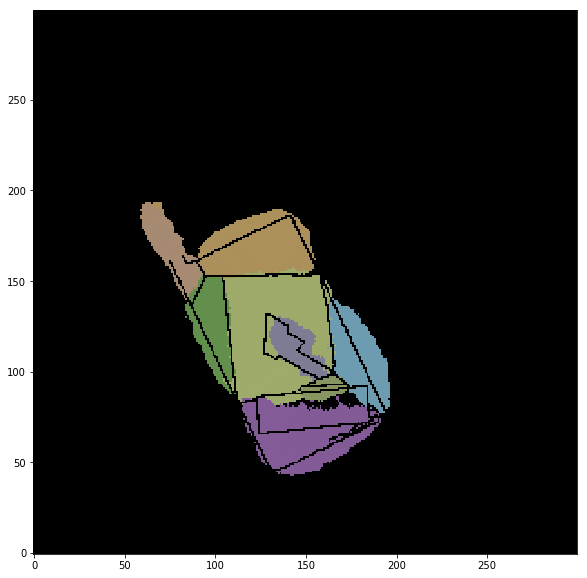

In [32]:
micZ1 = np.load('output/gold_calibrate_z1_run0_300x300_0.001_shift_0.0_0.0_0.0.npy')
micZ2 = np.load('output/gold_calibrate_z2_run0_300x300_0.001_shift_0.0_0.0_0.0.npy')
micZ3 = np.load('output/gold_calibrate_z3_run0_300x300_0.001_shift_0.0_0.0_0.0.npy')
newMic = np.copy(micZ3)
x,y  =  np.where(micZ2[:,:,6]>0.8)
newMic[x,y,:] = micZ2[x,y,:]
x,y  =  np.where(micZ1[:,:,6]>0.8)
newMic[x,y,:] = micZ1[x,y,:]
# plt.rcParams["figure.figsize"] = (10,10)
# MicFileTool.plot_square_mic(newMic,0.8)
# MicFileTool.plot_conf_square_mic(newMic)

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["figure.figsize"] = (10,10)
df = pd.read_csv('/home/heliu/work/Au_calibrate/DeNoised_Registered_Flipped_EBSD_GrainBoundaries.txt',header=None)
theta = np.pi/2.0+0.45
factor = 1000
shiftX = 132
shiftY = 132
rotM = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
newCord = np.dot(rotM, df.iloc[:,0:2].values.T)
newCord*= factor
newCord[0,:] += shiftX
newCord[1,:] += shiftY

newMic[newCord[0,:].astype(np.int32),newCord[1,:].astype(np.int32),6] = 0

MicFileTool.plot_square_mic(newMic,0.8)


[[203.14094941 202.32905059 200.70494941 ...  35.48405059  33.85994941
   33.04805059]
 [ 37.390125    37.390125    37.391125   ... 208.249925   208.249925
  208.249925  ]]


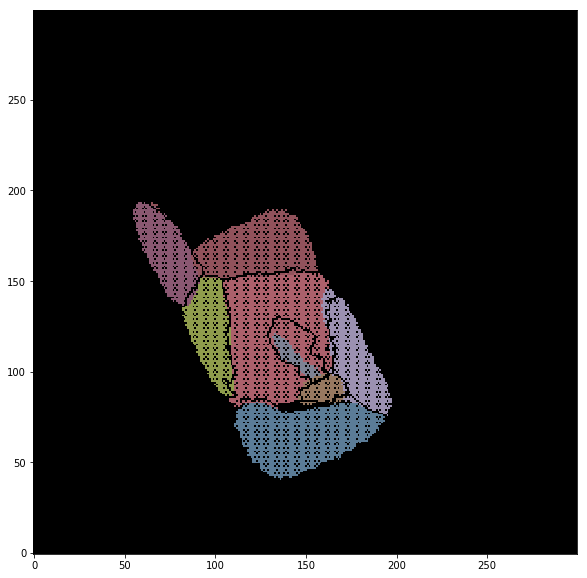

In [55]:
# compare with i9
fName = '/home/heliu/work/Au_calibrate/Au_fullRotation_z3_Fit5_.mic.LBFS'
with open(fName) as f:
    content = f.readlines()
# print(content[1])
# print(type(content[1]))
sw = float(content[0])
try:
    snp = np.array([[float(i) for i in s.split()] for s in content[1:]])
except ValueError:
    print('unknown deliminater')
if snp.ndim<2:
    raise ValueError('snp dimension if not right, possible empty mic file or empty line in micfile')
# set the center of triable to voxel position
voxelpos = snp[:,:3].copy()
voxelpos[:,0] = snp[:,0] + 0.5*sw/(2**snp[:,4])
voxelpos[:,1] = snp[:,1] + 2*(1.5-snp[:,3]) * sw/(2**snp[:,4])/2/np.sqrt(3)

theta = np.pi/2.0
factor = 1000
shiftX = 148
shiftY = 152
rotM = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])
newCord = np.dot(rotM, voxelpos[:,0:2].T)
newCord*= factor
newCord[0,:] += shiftX
newCord[1,:] += shiftY

print(newCord)
voxelpos = newCord.astype(np.int32).T
squareMic = np.zeros([300,300,10])
squareMic[voxelpos[:,0],voxelpos[:,1],3:6] = snp[:,6:9]
squareMic[voxelpos[:,0],voxelpos[:,1],6] = snp[:,9]

x,y = np.where(overlapMap>0)
squareMic[x,y,6] = 0
MicFileTool.plot_square_mic(squareMic,0.3)

-0.115313 -0.054735 0 2 9 0 195.1 31.9588 186.462 0 0.949098 0 0 1 1 1 0 0 0

<class 'str'>
sw is 0.72 

shape of snp is (34160, 19)


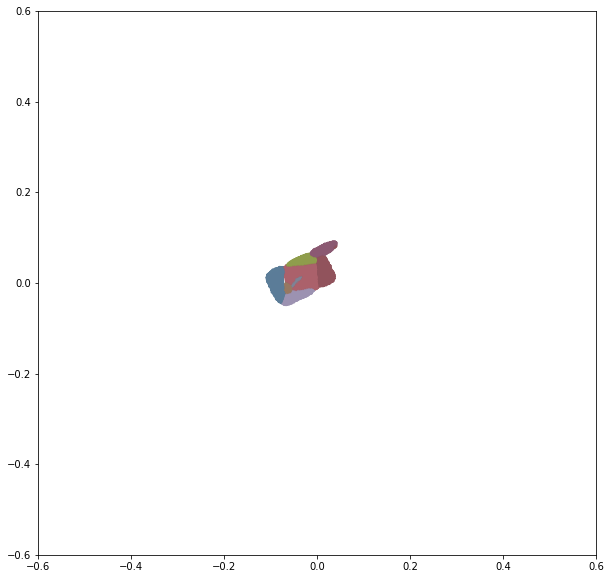

In [41]:
m = MicFileTool.MicFile(fName)
m.plot_mic_patches(minConfidence=0.6,plotType=1)

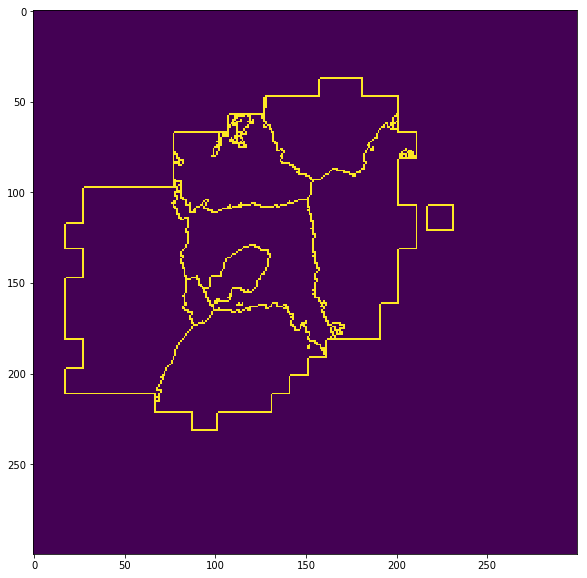